# Std for logP value of duplicates

Most of the **std** values are located in range $[0; 1]$, whereas most of **logP** values are in range $[0; 2]$ with overall **std** = $1.87$

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
DATASETS_PATH = Path("../data/3_final_data")

In [13]:
logP_dataset = pd.read_csv(os.path.join(DATASETS_PATH,'logP.csv'))

In [7]:
logP_dataset.head()

smiles  logP
0  COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21  4.17
1     COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O  2.79
2       CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1  1.60
3  CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC  3.96
4      C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1  5.30

In [12]:
logP_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  14111 non-null  object 
 1   logP    14111 non-null  float64
dtypes: float64(1), object(1)
memory usage: 220.6+ KB


In [8]:
VALUE_COLUMN = "logP"
SMILES_COLUMN = "smiles"

In [14]:
duplicates_std = logP_dataset.groupby([SMILES_COLUMN]).std().dropna()

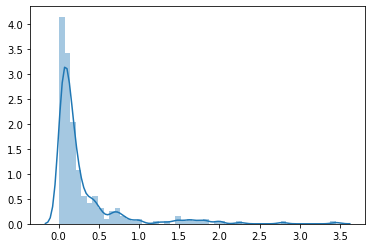

In [17]:
# distribution of std values of duplicates
sns.distplot(duplicates_std)

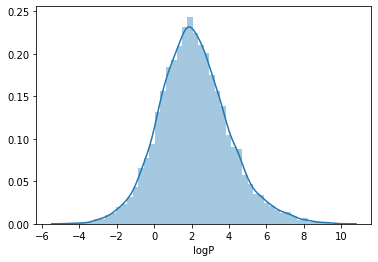

In [15]:
# distribution of logP values 
sns.distplot(logP_dataset[VALUE_COLUMN])

In [18]:
logP_without_duplicates = logP_dataset.drop_duplicates(subset=SMILES_COLUMN)

In [22]:
print('Standard deviation of logP value in the whole dataset without duplicates is', round(logP_without_duplicates[VALUE_COLUMN].std(),2))

Standard deviation of logP value in the whole dataset without duplicates is 1.87


In [35]:
ranges = [0, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
duplicates_std[VALUE_COLUMN].groupby(pd.cut(duplicates_std[VALUE_COLUMN], ranges)).count()

logP
(0.0, 0.1]    109
(0.1, 0.2]     74
(0.2, 0.5]     56
(0.5, 1.0]     26
(1.0, 1.5]      5
(1.5, 2.0]      9
(2.0, 2.5]      2
(2.5, 3.0]      1
(3.0, 3.5]      1
Name: logP, dtype: int64

In [36]:
logP_dataset.describe()

logP
count  14111.000000
mean       2.127711
std        1.876122
min       -4.650000
25%        0.890000
50%        2.030000
75%        3.260000
max        9.960000

# Number of atoms in molecules in PhysProp and LogP datasets

Distribution of number of atoms shows that additional datasets (logP, NCI, Diverse) **haven't contributed significantly** to number of large molecules (which usually are presented in industrial datasets)

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
# from rdkit import Chem
import sys
sys.path
sys.path.append('../scripts/preprocess')
# from remove_strange_mols import remove_strange_mols

In [4]:
DATASETS_PATH_1 = Path("../data/3_final_data")
DATASETS_PATH_2 = Path("../data/2_standardize")

In [5]:
logP_dataset = pd.read_csv(os.path.join(DATASETS_PATH_1,'logP.csv'))
physprop_dataset = pd.read_csv(os.path.join(DATASETS_PATH_2,'physprop.csv'))

In [6]:
VALUE_COLUMN = "logP"
TEMPERATURE_COLUMN = "Temperature"
PH_COLUMN = "pH"
SMILES_COLUMN = "smiles"
NUM_ATOMS_COLUMN = "NumAtoms"

In [10]:
physprop_dataset = physprop_dataset.drop(columns=[TEMPERATURE_COLUMN], axis = 1)

In [12]:
def create_dataset(dataFrame, columns, filename, save_path = "../data/3_raw"):
    dataset = dataFrame[columns].dropna()
    dataset = dataset.drop_duplicates()
    initial_size = dataset.shape[0]
    dataset.to_csv(os.path.join(save_path, filename), index= False)
    remove_strange_mols(os.path.join(save_path, filename), os.path.join(save_path, filename))
    dataset = pd.read_csv(os.path.join(save_path, filename))
    return dataset, initial_size

In [13]:
physprop_dataset, physprop_init_size = create_dataset(physprop_dataset, [SMILES_COLUMN, VALUE_COLUMN], 'physprop_standardize.csv')

2020-07-06 17:43:59.700 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.706 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(c2ccccc2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.707 | DEBUG    | remove_st

2020-07-06 17:43:59.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.748 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.749 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2 isn't in 

2020-07-06 17:43:59.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCBr)N1CCN(C(=O)CCBr)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CCc2nnnn2CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccc1 isn't in the list of very soluble in wat

2020-07-06 17:43:59.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.828 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C1C(=O)C(C(N)=O)C(=O)C2(O)C(=O)C3C(=O)c4c(O)ccc(Cl)c4C(C)(O)C3CC12 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.829 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.830 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)S(=O)(=O)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.831 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.832 | DEBUG    | remove_strange_mols:check_not

2020-07-06 17:43:59.876 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C(=O)NNCc2ccccc2)no1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]nc(S(N)(=O)=O)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.879 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)NN=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCOCC1 is

2020-07-06 17:43:59.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC3C(CC=C4CC(=O)CCC43C)C1CCC2=O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSCCC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=CCCN(C)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)O isn'

2020-07-06 17:43:59.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(=O)C1(O)C(OC(C)=O)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CS isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C=O isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C=CC1=C(C)CCCC1(C)C)=CC=CC(C)=CCO isn't in the list of very soluble in water molecules
2020-07-06 17:43:59.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - 

2020-07-06 17:44:00.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CBr isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.010 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CI isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.012 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-06 17:44:00.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.064 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.065 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.

2020-07-06 17:44:00.107 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(Br)(CC)C(=O)NC(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C)CC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(C#N)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CC(O)(CC(=O)O)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CO)(CO)CO isn't in the list of very 

2020-07-06 17:44:00.191 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)N(C)N=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.192 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.193 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(C)(C)C1CC=C(C)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.194 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(=NS(=O)(=O)c2ccc(N)cc2)[nH]n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.195 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOS(=O)(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.196 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(OOC(

2020-07-06 17:44:00.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=Cc1ccc2c(O)c3ccccc3c(O)c2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.239 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.240 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccccc1C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.241 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.242 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC

2020-07-06 17:44:00.284 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(C)c(C)c(C)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.286 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=O)C(O)C(O)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(O)cc(C)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.289 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)O isn't in the list o

2020-07-06 17:44:00.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccccc1[Hg]Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.337 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-

2020-07-06 17:44:00.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CCO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCNCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(OC(C)=O)c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2cc3ccc(N)cc3nc2c1 isn't in

2020-07-06 17:44:00.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OCCO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OOC(=O)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.499 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OCc1ccccc1)c1cccnc1 isn't i

2020-07-06 17:44:00.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CO2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Br)CBr isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.542 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Cl)CCl isn't in the list of very soluble in water molecules
2020

2020-07-06 17:44:00.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OB(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)c1ccccc1 isn't in the list of very soluble

2020-07-06 17:44:00.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.625 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.626 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.628 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.629 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)O)cc1 isn't in the list of very soluble in w

2020-07-06 17:44:00.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CN2CCC1CC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.669 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.670 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.670 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1nc(=Nc2ccccc2Cl)nc(Cl)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.671 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.672 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)Nc1cccc(Cl)c1 isn't in the list 

2020-07-06 17:44:00.710 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.711 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00

2020-07-06 17:44:00.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CC(=O)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=S)NCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.817 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(C)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.819 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(O)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 

2020-07-06 17:44:00.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=NO isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)CC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OP(C)(=O)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.863 | DEBUG    | re

2020-07-06 17:44:00.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.902 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.903 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.903 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.905 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.906 | DEBUG 

2020-07-06 17:44:00.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=CC=CC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCBr isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCN isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCN isn't in the list of very soluble in water molecules
2020-07-06 17:44:00.962 | DEBUG    | remove

2020-07-06 17:44:01.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOCCOC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCCOCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:0

2020-07-06 17:44:01.091 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=CC(C)(C)SC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.092 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.093 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c(Cl)c(Cl)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.095 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C2C(

2020-07-06 17:44:01.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2nc3ccccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=O)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.138 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCN)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc2ccccc2c1 isn't in the 

2020-07-06 17:44:01.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(OC)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.181 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc

2020-07-06 17:44:01.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCNCC=C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.224 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules


2020-07-06 17:44:01.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(I)c(=O)n(-c2ccccc2)n1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)O[Na])c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(Cl)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccccc1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)c1ccccc1C(=O)

2020-07-06 17:44:01.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=S)SSC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=S)S[Zn]SC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(C(=O)O)cc1 isn't in th

2020-07-06 17:44:01.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(O)C(C)(C)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CI isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)N=c2cc

2020-07-06 17:44:01.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCl isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc[nH]c(=S)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1=c2ccc3c4c(ccc(c24)=C1)=CC=3 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cnc2c(c1)cc1ccc3cccc4ccc2c1c34 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61 isn't in 

2020-07-06 17:44:01.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Oc1ccccc1O2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Oc1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2cc3sccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2ccsc2cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nocc2c1 isn't in the list of very solubl

2020-07-06 17:44:01.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)OC(Br)C(Cl)(Cl)Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC=CCC=CCC=CCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)CCSP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NN isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(O)C(Cl)(Cl)Cl isn't in the list of very soluble i

2020-07-06 17:44:01.638 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C(C)C)cc(C(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1cc(C)

2020-07-06 17:44:01.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)C=CC1C(O)CC(=O)C1CC=CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cc(F)c(F)c(F)c1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc(F)ccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-06 17:44:01.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccc(F)cc1 isn't in the list of very soluble

2020-07-06 17:44:01.762 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)O)cc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.763 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)Sc1ccccc1 isn't in the list of very soluble in water mo

2020-07-06 17:44:01.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)OC(=CCl)c1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CCC12C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=O)c2c(O)ccc(O)c21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(O)C3 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.809 |

2020-07-06 17:44:01.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.909 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)COC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccocc1O isn't in the list of very soluble in water molecu

2020-07-06 17:44:01.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(OC(C)=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C2=CCCCCC2)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C1C(=O)OC2C1CCC(C)C1=CCC(=O)C12C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(O)(c1ccc(Cl)cc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-06 17:44:01.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:01.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1cnc2[nH]c(=N)[nH]c(=N)c2n1)c1c(Cl)cc(C(=O)NC(CCC(=O)O)C(=O)O)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:02.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCc1ccccc1 isn't in the list of very soluble in water mo

2020-07-06 17:44:02.082 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(C)=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1cnc2[nH]c(=O)[nH]c(=O)c21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN

2020-07-06 17:44:02.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C1(c2ccccc2)CCN(CCC(O)c2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC(O)(C(C)C)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)SCSP(=S)(OCC)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1OC1C1CO1 isn't in the list of 

2020-07-06 17:44:02.226 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.228 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2cc3ccccc3nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc2ccccc2cc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2cc(C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.231 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc2cc(O)ccc2c1 isn't in the list of very sol

2020-07-06 17:44:02.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(O)CCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(O)CCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(O)CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCC(O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.272 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCC(=O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:0

2020-07-06 17:44:02.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Cl)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(NO)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.312 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]cn2)cc1 isn't in the list of very so

2020-07-06 17:44:02.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.350 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c(Br)cccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(O)ccc(O)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.352 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.353 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)c(Cl)c(Cl)c1 isn't in the list of very soluble i

2020-07-06 17:44:02.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Cc1ccccc1C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.392 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2ccc(C)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.393 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.393 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.394 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.395 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccccc1 isn't in the

2020-07-06 17:44:02.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc([N+](=O)[O-])ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc(CO)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(N)cc1

2020-07-06 17:44:02.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [N-]=[N+]=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)=Nc1ccccc1 isn't in the list of very soluble in water molecu

2020-07-06 17:44:02.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCc1cccc(CCl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc(Br)cc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc(Cl)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in wa

2020-07-06 17:44:02.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.623 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)cc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.624 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCCN2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.625 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-n2cccc2)cc1 isn't in the list of very 

2020-07-06 17:44:02.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.664 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ncc[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)c(C)cc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.669 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNNCc1ccc(C(=O)NC(C)C)cc1 isn't in

2020-07-06 17:44:02.763 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(O)c(C)c(C)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+](=O)[O-])c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)(Cl)Sc1ccccc1 isn't in the list of v

2020-07-06 17:44:02.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(C)(=O)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)C(=O)SCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CN(N=O)C(N)=O isn't in the list of very soluble in water molecules
2020-

2020-07-06 17:44:02.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccsc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1CCCCC1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ncccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-

2020-07-06 17:44:02.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccs1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.892 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccncc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.893 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.894 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(O[Na])c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07

2020-07-06 17:44:02.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCCCCCCCCCC(=O)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1cccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.934 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:02.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-0

2020-07-06 17:44:03.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC(C#N)=NNc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(COc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.033 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCCCCCCCCN1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc2ccccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(N)Cc1ccc(O)cc1 isn't in the

2020-07-06 17:44:03.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(CC)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C2CCCN2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(Cl)nc(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.076 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.076 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.077 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCNC(=O)c1ccccc1 isn't in the list of very solub

2020-07-06 17:44:03.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)S(=O)(=O)N(SC(F)(Cl)Cl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C(=Nc2ccccc2)C(Cl)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-06 17:44:03.157 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC#Cc1ccc(-c2cccs2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.158 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(Cc1ccccc1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.159 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=CC(=O)O)ccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.161 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1cccc(NC(N)=O)c1 

2020-07-06 17:44:03.198 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=Cc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.200 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OC(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(O)c1ccccc1)N(C)C isn't in the list of very s

2020-07-06 17:44:03.243 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(OC)c2c(c1)OC(C)(C)C1CC=C(C)CC21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.319 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccccc1-c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1noc(-c2ccccn2)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.322 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(N=O)CC(C)O1 isn't in the list

2020-07-06 17:44:03.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc2c1OC(C)(C)C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(O)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.367 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.368 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c

2020-07-06 17:44:03.434 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(OCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.441 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(

2020-07-06 17:44:03.501 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)CCOc3ccccc3)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.502 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Oc1ccc(Cl)cc1)N1CCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.506 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC[Pb](C)(C)C isn't in the

2020-07-06 17:44:03.542 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.543 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.544 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.545 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.546 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.547 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OCC(=

2020-07-06 17:44:03.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C1(N2CCCCC2)CCN(CCCC(=O)c2ccc(F)cc2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(=N)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(S(N)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=

2020-07-06 17:44:03.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC=CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSC(=O)N(CC(C)C)CC(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-]

2020-07-06 17:44:03.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C1NCCCN1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.679 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)C(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(I)cc1 isn't in the list of very soluble in water m

2020-07-06 17:44:03.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC1(C(=O)CO)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(O)cc1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.734 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-06 17:44:03.834 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(N)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.835 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.836 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.837 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.838 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCC#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.839 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1Oc1ccccc1 

2020-07-06 17:44:03.874 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C1CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.875 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1=CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.876 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(N)=S)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c2c([N+](=O)[O-])cccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.879 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(

2020-07-06 17:44:03.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1c2ccccc2nc2n1CCCC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccncn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCN isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(OCCN(C)C)c1 isn't in the list of very 

2020-07-06 17:44:03.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(Br)o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOP(=O)(OCCCC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2c(ccc3ccccc32)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC1(CC(C)O)C(=O)NC(=O)NC1=O isn't in th

2020-07-06 17:44:03.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1OC(=O)NC isn't in the list of very soluble in water molecules
2020-07-06 17:44:03.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc(C#N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1cccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)SCn1nnc2ccccc2c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc2c3ccccc3ccc2c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CNC(=O)c1ccc([N+](=O)

2020-07-06 17:44:04.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCc1ccco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2c(c1)N(CCCN1CCN(CCO)CC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1(C(=O)O)CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)c(Cl)c1)C1C

2020-07-06 17:44:04.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(=O)CC(C)(C)N1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N=c1[nH]c(Cl)nc(=NCCO)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.087 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c(C#[N+][O-])c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.088 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C

2020-07-06 17:44:04.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(OC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccccc1)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(O)cc(C)c(O)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)Oc1ccc(SC)cc1 isn't in 

2020-07-06 17:44:04.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C=C[N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.181 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C[N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NC(=O)c1ccccc1 isn

2020-07-06 17:44:04.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.224 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.225 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cnnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.226 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC

2020-07-06 17:44:04.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)NN)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)ss1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cssc1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C2=CC3CCC(C2)C3)C(=O)NC(=O)NC1=O isn't in the list of very soluble 

2020-07-06 17:44:04.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1ccccc1OC(=O)NC isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(C)C)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.312 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(N(CCO)CCO)ccc1N=Nc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.312 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-06 17:44:04.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCC(=C2c3ccccc3CCc3cccnc32)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)ccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.350 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(OC(=O)NC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.352 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccco1)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C#N)=NNc1cc

2020-07-06 17:44:04.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Cl)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.431 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(Br)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.431 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)c1cc(Cl)cc(Cl)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.432 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1ccc([N+](=O)[O-])c[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.433 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.434 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C

2020-07-06 17:44:04.476 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)COCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.479 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)C1=C=CC(=O)NC(=O)N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.490 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-06 17:44:04.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)CC2OC2=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.551 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.556 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.560 | DEBUG    | remove_strange_mols

2020-07-06 17:44:04.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.613 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc([N+](=O)[O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC2CCCCC2C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(N=c1ccn(C2CC(O)C(CO)O2)c(=O)[nH]1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.616 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-06 17:44:04.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2cnc3ccccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.686 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CC=C(c2ccc(Cl)cc2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.687 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.688 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:04.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCSc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7COC(=O)C7)CCC65O)C4)OC3C)OC2C)CC(O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc(O)n(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(N)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
20

2020-07-06 17:44:04.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.769 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+](=O)[O-])cc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=O)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1ccc(N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.772 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cnc2cc(C)ccn2c1=O isn'

2020-07-06 17:44:04.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cncc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=S)(OC)Oc1nc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.810 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.811 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ncccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.812 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCNCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.813 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCCc1ccccn1 isn't in the list of very soluble 

2020-07-06 17:44:04.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CC=C(C)CC21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccn(C2C=CC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC(c2cccnc2)N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=S isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccn(C2CCC(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.854 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-06 17:44:04.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCCO)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CCC(C)C)C(=O)NC(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cncc[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.892 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.893 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.894 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCO)c1ccccc1 isn

2020-07-06 17:44:04.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)cc1)c1cccc([N+](=O)[O-])c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)CCCCn1c(=O)c2c(ncn2C)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.934 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cn(CCN2CCOCC2)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cncn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.940 | DEBUG    | remove_strange_mols:check_not_s

2020-07-06 17:44:04.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc2n(n1)CCN2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)C1c1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC(C)(C)CC(OOC(C)(C)C)(OOC(C)(C)C)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.980 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC1OC(n2ccc(=N)[nH]c2=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:04.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-06 17:44:05.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1[nH]cnc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(N=O)ccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(N)=S isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)c1cccnc1 isn't in the list of v

2020-07-06 17:44:05.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C1CCCCCN1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(CCl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccc2cccccc1-2 isn't in the list of

2020-07-06 17:44:05.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc(NS(=O)(=O)c2ccc(N)cc2)c(C)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc([N+]

2020-07-06 17:44:05.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(N)c(NC=O)c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(CP(=O)(OCC)OCC)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)CNC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(N=Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc2cc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc2c1ccc[n

2020-07-06 17:44:05.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(=O)C=CN2CC=CC2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1O)C(=O)C1C(=O)C3(O)C(=O)C(C(N)=O)C(=O)C(N(C)C)C3CC1C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc(O)c2c1CC1CC3C(N(C)C)C(=O)C(C(N)=O)C(=O)C3(O)C(=O)C1C2=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2C(C)OC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)C(OC=O)CC65O)C4)CC3OC=O)CC2OC=O)CC(OC=O)C1

2020-07-06 17:44:05.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=O)C(O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.312 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CO)n1cnc2c(=N)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.314 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)N(C)C(=O)c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc

2020-07-06 17:44:05.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.352 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.353 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.354 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)NC1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.356 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-06 17:44:05.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC2)Nc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC2C(C1)C2(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1nccnc1C#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1ccn(C2OC(CO)C(O)C2O)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(=O)Nc1cccc

2020-07-06 17:44:05.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)OC(F)(F)C(F)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1nc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO)nc(=Nc5ccccc5)[nH]4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)[nH]c(=Nc2ccccc2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(NC(=O)N(CCCl)N=O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44

2020-07-06 17:44:05.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)CC(=O)CCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c([N+](=O)[O-])cc[n+]([O-])c12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1C2CCC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc

2020-07-06 17:44:05.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(O[Na])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1cc(Cc2ccccc2)ss1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C)c(C)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1

2020-07-06 17:44:05.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CCC(C)(C)O1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c2oc(=O)sc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCN(N=O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)C(Cl)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O isn't in the list of very 

2020-07-06 17:44:05.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.687 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.691 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(Cl)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1OC)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-06 17:44:05.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.748 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)NC(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.754 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])OC1COC2C(O)COC12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.755 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.756 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)nc(Cl)c1 isn't i

2020-07-06 17:44:05.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.795 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.796 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.797 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.798 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(-c2ccccc2)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.799 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2cc(Cl)ccc2Cl)cc1 i

2020-07-06 17:44:05.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.845 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(Sc1ccccc1)Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccncn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cncnc1 isn't in the list of ver

2020-07-06 17:44:05.888 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nonc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1no[nH]c1=N isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.889 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.890 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)NC isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.891 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NN isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.892 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1Cl isn't in the list of very solubl

2020-07-06 17:44:05.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Cc2nn[nH]n2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.929 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccccc1)N1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.930 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cn[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(O)C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.932 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1[nH]c(=N

2020-07-06 17:44:05.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.984 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:05.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC1OC(CO)C(O)C(O)C1O isn't in the list of very

2020-07-06 17:44:06.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)NN=Cc1ccc(O)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCc1ccc2ccccc2c1 isn't in the lis

2020-07-06 17:44:06.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(=C)C1C(O)C3OC3(C)C21O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCl)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(Cc1cccnc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.105 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1cccnc1 isn'

2020-07-06 17:44:06.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C=CC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)C)c(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1OC(Oc

2020-07-06 17:44:06.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCCC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.181 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1NC(=O)CN(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)C=CC=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-

2020-07-06 17:44:06.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1cnc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.235 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc([N+](=O)[O-])c(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(=O)OC)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.237 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:06.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)N1CCCC1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.306 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)

2020-07-06 17:44:06.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Cl)c1Nc1ccccc1CC(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.356 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2c(c1)C(c1ccccc1)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.357 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N1CCOC(c2ccccc2)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.359 | DEBUG    | remove_strange_m

2020-07-06 17:44:06.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cnc([N+](=O)[O-])n1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc([N+](=O)[O-])n1CCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.399 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-06 17:44:06.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1C(C=C(C)C)C1(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOP(=S)(OCCC)SCC(=O)N1CCCCC1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)N=C(N=c2[nH]cc([N+](=O)[O-])s2)OC1(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCO2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.440 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cnc(N=C2OCCN2CCO)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.441 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-06 17:44:06.478 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.478 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(C(Cl)(Cl)Cl)nc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.479 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C1CCCN1C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.480 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.481 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mole

2020-07-06 17:44:06.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCC)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N=[N+]=[N-])C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC=CBr isn't in the list of very soluble in water molecules
2020-

2020-07-06 17:44:06.560 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc2c1CCNCC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCCc1cccc(S(=O)(=O)O[Na])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccc(N=C=S)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.564 | DEBUG    | remove_strange_mols:check_not_

2020-07-06 17:44:06.600 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nnc(C)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.601 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.602 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C1NC(=O)C(=CC=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.605 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-06 17:44:06.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.645 | DEBUG    | r

2020-07-06 17:44:06.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)cc2)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCON=C(OC(=O)c1ccccc1)c1c(OC)ccc(Cl)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)COc1cccc(CC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.687 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)COc1ccc(CC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.687 | DEBUG

2020-07-06 17:44:06.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(O)n(Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2c(c1)C(c1ccccc1Cl)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)CN=C(c2c(Cl)cccc2Cl)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(C23CC4CC(CC(C4)C2)C3)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.729 | DEBUG    | remove_strange_mols:check_not_st

2020-07-06 17:44:06.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(C)C(N=c2[nH]cc([N+](=O)[O-])s2)=N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(C)C1=Nc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN=C(N=c2[nH]cc([N+](=O)[O-])s2)N1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(CCC)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C2CCC2C3CCC3(C)C(c4coc(O)c4)CCC23O)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.771 | DEBUG    | remove_strange

2020-07-06 17:44:06.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C(NC)NC#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c([N+](=O)[O-])ncn1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.810 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccc3ccccc3c2)N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.811 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecul

2020-07-06 17:44:06.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.905 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccccc1C(=O)OCn1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)ON=c1cc[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCCOC(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2cc(Cl)c(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule

2020-07-06 17:44:06.944 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Cl)c1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.945 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.946 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.947 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.948 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc(N(CCO)CCO)ccc1NCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.949 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2ccccc2)c(Cl)c1 isn'

2020-07-06 17:44:06.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cncc(F)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.988 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.989 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.990 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)c1nnc(C(C)(C)C)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:06.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCC(=O)NC(Cc1ccccc1)C(N

2020-07-06 17:44:07.027 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=C(C(=O)O)N2C(=O)C(NC(=O)Cc3cccs3)C2SC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.028 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCC[N+]1([O-])c2ccccc2Sc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.028 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(N2CCNCC2)nc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.029 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(OC)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.030 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)C(O)CC1c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.031 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-06 17:44:07.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1[nH]c(C)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c([N+](=O)[O-])nc(C)n1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-06 17:44:07.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1nccn1CCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)n1cc(O)n(-c2cc(Cl)cc(Cl)c2)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccccc1C1=NCC(=S)N(CC(F)(F)F)c2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.181 | DEBUG    | remove_strange_mols:check_not

2020-07-06 17:44:07.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CCCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2=CCCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC=CC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC=CCC2)Nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 -

2020-07-06 17:44:07.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cnccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c2ccccc2cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-06 17:44:07.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(N(C)C)c(=O)n(C)c(=O)n1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.304 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=S)NCCSCc1c[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)Nc1ccccc1 isn't in

2020-07-06 17:44:07.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1cc2cccc(OCC(O)CNC(C)C)c2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCc1ccc(OCC(O)CNC(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1cccc(F)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.347 | DEBUG    | remove_strange_mo

2020-07-06 17:44:07.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NN=C(C#N)C#N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cncc(C#N)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cncc(N(C)C)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cncc(C(N)=O)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc2oc3ccccc3c(=O)c2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2ccccc2n1 isn't in th

2020-07-06 17:44:07.481 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cncc(C)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc

2020-07-06 17:44:07.525 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.526 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(Oc2ccc(Cl)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C(=O)NC(C)(C)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.529 | DEBUG    | remove_strange_mo

2020-07-06 17:44:07.566 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CF)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.567 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Br)(Br)Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.568 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC(C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 1

2020-07-06 17:44:07.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CSc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.608 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.609 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(CC)SCCSCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.610 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)C(C(=O)OCCC)=C1SCCS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.610 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)C(C(=O)OCCCC)=C1SCC

2020-07-06 17:44:07.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc2c(c1)=C(c1ccccc1F)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCSC(=Nc1cccnc1)SCc1ccc(C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.667 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.669 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.669 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-07-06 17:44:07.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC(=O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccsc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OCC(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1OC(CO)C(O)C(NC(=O)N(C)N=O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)

2020-07-06 17:44:07.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(=S)ss1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(O)ccc(O)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.828 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.830 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=C1

2020-07-06 17:44:07.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(N2CCNC2=S)o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC1=NCCN1c1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)C=Cc1ncc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1ccccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C

2020-07-06 17:44:07.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1ccc(OC(=O)NC)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1COCS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCOC1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1COCCS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC1OCSC1=NOC(=O)NC isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCOC1C(C)C isn't in the list of 

2020-07-06 17:44:07.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(O)C(Oc1ccc(-c2ccccc2)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(NC(C)=O)cc(CC)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.968 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(F)ccc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:07.970 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-06 17:44:08.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(=O)CS(C)(=O)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.010 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.011 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.012 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.013 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 isn't in the list

2020-07-06 17:44:08.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(N2CCOCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(N2CCCC2)cc(N)[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNc1cc(N)[n+]([O-])c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OCCN(C)Cc2ccccc2)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.076 | DEBUG    | remov

2020-07-06 17:44:08.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccccc2Cl)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 -

2020-07-06 17:44:08.191 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C[N+]([O-])=C(c2ccccc2)c2cc(Cl)ccc2N1CCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.192 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.193 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCCN1C(=O)C(OC(C)=O)N=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.194 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O[Na])C1CC1C#Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.198 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(Cl)C(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.205 | DEBUG    | remo

2020-07-06 17:44:08.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.268 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c[nH]c(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=N

2020-07-06 17:44:08.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)CN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Cc1cc(C(=O)NN)ccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.311 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(C(=O

2020-07-06 17:44:08.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.350 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN1CCCC1CNC(=O)c1cc2[nH]nnc2cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(N)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.352 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(O)c1cccc

2020-07-06 17:44:08.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1ccsc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(C)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.416 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOc1ccc(CC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.417 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)NC(CO)

2020-07-06 17:44:08.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NCCO isn

2020-07-06 17:44:08.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1CC(O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)N=Nc1ccc(NNC(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCOc1cc(N)ccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.499 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-06 17:44:08.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc([N+]([O-])=NC#N)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-06 17:44:08.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)N(C)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cc(O)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1nc(N(C)C)nc(N(C)O)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-06 17:44:08.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)COC21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NCC(O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCNC(=O)c1cc(C#N)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2cccc(SC(F)(F)F)c2)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.621 | DEBUG    | remove_stran

2020-07-06 17:44:08.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.664 | DEBUG    | remove_strange_mols:ch

2020-07-06 17:44:08.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2[nH]cnc12 isn't in the list of very soluble in water molecules
2

2020-07-06 17:44:08.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(N)=O)cc1N=NN(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cc(C#N)cc(C#N)c1 is

2020-07-06 17:44:08.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC1OC(n2ccnc2[N+](=O)[O-])C(OC(C)=O)C(OC(C)=O)C1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(N=O)CC(C)N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mole

2020-07-06 17:44:08.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)CC(C(O)C(C)(C)C)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Oc1ccccc1OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON=CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.872 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.874 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)c1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.875 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC

2020-07-06 17:44:08.933 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cn(C23CC4CC(CC(C4)C2)C3)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.934 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)CCc1c[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.934 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NCc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cc

2020-07-06 17:44:08.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(C)nc2n(c1=O)C(C)CCC2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1c(C)nc2ccccn2c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:08.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc2cccc(C)n2c(=O)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1nc2cccc(C)n2c(=O)c1CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)cc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-06 17:44:09.039 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.044 | DEBUG    | remove_strange_m

2020-07-06 17:44:09.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)NC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=NN=C(N)N)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.104 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC(C)(C)CC(c2ccccc2)(N2CCCCC2)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CC1CCCCC1)N1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.114 | DEBUG    | remove_strange_mols:check_not_str

2020-07-06 17:44:09.150 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(=Cc1ccco1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1OC2(CCCC2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1-n1cccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-06 17:44:09.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)c1ccc(CCc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.218 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)nc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OC1C(C)OC(OC2C(C)OC(OC3C(CC=O)CC(C)C(O)C=CC=CCC(C)OC(=O)CC(O)C3OC)C(O)C2N(C)C)CC1(C)OC(=O)CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=O)CC1 isn't in the list of very soluble in water mole

2020-07-06 17:44:09.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1C1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc([N+](=O)[O-])n1CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(O)Cn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1cc(Br)ccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(CCn2cncc2[N+](=O)[O-])CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.262 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-06 17:44:09.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCOCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCCCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCN(C)CC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)n1N=c1ccc(N2CCNCC2)n[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.303 | DEBUG    | remove_strange_mols:check_not_s

2020-07-06 17:44:09.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSCOC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.344 

2020-07-06 17:44:09.382 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)On1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=O)n(OCC(C)C)c(=O)c1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOn1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The m

2020-07-06 17:44:09.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(NC(N)=O)ccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cc(OC(C)CCCc2ccccc2)cc2c1C1CC(O)CCC1C(C)N2C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.424 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc2ccccc2nn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-06 17:44:09.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1cccnc1)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.465 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)NN1CC=CCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.466 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)C1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.467 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.468 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN1CC=CCC1)c1cccs1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(-c2cc3ccccn3c2)c1 isn'

2020-07-06 17:44:09.506 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)c(Cl)c(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)C)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.508 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CON(Cc2ccccc2Cl)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])cc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)NS(=O)(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.511 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-06 17:44:09.546 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.546 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.547 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)c1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.550 | DEBUG    | remove_str

2020-07-06 17:44:09.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.600 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.605 | DEBUG    | remove_st

2020-07-06 17:44:09.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CN(C)N=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(F)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(Cl)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc(C#N)cc1)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccc([N+](=O)[O-])cc1)N=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCc1ccccn1 isn't in the li

2020-07-06 17:44:09.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CNC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.730 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(CC(C)C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(S)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(c1ccc(OC)cc1)c1ccc(OC)cc1)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(C[N+](=O)[O-])c2cc

2020-07-06 17:44:09.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=Cc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=Cc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1cccc(NC(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1ccc(Oc2ccc(Br)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccc(NC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c

2020-07-06 17:44:09.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.817 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.820 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CC2OC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)no[n+]1[O-] isn't in th

2020-07-06 17:44:09.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)[nH]c2ncn(Cc3ccccc3)c2c1=N isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.882 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.882 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)COc1cc(-n2c(O)c3c(c2O)CCC=C3)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.884 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.885 | DEBUG    | re

2020-07-06 17:44:09.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cccc(NC(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(C2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(CC(C)C)OC(=O)c1ccc(NC(=O)N(C)C)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.925 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-06 17:44:09.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]c(NCC(O)CO)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]c(N2CCN(C)CC2)c(Cl)nc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2cccc(F)c2)N1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2ccc(F)cc2)N1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=NCC(c2ccc(CO)cc2)N1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:09.965 | DEBUG    | remove_strange_m

2020-07-06 17:44:10.062 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.064 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(c1ccccc1)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.065 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc2nccnc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(-c2ccccc2)c2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccnn1 isn't 

2020-07-06 17:44:10.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Br)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.113 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(O[Si]23OCCN(CCO2)CCO3)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-06 17:44:10.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)c1ccccc1)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.155 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.156 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(C)=O)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.157 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C(=O)OCc1ccc(C(C)(C)C)cc1)C(CO)Cc1cncn1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.1

2020-07-06 17:44:10.218 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.221 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(-n2c(O)ccc2O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.222 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)=NN=C(N)N isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.223 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC

2020-07-06 17:44:10.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1NC(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(C=CS(=O)(=O)c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(SC(C)CC)SC(C)CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2[nH]c(N3CCN(C(=O)C(C)OC)CC3)nc(=N)c2cc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.263 | DEBUG    | remove_str

2020-07-06 17:44:10.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)OCOC(=O)C1=C(CSc2nncs2)CSC2C(NC(=O)Cn3cnnn3)C(=O)N12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)n1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44

2020-07-06 17:44:10.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cccccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC)[nH]c(=NC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.344 | DEBUG    | remove_strange_mols:check_n

2020-07-06 17:44:10.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(N)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.382 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(C)C(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCCN=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.384 | DE

2020-07-06 17:44:10.420 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.421 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(S(=O)(=O)O[Na])c2cc(C(C)C)cccc1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cccc2c(Cc3ccccc3)cc(S(=O)(=O)O[Na])c-2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc2c(S(=O)(=O)O[Na])cc(C)c1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(S(=O)(=O)O[Na])c2ccccc(OC)c1-2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.424 | DEBUG    

2020-07-06 17:44:10.460 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc(F)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.461 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc(Br)cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.461 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=NN(C)P(=O)(N2CC2)N2CC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.462 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=Cc1ccc([N+](=O)[O-])cc1)P(=O)(N1CC1)N1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=P(N1CC1)(N1CC1)N(N=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.465 | DEBUG    | remove_stra

2020-07-06 17:44:10.500 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(=O)NCCCN(CCO)CCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.501 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.502 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.503 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN1CCc2[nH]c(=N)sc2CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.504 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCCOc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.505 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molec

2020-07-06 17:44:10.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1cccc(CCc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(Cl)nc(=NC2CCC2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(C)N=c1[nH]c(Cl)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N=c1[nH]onc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2cc(C)c(C)cc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.565 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-06 17:44:10.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)C(C)(C)N1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC(NC(=O)NP(=O)(N2CC2(C)C)N2CC2(C)C)CC(C)(C)N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CN1P(=O)(NC(=O)NC12CC3CC(CC(C3)C1)C2)N1CC1(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.606 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cc(CN2CCCCC2)cc(OCCCN=c2[nH]c3ccccc3s2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules


2020-07-06 17:44:10.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccc([N+](=O)[O-])c(S(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)CCCCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)c2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.650 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)c2ccc(N)cc2)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.651 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-06 17:44:10.690 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSCCS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.691 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCCSC1(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSCS1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCSC1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1SCSC1(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=C1CSC(C)(C)S1 isn't in the list of v

2020-07-06 17:44:10.731 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc([N+](=O)[O-])c1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(=O)NC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(F)cccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Cl)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1c(Br)cccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.736 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-06 17:44:10.772 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)c(F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-06 17:44:10.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.872 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(NC(=O)NNC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.873 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc

2020-07-06 17:44:10.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=NOCCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nn(C)c(Oc2ccccc2)c1C=NOCc1ccc(C(=O)OC(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(OC)[nH]c(=NC(=O)NS(=O)(=O)c2ncccc2C(=O)N(C)C)n1 isn't in the list of very soluble in water molecules

2020-07-06 17:44:10.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)cccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)NN(C(=O)c2ccccc2Cl)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.95

2020-07-06 17:44:10.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2c(c1)N=C(SCC(=O)O)NS2(=O)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CSC1=NS(=O)(=O)c2ccccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C2C=CC12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:10.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.000 | DEBUG    | re

2020-07-06 17:44:11.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCC(C)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.047 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(N)=O)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.048 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(=N)[nH]o[n+

2020-07-06 17:44:11.198 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1c(C)[nH]c(-c2cc(Cl)ccn2)c1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cccc(O)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.200 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCC)C(=O)COC(=O)c1ccccc1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C(C)C)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.204 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-06 17:44:11.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCCCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccc(O)c(O)c1)CCCCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)COC(=O)c1ccccc1

2020-07-06 17:44:11.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(=O)n(C2CC(F)C(CO)O2)cc1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.337 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(=O)(=O)c2csc(S(N)(=O)=O)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1)C(=O)OCC1CCCO1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1[nH]n(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(=N)c1S(=O)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.340 | DEB

2020-07-06 17:44:11.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OC(C(=O)ON=C(C)C12CC3CC(CC(C3)C1)C2)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccc([N+](=O)[O-])cc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)c1ccc[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1nc2c(c[nH]1)ncn2COCCOC(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)C(NC(=O)CNC(=O)c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.390 | DEBUG    | remove_strange_mols:check_

2020-07-06 17:44:11.436 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)OC(c2ccco2)CN1C(=O)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc(C(=O)OC)ccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc([N+](=O)[O-])ccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc(S(=O)(=O)C(C)C)ccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)NS(=O)(=O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.440 | DEBUG    | remove_strange_mols:check_not

2020-07-06 17:44:11.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)OCCN2CCOCC2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCOC(=O)N(C)SN(C)C(=O)Oc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NNC(=O)N(N=Cc2cccnc2)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CCC(C=O)=CC21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.489 | DEBUG    | remove_strange_mol

2020-07-06 17:44:11.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)OCOC(C)=O)c(=O)c2ccc(C)nc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCOC(=O)c1cn(CC)c2nc(C)ccc2c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cn2cc(F)c(=O)[nH]c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.538 | DEBUG    | remove_strange_mo

2020-07-06 17:44:11.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(Cl)cccc1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1cc(Cl)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-06 17:44:11.626 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCl)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.627 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.628 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)C(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.630 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Nc1ccc2nn(C3CCCC3)nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.633 | DEBUG    | remove_strange_mols:check_not_s

2020-07-06 17:44:11.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.677 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1c2nc3ccccc3c(=O)n2CN1c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.679 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N2Cn3c(nc4ccccc4c3=O)C2C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.682 | DEBUG    | remove_strange_mols:check_not_str

2020-07-06 17:44:11.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.727 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.728 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CC(O)CCC1CCc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.729 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-06 17:44:11.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC(C(N)=O)C(C)C)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)C(CC(C)C)NC(C)=O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C(=O)NC(C)C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C=O)C(=O)NC(C(C)C)C(N)O isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.768 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:11.839 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.840 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.841 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(OC(=O)N2CCCC2)c(F)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.842 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.842 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CCN1CC(O)Cn1ccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.843 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-06 17:44:11.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cncc(N(C)C)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.882 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cnc(Cl)c[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1cnc(Cl)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.883 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cnc(N(C)C)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.885 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c

2020-07-06 17:44:11.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(-c2cccnc2)cc1)c1ccc(F)cc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1cccc(-c2ccncc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(O)(Cn2ccnc2)c2ccc(-c3ccncc3)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:1

2020-07-06 17:44:11.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1csc(-c2ccc(C(C)C(=O)O)cc2Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(-c2ccc(C(C)C(=O)O)cc2Cl)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cnc(-c2ccc(C(C)C(=O)O)cc2Cl)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:11.967 | DEBUG    | remove_strange_mols:check_not_s

2020-07-06 17:44:12.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)NCCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)N1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.007 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(OCCNCC(O)COc2ccccc2)cc1)N1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:

2020-07-06 17:44:12.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(=O)Nc2ccc3nn(C)nc3c2)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.046 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(C(=O)COc1nnc(C(F)(F)F)s1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1ccoc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1cccc(Br)c1)c1ccc(F)cc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccccc1)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.113 | DEBUG    | remove_strange_mols:check_not_str

2020-07-06 17:44:12.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.150 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)cc(Cl)c1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(F)ccc(C(F)(F)F)c1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(F)cc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(F)(F)F)c(Cl)cc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:12.191 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(OCc2cccc(CN3CCCOC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.192 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCN(CCO)Cc1cccc(COc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.193 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.194 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.195 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.195 | DEBUG    | remove_strange_mols:

2020-07-06 17:44:12.232 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(O)c(=O)ccn1C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.233 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3C(CC)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2CC=CCC2(N)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCC1CC(=O)c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C=O)c2ccccc12)NC(O)Cc1nc(O)c2n(c1=O)C1CCC2CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.237 | DEBUG    |

2020-07-06 17:44:12.274 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.274 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Oc2ccc(Cl)c(Cl)c2)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.275 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(CC(=O)O)cnc1C(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.276 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(Oc2ccc(Cl)c(Cl)c2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.277 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)ccc(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.278 | DEBUG    | remove_strange_mo

2020-07-06 17:44:12.314 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2ncccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cnccc2N1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.315 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cnccc2N1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.316 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3cc(C)ccc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(-c2nc3cc([N+](=O)[O-])ccc3[nH]2)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.318 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-06 17:44:12.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2cccs2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2ccco2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2cccnc2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=O)c2ccncn2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1N1CCN(CCNC(=S)C2CCCCC2)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.415 | DEBUG    | remove_strange_mols:check

2020-07-06 17:44:12.474 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC(CO)OC(C=O)n1cnc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.475 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C(NC)NC#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.476 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1NCCN1CCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.477 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)CC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.477 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc(C[Se]CCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.478 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cccc(OC(C)=O)c1C(N)=O isn't in

2020-07-06 17:44:12.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C)C(=O)NC(CCC(=O)O)C(=O)NC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3ccccc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCCOc1ccc(-c2ccncc2)cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.532 | DEBUG    | remove_strange_mols:check_no

2020-07-06 17:44:12.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1-c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Sc2c[nH]nn2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc(OCC(=O)O)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NN=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1nnnc1Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)c1cccc(CC(=O)O)c1 isn't in the list 

2020-07-06 17:44:12.616 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(C=Cc2nccc(Cl)n2)o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc2cccc(Cl)c2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccccc1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCC(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)cc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-06 17:44:12.708 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.712 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1OC(C2CCCCC2)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccc(C)cc1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:12.758 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc2oc(N(N)CCC#N)nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2oc(N(N)CCC#N)nc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCCN(N)c1nc2cc(C(F)(F)F)ccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCCN(N)c1nc2cc(Cl)ccc2o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CO

2020-07-06 17:44:12.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1sc(C(C)=O)c(C)c1C#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.810 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.811 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1ccc(C(=O)c2ccccc2)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.812 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCS(=O)c1ccc([N+](=O)[O-])cc1C#N isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.813 | DEBUG    | remove_strange_mols:ch

2020-07-06 17:44:12.853 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(O)(Cn2ccnc2)c2ccc(Br)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.854 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(SC=C2CSC3C(NC(=O)Cc4cccs4)C(=O)N3C2C(=O)O)n[nH]c(=O)c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=NO)ccc1OCCOC(=O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(OCc2cccc(CN3CCOCC3)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.857 | DEBUG    | r

2020-07-06 17:44:12.894 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCC2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCOCC2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C(C)(C)C)c(O)cc1C isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCCC2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-06 17:44:12.935 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ncn(CC(O)CF)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ncn(CC(F)CO)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.936 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=NN)[nH]cn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.937 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNS(=O)(=O)c1n[nH]c(=NC(C)=O)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)CCC(

2020-07-06 17:44:12.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N=NN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cc(C)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN=c1[nH]c(SC(F)F)nc(=NC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:12.979 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:13.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C=CC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CC=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cnc2c(=NC(C

2020-07-06 17:44:13.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C(c1ccccc1)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=N)[nH]c2ncc(-c3ccccc3)cc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(OCc2ccccc2)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(Cc1ccccc1)n1cccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(N)(C(=O)O)c1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc2cc

2020-07-06 17:44:13.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC1CCCc2ncc(C(=O)OC)c(=O)n21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CCNc1c(O)c(N2CC2)c(NCCO)c(O)c1N1CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.101 | DEBUG    | remove_strange_mols:check_not_s

2020-07-06 17:44:13.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2ncn(C(c3ccccc3)c3ccccc3)c12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1=C(C)N=C(C)C(P2(=O)OCCCO2)C1c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.138 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1nc2ccccc2n1CCCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.139 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCC(O)CO)c1c(I)c(N(CCO)C(=O)CO)c(I)c(N(CCO)C(=O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.140 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 isn't in the list of very soluble in water molecules
202

2020-07-06 17:44:13.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1cccc(I)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1I isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.179 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccc(I)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.180 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NP(=O)(N1CC1)N1CC1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.181 | DEBUG    | remove_strange_mols:check_not_strange_

2020-07-06 17:44:13.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)NOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(ONC2CCCCC2)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc2occ(C)c2c2oc(=O)ccc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1cccc(C(C)C)c1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:

2020-07-06 17:44:13.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43OC(C)=O)C2)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Hg]SCC(CO)S[Hg]C isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1Cc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.301 | DEBUG    | remove_strange_mols:check_

2020-07-06 17:44:13.338 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)C1(C)CCC2C3=C(CCC21C)C1=C(CC3)CC(=O)CC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc([N+](=O)[O-])n1CCSC(=S)N(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCOc1cc2c(c3ccccc13)-c1ccccc1C2=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.343 | DEBUG  

2020-07-06 17:44:13.379 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.380 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.381 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(O)CC1=CCC1C2CCC2(C)C(O)CCC12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.382 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.383 | DEBUG    | remove_strange_mols:check_

2020-07-06 17:44:13.420 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.421 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)COC(=O)C(C)c1ccc2cc(OC)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.422 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)CCOCn1ccnc1C=NO isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.423 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1CCC(n2cnc3c(=S)[nH]cnc32)O1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.424 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:13.461 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C=CCC(C(=O)OC2CCC(NC(=O)N(CCCl)N=O)CC2)=C1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCCNCCO)C(C)C isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(C)C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCCN1Cc1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)NC)cc2)O1 isn't in the list of very soluble in water molecules

2020-07-06 17:44:13.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)C(F)(F)F)cc2)O1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1nc2ccccc2c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CC)OCC(c2ccc(NC(=O)N(C)C)cc2C)CO1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.565 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.566 | DEBUG    | rem

2020-07-06 17:44:13.601 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.602 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cccc(C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.606 | DEBUG

2020-07-06 17:44:13.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2c1ncn2C1OC(CO)CC1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cc(Cc2cccc(Cl)c2Cl)c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(CC(C)C)C(=O)NC(CC(=O)O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(CCCN)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.646 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-06

2020-07-06 17:44:13.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(I)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(F)c2cccnc12 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CN1C(=O)C(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.686 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2

2020-07-06 17:44:13.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(O)Cn1c([N+](=O)[O-])nc(Br)c1Br isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ncnc2c1ncn2C1OC(CO)CC1F isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)C(CC(=O)O)NC(C)=O)C(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1C(=O)CO isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.725 | DEBUG    | re

2020-07-06 17:44:13.814 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOC(C)CC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCO isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.817 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1CC(O)CC(Cc1ccccc1)C(=O)NC1c2ccccc2CC1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOCC=C)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 

2020-07-06 17:44:13.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCCNC(=S)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)NC(=O)C(=O)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCNC(=S)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOCOC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1-n1c(O)ccc1O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule

2020-07-06 17:44:13.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(COC(=O)CCNC(=O)C34CC5CC(CC(C5)C3)C4)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1n

2020-07-06 17:44:13.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC[Sn](CCCC)(CCCC)O[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.955 | DEBUG    | rem

2020-07-06 17:44:13.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)COc1ccc(C=O)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-06 17:44:13.997 | DEBUG    | remove_

2020-07-06 17:44:14.032 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cc[nH]nc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.033 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)NC(=S)Nc1ccccc1N isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=C1CCCN1Cc1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(CC(=O)O)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(N=[N+]=[N-])C(CO)O2)C(=O)NC(=O)C1(C)I isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.038 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-06 17:44:14.128 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.129 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)CF)cc1OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.130 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCCl)cc1OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.131 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCCF)cc1OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.132 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)CCl)cc1OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.132 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-06 17:44:14.168 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(Br)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.169 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(CCCCC(NC(C)=O)C(=O)NCc1ccccc1)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NCCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCNC(=O)N(CCC)CCCCC(NC(C)=O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.173 | DE

2020-07-06 17:44:14.209 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.210 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.214 | DEBUG    | remove_strange_mols:che

2020-07-06 17:44:14.251 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)CC(=O)N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1n[n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH][n+]([O-])c2ccc(Cl)cc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2c(c1)[n+]([O-])nc(N)[n+]2[O-] isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.255 | DEBUG    | remove_s

2020-07-06 17:44:14.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc(C)[n+]([O-])c1Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1cc(Cl)nc(-c2ccc(Cl)cc2)c1-c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule [O-][n+]1ccnc(-c2ccc(Br)cc2)c1-c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CC2C=CC1C2 isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl isn't in the list of very soluble in water molecules
2020-07-06 17:44:14.297 | DEBUG    | remove_strange_mols:check_not_str

2020-07-06 17:44:14.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1 are allowed
2020-07-06 17:44:14.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C are allowed
2020-07-06 17:44:14.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCCN1c2ccccc2CCc2ccccc21 are allowed
2020-07-06 17:44:14.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCC=C1c2ccccc2CCc2ccccc21 are allowed
2020-07-06 17:44:14.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCCN1c2ccccc2CCc2ccccc21 are allowed
2020-07-06 17:44:14.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 are allowed
2020-07-06 17:44:14.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-06 17:44:14.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CC=C4CC(O)CCC43C)C1CCC2=O are allowed
2020-07-06 17:44:14.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1cc3c(ccc4ccccc43)cc12 are allowed
2020-07-06 17:44:14.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(N)C(=O)NC2C(CO)OC(n3cnc4c(N(C)C)ncnc43)C2O)cc1 are allowed
2020-07-06 17:44:14.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:14.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(CCN)cc(OC)c1OC are allowed
2020-07-06 17:44:14.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCC(C)N=c1cc[nH]c2cc(Cl)ccc12 are allowed
2020-07-06 17:44:14.459 | DEBUG    | remov

2020-07-06 17:44:14.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1 are allowed
2020-07-06 17:44:14.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C1(c2ccccc2)CCN(C)CC1 are allowed
2020-07-06 17:44:14.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CCC(C)C)C(=O)NC(=O)NC1=O are allowed
2020-07-06 17:44:14.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-06 17:44:14.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc2c(c1)C1(C)CCN(C)C1N2C are allowed
2020-07-06 17:44:14.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O are allowed
2020-07-06 17:44:14.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-07-06 17:44:14.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1[nH]nc(S(N)(=O)=O)s1 are allowed
2020-07-06 17:44:14.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccnc1 are allowed
2020-07-06 17:44:14.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NN=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-07-06 17:44:14.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCOCC1 are allowed
2020-07-06 17:44:14.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccc(O)c(O)c1)C(=O)O are allowed
2020-07-06 17:44:14.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CC2=NCCN2)cc1 are allowed
2020-07-06 17:44:14.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(N=Nc2ccccc2)cc1 are allowed
2

2020-07-06 17:44:14.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)cc1 are allowed
2020-07-06 17:44:14.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCO are allowed
2020-07-06 17:44:14.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CO are allowed
2020-07-06 17:44:14.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)O are allowed
2020-07-06 17:44:14.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(c2ccccc2)CC(C)N(C)CC1C are allowed
2020-07-06 17:44:14.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOS(=O)(=O)OCC are allowed
2020-07-06 17:44:14.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-06 17:44:14.626 | DEBUG    | remov

2020-07-06 17:44:14.731 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CC(N)C(=O)O are allowed
2020-07-06 17:44:14.732 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(N)(=O)=O)cc1 are allowed
2020-07-06 17:44:14.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)c1ccc(O)cc1 are allowed
2020-07-06 17:44:14.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1c[nH]cn1)C(=O)O are allowed
2020-07-06 17:44:14.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCO are allowed
2020-07-06 17:44:14.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]c(=O)[nH]1 are allowed
2020-07-06 17:44:14.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc[nH]c(=O)[nH]1 are allowed
2020-07-06 17:44:14.737 | DEBUG 

2020-07-06 17:44:14.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(Cl)Cl are allowed
2020-07-06 17:44:14.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)Cl are allowed
2020-07-06 17:44:14.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)F are allowed
2020-07-06 17:44:14.788 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C are allowed
2020-07-06 17:44:14.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C[N+](=O)[O-] are allowed
2020-07-06 17:44:14.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CO1 are allowed
2020-07-06 17:44:14.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)Br are allowed
2020-07-06 17:44:14.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-06 17:44:14.841 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-06 17:44:14.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)NC(=S)NC1=O are allowed
2020-07-06 17:44:14.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl are allowed
2020-07-06 17:44:14.844 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)(Cl)C(Cl)=C1Cl are allowed
2020-07-06 17:44:14.845 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCCCCCCCCC(=O)O[Sn](CCCC)(CCCC)OC(=O)CCCCCCCCCCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:14.846 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Br)(CC)C(=O)NC(N)=O are allowed
2020-07-06 17:44:14.847 | DEBUG    | remove_strange_

2020-07-06 17:44:14.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-06 17:44:14.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(OOC(C)(C)c1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:14.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC2CC1C2(C)C are allowed
2020-07-06 17:44:14.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(Br)C(=O)O are allowed
2020-07-06 17:44:14.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(N)C(=O)O are allowed
2020-07-06 17:44:14.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC are allowed
2020-07-06 17:44:14.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=N)N(C)C are allowed
2020-07-06 17:44:14.900 | DE

2020-07-06 17:44:15.004 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)c2ccccc21 are allowed
2020-07-06 17:44:15.006 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1OC(=O)c2ccccc21 are allowed
2020-07-06 17:44:15.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(N)cccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:15.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1 are allowed
2020-07-06 17:44:15.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1 are allowed
2020-07-06 17:44:15.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc([N+](=O)[O-])c2ncccc2c1 are allowed
2020-07-06 17:44:15.010 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1

2020-07-06 17:44:15.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(O)c([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:15.076 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1C(N)=O are allowed
2020-07-06 17:44:15.077 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1C(=O)O are allowed
2020-07-06 17:44:15.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2ccccc2)[nH]1 are allowed
2020-07-06 17:44:15.079 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1C(=O)O are allowed
2020-07-06 17:44:15.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Br)ccc1O are allowed
2020-07-06 17:44:15.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc

2020-07-06 17:44:15.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2ccccc2c1 are allowed
2020-07-06 17:44:15.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2ncccc2c1 are allowed
2020-07-06 17:44:15.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2ccccc2n1 are allowed
2020-07-06 17:44:15.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc2ccccc2o1 are allowed
2020-07-06 17:44:15.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccccc1 are allowed
2020-07-06 17:44:15.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccccc2)[nH]c(=N)[nH]1 are allowed
2020-07-06 17:44:15.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN(Cc1cccs1)c1ccccn1 are allowed
2020-07-06 17:44:15.

2020-07-06 17:44:15.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCc1ccccc1)c1ccc(O)cc1 are allowed
2020-07-06 17:44:15.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 are allowed
2020-07-06 17:44:15.192 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:15.193 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-06 17:44:15.195 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:15.196 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccc(O)cc1 are allowed
2020-07-06 17:44:15.197 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C

2020-07-06 17:44:15.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=NO are allowed
2020-07-06 17:44:15.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC are allowed
2020-07-06 17:44:15.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OC are allowed
2020-07-06 17:44:15.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC1 are allowed
2020-07-06 17:44:15.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccs1 are allowed
2020-07-06 17:44:15.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C1NCCN1 are allowed
2020-07-06 17:44:15.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCO1 are allowed
2020-07-06 17:44:15.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-06 17:44:15.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cccc(O)c1 are allowed
2020-07-06 17:44:15.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:15.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:15.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(O)cc(O)c1 are allowed
2020-07-06 17:44:15.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(O)c(O)c(O)c1 are allowed
2020-07-06 17:44:15.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc(Br)c(O)c(Br)c1 are allowed
2020-07-06 17:44:15.363 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Cl)cc([N+](=O)[O-])cc1Cl

2020-07-06 17:44:15.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC1CC=CCC1 are allowed
2020-07-06 17:44:15.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1 are allowed
2020-07-06 17:44:15.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccccc1 are allowed
2020-07-06 17:44:15.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCc1ccccc1 are allowed
2020-07-06 17:44:15.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccccc1 are allowed
2020-07-06 17:44:15.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1 are allowed
2020-07-06 17:44:15.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccncc1 are allowed
2020-07-06 17:44:15.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-06 17:44:15.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(=Cc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:15.520 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CNc2ccccc2)cc1 are allowed
2020-07-06 17:44:15.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(N=Nc2ccccc2)cc1 are allowed
2020-07-06 17:44:15.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C=Cc1ccccc1 are allowed
2020-07-06 17:44:15.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(=O)OCc1ccccc1 are allowed
2020-07-06 17:44:15.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCc1ccccc1 are allowed
2020-07-06 17:44:15.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSCc1ccccc1 are allowed
2020-07-06 17:44:

2020-07-06 17:44:15.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CC(=O)OCC are allowed
2020-07-06 17:44:15.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=S)NCC are allowed
2020-07-06 17:44:15.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(C)OCC are allowed
2020-07-06 17:44:15.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCC are allowed
2020-07-06 17:44:15.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(O)c(C)c1 are allowed
2020-07-06 17:44:15.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC=C(C)CCC=C(C)C are allowed
2020-07-06 17:44:15.581 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCC(=O)OCCCC are allowed
2020-07-06 17:44:15.582 | DEBUG    | remove_s

2020-07-06 17:44:15.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCl are allowed
2020-07-06 17:44:15.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCC(=O)O are allowed
2020-07-06 17:44:15.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCS are allowed
2020-07-06 17:44:15.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCC(=O)O are allowed
2020-07-06 17:44:15.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC[N+](=O)[O-] are allowed
2020-07-06 17:44:15.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=COC(C)=O are allowed
2020-07-06 17:44:15.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CC(C)C are allowed
2020-07-06 17:44:15.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-06 17:44:15.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCl are allowed
2020-07-06 17:44:15.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCCCBr are allowed
2020-07-06 17:44:15.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN are allowed
2020-07-06 17:44:15.686 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC#N are allowed
2020-07-06 17:44:15.687 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC#N are allowed
2020-07-06 17:44:15.688 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN are allowed
2020-07-06 17:44:15.688 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC#N are allowed
2020-07-06 17:44:15.689 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#

2020-07-06 17:44:15.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCC are allowed
2020-07-06 17:44:15.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCN are allowed
2020-07-06 17:44:15.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCCCC#N are allowed
2020-07-06 17:44:15.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCO are allowed
2020-07-06 17:44:15.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCCNCC are allowed
2020-07-06 17:44:15.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOCCO are allowed
2020-07-06 17:44:15.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CCCC=CCC1 are allowed
2020-07-06 17:44:15.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-06 17:44:15.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-06 17:44:15.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc(S(C)=O)cc1 are allowed
2020-07-06 17:44:15.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(C)(CCC=C(C)C)OC(C)=O are allowed
2020-07-06 17:44:15.795 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(OCCCl)(OCCCl)OCCCl are allowed
2020-07-06 17:44:15.795 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=CC(C)(C)SC are allowed
2020-07-06 17:44:15.796 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:15.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-07-06 17:44:15.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(C=O)cc1OC are allowed
2020-07-06 17:44:15.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)cc1OC are allowed
2020-07-06 17:44:15.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O are allowed
2020-07-06 17:44:15.875 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(O)cc1 are allowed
2020-07-06 17:44:15.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:15.877 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C(SSSSC(=S)N1CCCCC1)N1CCCCC1 are allowed
2020-07-06 17:44:15.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc2c(c1)OCO2 are allowed


2020-07-06 17:44:15.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CCc1ccccc1 are allowed
2020-07-06 17:44:15.927 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1 are allowed
2020-07-06 17:44:15.928 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(N)cc1 are allowed
2020-07-06 17:44:15.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(C=O)cc1 are allowed
2020-07-06 17:44:15.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:15.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(O)cc1 are allowed
2020-07-06 17:44:15.931 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1ccccc1 are allowed
2020-07-06 17:44:15.932 | DEBUG    | rem

2020-07-06 17:44:15.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(O)=NO are allowed
2020-07-06 17:44:15.980 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)=C(Cl)Cl are allowed
2020-07-06 17:44:15.981 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)C are allowed
2020-07-06 17:44:15.982 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F are allowed
2020-07-06 17:44:15.983 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C=CC1=C(C)CCCC1(C)C are allowed
2020-07-06 17:44:15.984 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(c1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:15.985 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(S(=O)(=O)O[Na

2020-07-06 17:44:16.036 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2cc3cc4cc5ccccc5cc4cc3cc2c1 are allowed
2020-07-06 17:44:16.037 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Nc1ccccc1O2 are allowed
2020-07-06 17:44:16.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Nc2ccc3ccccc3c2)cc1 are allowed
2020-07-06 17:44:16.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccccc1 are allowed
2020-07-06 17:44:16.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccc(C(=O)OCCC)nc1 are allowed
2020-07-06 17:44:16.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccccc1 are allowed
2020-07-06 17:44:16.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1ccc(O)cc1O are allo

2020-07-06 17:44:16.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21 are allowed
2020-07-06 17:44:16.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CCN1CCCCC1)(c1ccccc1)C1CCCCC1 are allowed
2020-07-06 17:44:16.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(O)C(C)(C)CO are allowed
2020-07-06 17:44:16.168 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CI are allowed
2020-07-06 17:44:16.169 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:16.170 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 are allowed
2020-07-06 17:44:16.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N

2020-07-06 17:44:16.223 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)c1ccccc1c1c3ccccc3c3ccccc3c21 are allowed
2020-07-06 17:44:16.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)c1cccc3ccc4cccc2c4c31 are allowed
2020-07-06 17:44:16.225 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1c2ccc2ccc3ccccc3c21 are allowed
2020-07-06 17:44:16.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2cccc3c4cccc5cccc(c(c1)c23)c54 are allowed
2020-07-06 17:44:16.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)ccc1sc3ccccc3c12 are allowed
2020-07-06 17:44:16.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)-c1cccc3c1c-2cc1ccccc13 are allowed
2020-07-06 17:44:16.230 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-06 17:44:16.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCC2OC2CC1 are allowed
2020-07-06 17:44:16.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCCCCC1CO1 are allowed
2020-07-06 17:44:16.281 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCCC1 are allowed
2020-07-06 17:44:16.282 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cn[nH]c1 are allowed
2020-07-06 17:44:16.283 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnoc1 are allowed
2020-07-06 17:44:16.284 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1c[nH]cn1 are allowed
2020-07-06 17:44:16.285 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1c[nH]nn1 are allowed
2020-07-06 17:44:16.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-06 17:44:16.336 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:16.337 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:16.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:16.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Cl)ccc1O are allowed
2020-07-06 17:44:16.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1F are allowed
2020-07-06 17:44:16.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1c2c([nH]c3ccccc13)CCCC2 are allowed
2020-07-06 17:44:16.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cnc2nccnc2c1 are allowed
2

2020-07-06 17:44:16.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=CCN1CCC2(C)c3cc(O)ccc3CC1C2C are allowed
2020-07-06 17:44:16.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=CNc2ccccc21 are allowed
2020-07-06 17:44:16.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1C(F)(F)F are allowed
2020-07-06 17:44:16.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C are allowed
2020-07-06 17:44:16.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2ccccc2N1 are allowed
2020-07-06 17:44:16.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1[nH]cnc1N are allowed
2020-07-06 17:44:16.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-06 17:44:16.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(F)cc1 are allowed
2020-07-06 17:44:16.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(F)c1 are allowed
2020-07-06 17:44:16.498 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)C(F)(F)F are allowed
2020-07-06 17:44:16.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(F)c1 are allowed
2020-07-06 17:44:16.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN are allowed
2020-07-06 17:44:16.503 | DEBUG    | rem

2020-07-06 17:44:16.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(Br)cc1 are allowed
2020-07-06 17:44:16.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC#N are allowed
2020-07-06 17:44:16.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCC(F)(F)F are allowed
2020-07-06 17:44:16.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN=C(N)N are allowed
2020-07-06 17:44:16.556 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-06 17:44:16.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12 are allowed
2020-07-06 17:44:16.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=CCN2CCCC2)c2ccccn2)cc1 are allowed
2020-07-06 17:44:16.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2-c2ccccc21 are allowed
2020-07-06 17:44:16.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CCC1c1cccnc1 are allowed
2020-07-06 17:44:16.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(c2ccccc2)Oc2ccccc21 are allowed
2020-07-06 17:44:16.623 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC(=O)c1ccccc1O are allowed
2020-07-06 17:44:16.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1c[nH]c

2020-07-06 17:44:16.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CC(=O)O are allowed
2020-07-06 17:44:16.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]cc1 are allowed
2020-07-06 17:44:16.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cccc[nH]1 are allowed
2020-07-06 17:44:16.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCO are allowed
2020-07-06 17:44:16.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC#CC#CC=CC(=O)OC are allowed
2020-07-06 17:44:16.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCCCCCCC(=O)O are allowed
2020-07-06 17:44:16.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC=CCC=CCC=CCC=CCCCC(=O)O are allowed
2020-07-06 17:44:16.678 | DEBUG    |

2020-07-06 17:44:16.762 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1c(C)c(O)c(=C)c(C)c1O are allowed
2020-07-06 17:44:16.763 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-06 17:44:16.763 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(C)c(C)c1 are allowed
2020-07-06 17:44:16.764 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(O)c(C)c1 are allowed
2020-07-06 17:44:16.765 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)C=C(C)C1=O are allowed
2020-07-06 17:44:16.766 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccs1 are allowed
2020-07-06 17:44:16.767 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ncc[nH]1 are allowed
2020-07-06 

2020-07-06 17:44:16.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:16.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 are allowed
2020-07-06 17:44:16.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCc1ccccc1 are allowed
2020-07-06 17:44:16.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(F)cc1 are allowed
2020-07-06 17:44:16.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(I)cc1 are allowed
2020-07-06 17:44:16.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(I)cc1 are allowed
2020-07-06 17:44:16.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCBr are allowed
2020-07-06 17:44:16.822 | DEBUG    | remove_strange_mo

2020-07-06 17:44:16.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCC(=O)c1ccoc1 are allowed
2020-07-06 17:44:16.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=O)OC are allowed
2020-07-06 17:44:16.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)C=CC1=O are allowed
2020-07-06 17:44:16.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(Cl)cc1Cl are allowed
2020-07-06 17:44:16.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC are allowed
2020-07-06 17:44:16.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccs1 are allowed
2020-07-06 17:44:16.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(CCN)ccc(O)c1O are allowed
2020-07-06 17:44:16.875 | DEBUG    | remove_strange_m

2020-07-06 17:44:16.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:16.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2nc3ccccc3cc12 are allowed
2020-07-06 17:44:16.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2cc3ccccc3nc12 are allowed
2020-07-06 17:44:16.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1N are allowed
2020-07-06 17:44:16.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1Br are allowed
2020-07-06 17:44:16.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C are allowed
2020-07-06 17:44:16.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2cccnc12 are allowed
2020-07-06 17:44:16.927 | DEBUG    |

2020-07-06 17:44:17.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(CO)c1 are allowed
2020-07-06 17:44:17.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1cccc(Cl)c1 are allowed
2020-07-06 17:44:17.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1cccc(Cl)c1 are allowed
2020-07-06 17:44:17.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(C(=O)O)c1 are allowed
2020-07-06 17:44:17.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cc(Cl)cc(Cl)c1 are allowed
2020-07-06 17:44:17.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCl)Nc1ccccc1 are allowed
2020-07-06 17:44:17.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(Cl)c1 are allowed
2020-07-06 17:44:17

2020-07-06 17:44:17.120 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(N)=O are allowed
2020-07-06 17:44:17.121 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(C)C are allowed
2020-07-06 17:44:17.121 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Br)C(=O)O are allowed
2020-07-06 17:44:17.122 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C)O are allowed
2020-07-06 17:44:17.123 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)[N+](=O)[O-] are allowed
2020-07-06 17:44:17.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)(C)C are allowed
2020-07-06 17:44:17.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(Cl)(Cl)Cl are allowed
2020-07-06 17:44:17.125 | DEBUG    | remove_strange_mols:check_al

2020-07-06 17:44:17.173 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccco1 are allowed
2020-07-06 17:44:17.174 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccs1 are allowed
2020-07-06 17:44:17.174 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1Cl are allowed
2020-07-06 17:44:17.175 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1N(C)C are allowed
2020-07-06 17:44:17.176 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O are allowed
2020-07-06 17:44:17.177 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(O)c(O)c1O are allowed
2020-07-06 17:44:17.178 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1[N+](=O)[O-] are all

2020-07-06 17:44:17.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc2ccccc2s1 are allowed
2020-07-06 17:44:17.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1Br are allowed
2020-07-06 17:44:17.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1I are allowed
2020-07-06 17:44:17.232 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Br)cc1Br are allowed
2020-07-06 17:44:17.233 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)cc1C are allowed
2020-07-06 17:44:17.234 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)c(Cl)c1 are allowed
2020-07-06 17:44:17.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)c(O)c1 are allowed
2020-07-06 17:44:17.236 | DEBUG    | remove_strange_mols

2020-07-06 17:44:17.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccccc2)cc1 are allowed
2020-07-06 17:44:17.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Cc2ccc(O)cc2)cc1 are allowed
2020-07-06 17:44:17.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)Nc1ccccc1 are allowed
2020-07-06 17:44:17.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1 are allowed
2020-07-06 17:44:17.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(Cc1ccccc1)Cc1ccccc1 are allowed
2020-07-06 17:44:17.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)Nc1ccccc1 are allowed
2020-07-06 17:44:17.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(O)c1 are allowed
202

2020-07-06 17:44:17.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(N)=S are allowed
2020-07-06 17:44:17.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C[N+](=O)[O-] are allowed
2020-07-06 17:44:17.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)SC(C)C are allowed
2020-07-06 17:44:17.354 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)[nH]1 are allowed
2020-07-06 17:44:17.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)o1 are allowed
2020-07-06 17:44:17.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CC(F)(F)F)CC(F)(F)F are allowed
2020-07-06 17:44:17.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Cl)c1 are allowed
2020-07-06 17:44:17.357 | DEBUG    | remove_strange_m

2020-07-06 17:44:17.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(Cl)c([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:17.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)CCCN2 are allowed
2020-07-06 17:44:17.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-n2cccc2)cc1 are allowed
2020-07-06 17:44:17.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C(Nc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:17.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cc(Br)c(Br)cc1Br are allowed
2020-07-06 17:44:17.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:17.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1cccs1 are allowed
2020-07-06 17:44:17.40

2020-07-06 17:44:17.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P(=O)(N(C)C)N(C)C are allowed
2020-07-06 17:44:17.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(CCC(=O)O)C(=O)O are allowed
2020-07-06 17:44:17.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Cl)(Cl)CCCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:17.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CBr are allowed
2020-07-06 17:44:17.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C(Cl)Cl are allowed
2020-07-06 17:44:17.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C(F)(F)F)C(F)(F)F are allowed
2020-07-06 17:44:17.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(N)=O are allowed
2020-07-

2020-07-06 17:44:17.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCOc1cccc2ccccc12 are allowed
2020-07-06 17:44:17.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)CCC(=O)c1cccnc1 are allowed
2020-07-06 17:44:17.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)c([N+](=O)[O-])cc[n+]2[O-] are allowed
2020-07-06 17:44:17.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nn(-c2ccccc2)c(C)c1N=O are allowed
2020-07-06 17:44:17.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2nc3ccccc3[nH]2)cc1 are allowed
2020-07-06 17:44:17.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(c1ccccc1)(C(F)(F)F)C(F)(F)F are allowed
2020-07-06 17:44:17.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C2

2020-07-06 17:44:17.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1C=Nc1ccccc1 are allowed
2020-07-06 17:44:17.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C(C)(C)C)c1 are allowed
2020-07-06 17:44:17.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(CC=C)C(=O)NC(=O)N(C)C1=O are allowed
2020-07-06 17:44:17.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[Si](OCC)(OCC)c1ccccc1 has the atom that out of the list of allowed atoms
2020-07-06 17:44:17.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c2ccccc2c(C)c2ccccc12 are allowed
2020-07-06 17:44:17.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)SCSc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:17.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-06 17:44:17.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=N)C(C#N)C#N are allowed
2020-07-06 17:44:17.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCCO are allowed
2020-07-06 17:44:17.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(N=O)C(N)=O are allowed
2020-07-06 17:44:17.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(OC(C)=O)OC(C)=O are allowed
2020-07-06 17:44:17.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCCCC are allowed
2020-07-06 17:44:17.686 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccsc1 are allowed
2020-07-06 17:44:17.687 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCCC1=O are allowed
2020-07-06 17:44:17.688 | DEBUG    | remove_strange_mo

2020-07-06 17:44:17.733 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ncccn1 are allowed
2020-07-06 17:44:17.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N1CCCC1=O are allowed
2020-07-06 17:44:17.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCCCC1 are allowed
2020-07-06 17:44:17.735 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1ccccc1 are allowed
2020-07-06 17:44:17.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(Cl)ccc(Cl)c1Cl are allowed
2020-07-06 17:44:17.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)cc(Cl)c1Cl are allowed
2020-07-06 17:44:17.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cnc([N+](=O)[O-])c1Br are allowed
2020-07-06 17:44:17.739 | DEBUG    | remov

2020-07-06 17:44:17.783 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(-c2nc3cccnc3[nH]2)cc1 are allowed
2020-07-06 17:44:17.784 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)SCSc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:17.785 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1 are allowed
2020-07-06 17:44:17.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)c1ccc(S(C)(=O)=O)cc1 are allowed
2020-07-06 17:44:17.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)c2ncn(C3CC(O)C(CO)O3)c2[nH]1 are allowed
2020-07-06 17:44:17.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:17.788 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-06 17:44:17.891 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](O)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:17.892 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NN are allowed
2020-07-06 17:44:17.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC[PH](=O)(=O)O are allowed
2020-07-06 17:44:17.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc[nH]1 are allowed
2020-07-06 17:44:17.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Br)c1 are allowed
2020-07-06 17:44:17.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(O)cc1 are allowed
2020-07-06 17:44:17.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccccc1C are allowed
2020-07-06 17:44:17.89

2020-07-06 17:44:17.944 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1ccccc1 are allowed
2020-07-06 17:44:17.945 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc2ccccc12 are allowed
2020-07-06 17:44:17.946 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1csc2ccccc12 are allowed
2020-07-06 17:44:17.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1C are allowed
2020-07-06 17:44:17.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(N)(=O)=O)cc1 are allowed
2020-07-06 17:44:17.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=NO)cc1 are allowed
2020-07-06 17:44:17.949 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C)c1 are allowed
2020-07-06 17:44:17.9

2020-07-06 17:44:18.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cnc2ccccc2[nH]1 are allowed
2020-07-06 17:44:18.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(C#N)cc1 are allowed
2020-07-06 17:44:18.003 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccccc1 are allowed
2020-07-06 17:44:18.004 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=CCCc1ccccc1 are allowed
2020-07-06 17:44:18.005 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-06 17:44:18.006 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=Cc1ccccc1)C(=O)O are allowed
2020-07-06 17:44:18.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCc1ccccc1 are allowed
2020-07-06 17:44:18.

2020-07-06 17:44:18.057 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)CC(C)O1 are allowed
2020-07-06 17:44:18.058 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=O)Nc1ccccc1 are allowed
2020-07-06 17:44:18.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CCCCC1O are allowed
2020-07-06 17:44:18.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Cl)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:18.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Br)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:18.061 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2ccccc2)C(O)C(O)C1O are allowed
2020-07-06 17:44:18.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-07-06 17:44:18.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC(O)C12F are allowed
2020-07-06 17:44:18.112 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN1C(=O)C=CC1=O are allowed
2020-07-06 17:44:18.113 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc2ccccc2c1 are allowed
2020-07-06 17:44:18.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C(C)C)c1 are allowed
2020-07-06 17:44:18.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2c(c1)c([N+](=O)[O-])cc[n+]2[O-] are allowed
2020-07-06 17:44:18.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)NC(=O)CCC(=O)O are allowed
2020-07-06 17:44:18.117 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-06 17:44:18.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-06 17:44:18.220 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-06 17:44:18.221 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)c1ccncc1 are allowed
2020-07-06 17:44:18.222 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1nc(Cl)ccc1Cl are allowed
2020-07-06 17:44:18.223 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=CCOC1 are allowed
2020-07-06 17:44:18.223 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:18.224 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)S(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-06

2020-07-06 17:44:18.272 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(O)OC(=O)c2ccccc21 are allowed
2020-07-06 17:44:18.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1Br are allowed
2020-07-06 17:44:18.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCOP(C)(=O)OCCCCCCCC are allowed
2020-07-06 17:44:18.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccc(Cl)cc2Cl)cc1 are allowed
2020-07-06 17:44:18.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2c(Cl)cc(Cl)cc2Cl)cc1 are allowed
2020-07-06 17:44:18.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NCN(c2ccccc2)C12CCN(CCCC(c1ccc(F)cc1)c1ccc(F)cc1)CC2 are allowed
2020-07-06 17:44:18.278 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-06 17:44:18.326 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC=Cc1ccccc1 are allowed
2020-07-06 17:44:18.327 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(=NN1CCCCC1)c1ccccc1 are allowed
2020-07-06 17:44:18.328 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc(C(F)(F)F)cc1 are allowed
2020-07-06 17:44:18.329 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C1(N2CCCCC2)CCN(CCCC(=O)c2ccc(F)cc2)CC1 are allowed
2020-07-06 17:44:18.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl are allowed
2020-07-06 17:44:18.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=N)c2ccccc2[nH]1 are allowed
2020-07-06 17:44:18.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc

2020-07-06 17:44:18.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(Cc1ccccc1)C(=O)O are allowed
2020-07-06 17:44:18.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)c2cc(-c3ccccc3)ccc21 are allowed
2020-07-06 17:44:18.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCc1ccccc1 are allowed
2020-07-06 17:44:18.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(F)ccc21 are allowed
2020-07-06 17:44:18.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C#N)=Cc1ccccc1 are allowed
2020-07-06 17:44:18.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC=CCCCCCCCC(=O)O are allowed
2020-07-06 17:44:18.385 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCOC

2020-07-06 17:44:18.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OCC(=O)O)c1 are allowed
2020-07-06 17:44:18.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN1c2ccccc2Sc2ccc(Cl)cc21 are allowed
2020-07-06 17:44:18.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC)c(Cl)c1 are allowed
2020-07-06 17:44:18.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1 are allowed
2020-07-06 17:44:18.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl are allowed
2020-07-06 17:44:18.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1-c1ccccc1 are allowed
2020-07-06 17:44:18.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1c

2020-07-06 17:44:18.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:18.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-06 17:44:18.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-06 17:44:18.610 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-06 17:44:18.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccccc1 are allowed
2020-07-06 17:44:18.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=CC(=O)O)cc1OC are allowed
2020-07-06 17:44:18.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1cc(Br)ccc1O are allowed
2020-07-06 17:44:18.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:18.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2[nH]nnc2c1 are allowed


2020-07-06 17:44:18.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2ccccc2nc2n1CCCC2 are allowed
2020-07-06 17:44:18.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC are allowed
2020-07-06 17:44:18.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccncn1 are allowed
2020-07-06 17:44:18.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN are allowed
2020-07-06 17:44:18.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ccccc1N are allowed
2020-07-06 17:44:18.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OCCN(C)C)c1 are allowed
2020-07-06 17:44:18.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cncc(Cl)c1 are allowed
2020-07-06 17:44:18.670 

2020-07-06 17:44:18.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[Si](OCC)(c1ccccc1)c1ccccc1 has the atom that out of the list of allowed atoms
2020-07-06 17:44:18.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FS(F)(F)(F)(F)c1ccccc1 are allowed
2020-07-06 17:44:18.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2F)c2cc([N+](=O)[O-])ccc2N1 are allowed
2020-07-06 17:44:18.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)cc(O)[nH]c1=O are allowed
2020-07-06 17:44:18.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1CCC(C)C1(O)CCC(=O)C21C are allowed
2020-07-06 17:44:18.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(O)ccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:18.783 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-06 17:44:18.852 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccccc1Oc1ccccc1 are allowed
2020-07-06 17:44:18.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(OC(=O)N(C)C)c1 are allowed
2020-07-06 17:44:18.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])CN([N+](=O)[O-])C1 are allowed
2020-07-06 17:44:18.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c3c(cccc13)-c1ccccc1-2 are allowed
2020-07-06 17:44:18.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(N)cc1 are allowed
2020-07-06 17:44:18.857 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=Cc1ccccc1 are allowed
2020-07-06 17:44:18.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-06 17:44:18.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 are allowed
2020-07-06 17:44:18.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 are allowed
2020-07-06 17:44:18.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1cccnc1 are allowed
2020-07-06 17:44:18.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCc1ccccn1 are allowed
2020-07-06 17:44:18.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(Cc2ccccc2)C(=O)NC1Cc1ccccc1 are allowed
2020-07-06 17:44:18.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1c(C)cccc1C are allowed
2020-07-06 17:44:18.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N

2020-07-06 17:44:18.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cncc1[N+](=O)[O-] are allowed
2020-07-06 17:44:18.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(F)(F)F are allowed
2020-07-06 17:44:18.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(O)c2ccccc21 are allowed
2020-07-06 17:44:18.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCN1CCCCC1 are allowed
2020-07-06 17:44:18.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccc[nH]2)cc1 are allowed
2020-07-06 17:44:18.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCOc1ccccc1 are allowed
2020-07-06 17:44:18.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2C=CC(CO)O2)c(=O)[nH]c1=O are allowed
2020-07-

2020-07-06 17:44:19.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C[N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:19.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cc2ccccc2o1 are allowed
2020-07-06 17:44:19.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NC(=O)c1ccccc1 are allowed
2020-07-06 17:44:19.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccco1 are allowed
2020-07-06 17:44:19.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(Cl)c1Cl are allowed
2020-07-06 17:44:19.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1Cl)N=C(Cc1ccccc1)NS2(=O)=O are allowed
2020-07-06 17:44:19.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)C13C

2020-07-06 17:44:19.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(=O)c2ccccc21 are allowed
2020-07-06 17:44:19.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccc(CC)cc1 are allowed
2020-07-06 17:44:19.101 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1[nH]c2ccccc2c1-c1ccccc1 are allowed
2020-07-06 17:44:19.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(-c2cssc2=S)cc1 are allowed
2020-07-06 17:44:19.104 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1sscc1-c1ccccc1 are allowed
2020-07-06 17:44:19.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Ic1cn[nH]c1 are allowed
2020-07-06 17:44:19.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)N(C)N=O are allowed
2020-07-06 17:44:19.109 | D

2020-07-06 17:44:19.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-06 17:44:19.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1C=C2CC(=O)CCC2C2CCC3(C)C(CCC3(C)O)C12 are allowed
2020-07-06 17:44:19.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cnn(-c2ccccc2)c(=O)c1Cl are allowed
2020-07-06 17:44:19.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:19.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccnc1 are allowed
2020-07-06 17:44:19.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC(=O)O are allowed
2020-07-06 17:44:19.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccc

2020-07-06 17:44:19.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)c1ccc(NS(C)(=O)=O)cc1 are allowed
2020-07-06 17:44:19.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1I are allowed
2020-07-06 17:44:19.253 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(OC(C)C)c1 are allowed
2020-07-06 17:44:19.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1OC are allowed
2020-07-06 17:44:19.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(OC)c1 are allowed
2020-07-06 17:44:19.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(OC)cc1 are allowed
2020-07-06 17:44:19.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(SC)cc1 are allowed
2020

2020-07-06 17:44:19.321 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(NC2=NCCN2)c(Cl)c1 are allowed
2020-07-06 17:44:19.322 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)cc(C)c1NC1=NCCN1 are allowed
2020-07-06 17:44:19.323 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(NC2=NCCN2)c(C)c1 are allowed
2020-07-06 17:44:19.324 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(CC(C)=O)OC are allowed
2020-07-06 17:44:19.325 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(Cl)c1NC1=NCCN1 are allowed
2020-07-06 17:44:19.328 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccc(Br)c1NC1=NCCN1 are allowed
2020-07-06 17:44:19.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc(Cl)cc

2020-07-06 17:44:19.413 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 are allowed
2020-07-06 17:44:19.414 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccs1 are allowed
2020-07-06 17:44:19.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)c2ccc(N)cc2O)cc1 are allowed
2020-07-06 17:44:19.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N=C=S)c1ccccc1 are allowed
2020-07-06 17:44:19.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-06 17:44:19.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN1C(=O)c2ccccc2N(C)c2ccccc21 are allowed
2020-07-06 17:44:19.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N

2020-07-06 17:44:19.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(NO)c2ccccc21 are allowed
2020-07-06 17:44:19.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccc(Cl)c2ccccc21 are allowed
2020-07-06 17:44:19.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc(Cl)ccc1O are allowed
2020-07-06 17:44:19.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 are allowed
2020-07-06 17:44:19.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC(C)C are allowed
2020-07-06 17:44:19.472 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=N[NH+]=[N-])nc(N=C(C)C)[nH]1 are allowed
2020-07-06 17:44:19.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=

2020-07-06 17:44:19.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 are allowed
2020-07-06 17:44:19.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)Oc1ccccc1 are allowed
2020-07-06 17:44:19.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)NS(=O)(=O)c1ccccc1 are allowed
2020-07-06 17:44:19.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1occc(=O)c1O are allowed
2020-07-06 17:44:19.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(=O)c2ccccc2o1 are allowed
2020-07-06 17:44:19.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc([N+](=O)[O-])cc2c1=NC(=O)CNC=2c1ccccc1 are allowed
2020-07-06 17:44:19.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-06 17:44:19.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1CC2CCC1C2 are allowed
2020-07-06 17:44:19.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-06 17:44:19.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CONC(=O)c1ccccc1 are allowed
2020-07-06 17:44:19.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CNC(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:19.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(C(=O)Nc2ccccc2)S(=O)(=O)CCO1 are allowed
2020-07-06 17:44:19.578 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2ncccc2c1 are allowed
2020-07-06 17:44:19.579 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-06 17:44:19.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)NN=Cc1ccco1 are allowed
2020-07-06 17:44:19.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccccc1)N1CCCCC1 are allowed
2020-07-06 17:44:19.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cnc2ccccc2[nH]1 are allowed
2020-07-06 17:44:19.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1cccnc1 are allowed
2020-07-06 17:44:19.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc([N+](=O)[O-])cc1O are allowed
2020-07-06 17:44:19.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NC(=O)CN2CCCCC2)cc1 are allowed
2020-07-06 17:44:19.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C1CCCCC1 are allowed
2020-07

2020-07-06 17:44:19.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(=O)c1ccccc1O)c1ccccc1 are allowed
2020-07-06 17:44:19.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCNCCC are allowed
2020-07-06 17:44:19.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C are allowed
2020-07-06 17:44:19.684 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(O)=NO are allowed
2020-07-06 17:44:19.685 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccccn1 are allowed
2020-07-06 17:44:19.686 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCNC(=O)c1ccccc1 are allowed
2020-07-06 17:44:19.687 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(O)=NO are allowed
2020-07-06 17:44:19.688 | DEBUG    | remove_stra

2020-07-06 17:44:19.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1OC1OC(CO)C(O)C(O)C1O are allowed
2020-07-06 17:44:19.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OC2OC(CO)C(O)C(O)C2O)c1 are allowed
2020-07-06 17:44:19.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccncn1 are allowed
2020-07-06 17:44:19.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCNC(=O)c1ccccc1 are allowed
2020-07-06 17:44:19.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CCc1ccccc1 are allowed
2020-07-06 17:44:19.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1ssc2c1CCCCC2 are allowed
2020-07-06 17:44:19.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ssc(=S)c1C are allowed
2020-07-06 1

2020-07-06 17:44:19.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCC(=O)O)c1 are allowed
2020-07-06 17:44:19.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2c1Cc1ccccc1-2 are allowed
2020-07-06 17:44:19.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc([N+](=O)[O-])cc(Cl)c1O are allowed
2020-07-06 17:44:19.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(Cc1ccc(O)cc1)NC(C)=O are allowed
2020-07-06 17:44:19.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C2CCCCC2)cc1 are allowed
2020-07-06 17:44:19.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(NC(=O)c2ccc(C=Cc3ccc(NC(=O)c4ccc(NC(=O)c5ccc(N)cc5)cc4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)cc1 are allowed
2020-07-06 17:44:19.795 | DEBUG    | remove_stran

2020-07-06 17:44:19.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCN(CCO)c1ccc(N=Nc2ccc([N+](=O)[O-])cc2Cl)cc1 are allowed
2020-07-06 17:44:19.844 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccccc2)oc2cc(O)ccc12 are allowed
2020-07-06 17:44:19.845 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1 are allowed
2020-07-06 17:44:19.846 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCC(O)CNC(C)C)c1 are allowed
2020-07-06 17:44:19.847 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCC2=NCCCN2CC1 are allowed
2020-07-06 17:44:19.848 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C are allowed
2020-07-06 17:44:19.849 | DEBUG    | remove_strange_mols:check_all

2020-07-06 17:44:19.967 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cnc([N+](=O)[O-])c1S(=O)(=O)Oc1ccccc1 are allowed
2020-07-06 17:44:19.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccccc1Cl are allowed
2020-07-06 17:44:19.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1[nH]cnc1Br are allowed
2020-07-06 17:44:19.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1[nH]cnc1Cl are allowed
2020-07-06 17:44:19.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1cccc(NS(C)(=O)=O)c1 are allowed
2020-07-06 17:44:19.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccccc1 are allowed
2020-07-06 17:44:19.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(N

2020-07-06 17:44:20.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCN1CCN(CCCN)CC1 are allowed
2020-07-06 17:44:20.060 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(OC(=O)NC)c1 are allowed
2020-07-06 17:44:20.061 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1 are allowed
2020-07-06 17:44:20.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2ccccc2I)C(O)C(O)C1O are allowed
2020-07-06 17:44:20.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OC1OC(CO)C(O)C(O)C1O are allowed
2020-07-06 17:44:20.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CC(O)C(CO)O2)c(=O)[nH]c1=S are allowed
2020-07-06 17:44:20.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CC(OC2C(C)

2020-07-06 17:44:20.113 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule [Xe] has the atom that out of the list of allowed atoms
2020-07-06 17:44:20.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCCC1O are allowed
2020-07-06 17:44:20.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCCC1O are allowed
2020-07-06 17:44:20.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(N(C)C)cc1 are allowed
2020-07-06 17:44:20.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(C(C)=O)c1 are allowed
2020-07-06 17:44:20.117 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(Cl)c1C are allowed
2020-07-06 17:44:20.118 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c([N+](=O)[O-])ncn1C are allowed
2020-07-06 17:4

2020-07-06 17:44:20.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=N)[nH]c(=N)c1-c1ccc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:20.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C1CCC(C)C(=O)C1 are allowed
2020-07-06 17:44:20.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P1(=O)N(C)CCN1C are allowed
2020-07-06 17:44:20.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(C)OC are allowed
2020-07-06 17:44:20.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cccc(O)c1 are allowed
2020-07-06 17:44:20.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=O are allowed
2020-07-06 17:44:20.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CCC2CC1C2(C)C are allowed
2020-07-06 17:44:20.189 

2020-07-06 17:44:20.254 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)c1cccnc1 are allowed
2020-07-06 17:44:20.257 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-07-06 17:44:20.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(Cl)cc1Cl are allowed
2020-07-06 17:44:20.268 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCOC(=O)C=Cc1ccccc1 are allowed
2020-07-06 17:44:20.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)C=NC(=C2CCCCC2)c2cc(Cl)ccc21 are allowed
2020-07-06 17:44:20.275 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule c1cnc2c(O[Cu]Oc3cccc4cccnc34)cccc2c1 has the atom that out of the list of allowed atoms
2020-07-06 17:44:20.276 | DEBUG    | remove_strange_mols:check_a

2020-07-06 17:44:20.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1cccc(C(F)(F)F)c1 are allowed
2020-07-06 17:44:20.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC(Cl)(Cl)CCl are allowed
2020-07-06 17:44:20.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccoc1 are allowed
2020-07-06 17:44:20.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[Si](C)(C)c1ccc(O)cc1 has the atom that out of the list of allowed atoms
2020-07-06 17:44:20.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 are allowed
2020-07-06 17:44:20.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 are allowed
2020-07-06 17:44:20.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C

2020-07-06 17:44:20.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)C(C)(C)C are allowed
2020-07-06 17:44:20.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(Cl)cc(Cl)c1 are allowed
2020-07-06 17:44:20.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1Br are allowed
2020-07-06 17:44:20.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccccc1I are allowed
2020-07-06 17:44:20.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(Br)cc1 are allowed
2020-07-06 17:44:20.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(I)cc1 are allowed
2020-07-06 17:44:20.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(OC(=O)NC)cc1 are a

2020-07-06 17:44:20.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)NC(=O)Nc2ccccc2)cc1 are allowed
2020-07-06 17:44:20.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:20.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)NS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-06 17:44:20.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(C)=O)c(OC)c1OC are allowed
2020-07-06 17:44:20.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CCc2ccccc2C1O are allowed
2020-07-06 17:44:20.455 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cnccn1 are allowed
2020-07-06 17:44:20.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nccnc1CC(C)C are a

2020-07-06 17:44:20.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCc1ccccc1 are allowed
2020-07-06 17:44:20.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccc(N=Nc2ccc(Br)cn2)c(O)c1 are allowed
2020-07-06 17:44:20.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(C(=O)NN)ccn1 are allowed
2020-07-06 17:44:20.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CC2CCC1c1ccccc12 are allowed
2020-07-06 17:44:20.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccc(CC(=O)O)cc1 are allowed
2020-07-06 17:44:20.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(CC(=O)O)cc1 are allowed
2020-07-06 17:44:20.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1ccc(CC(=O)O)cc1 are allowed
2

2020-07-06 17:44:20.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(Cl)cccc1Cl are allowed
2020-07-06 17:44:20.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(C)C2C(Cc3ccccc3)NC(=O)C23OC(=O)CCC(=O)CCCC(C)CC=CC3C1O are allowed
2020-07-06 17:44:20.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(O)cc1 are allowed
2020-07-06 17:44:20.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=N)nc(C(Cl)(Cl)Cl)[nH]1 are allowed
2020-07-06 17:44:20.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]nc(S(N)(=O)=O)s1 are allowed
2020-07-06 17:44:20.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc[nH]c2c(O)cccc12 are allowed
2020-07-06 17:44:20.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mo

2020-07-06 17:44:20.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(=Cc1cccc(Cl)c1)C(C)=O are allowed
2020-07-06 17:44:20.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C=C(C(C)=O)C(C)=O are allowed
2020-07-06 17:44:20.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C(C(C)=O)C(C)=O)cc1 are allowed
2020-07-06 17:44:20.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 are allowed
2020-07-06 17:44:20.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O are allowed
2020-07-06 17:44:20.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O are allowed
2020-07-06 17:44:20.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-06 17:44:20.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cnc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:20.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(O)c1cc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)ccc1C=Cc1ccc(N=c2[nH]c(N3CCOCC3)nc(=Nc3ccccc3)[nH]2)cc1S(=O)(=O)O are allowed
2020-07-06 17:44:20.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OC1COC2C(O)COC12 are allowed
2020-07-06 17:44:20.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)nc1 are allowed
2020-07-06 17:44:20.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(=O)c2c(OCC(O)COc3cccc4oc(C(=O)O)cc(=O)c34)cccc2o1 are allowed
2020-07-06 17:44:20.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-0

2020-07-06 17:44:20.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cl)c(Cl)c(Cl)c1OC are allowed
2020-07-06 17:44:20.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CC(O)CCl are allowed
2020-07-06 17:44:20.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)Nc2ccc(Cl)cc2)cc1 are allowed
2020-07-06 17:44:20.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-06 17:44:20.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:20.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2ccc(Br)c[nH]2)cc1 are allowed
2020-07-06 17:44:20.728 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-06 17:44:20.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2cc[nH]c2c1 are allowed
2020-07-06 17:44:20.776 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1[N+](=O)[O-])C(=O)OCC are allowed
2020-07-06 17:44:20.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)c1ccccn1 are allowed
2020-07-06 17:44:20.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:20.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:20.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:20.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecul

2020-07-06 17:44:20.879 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:20.880 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C#N)cc1 are allowed
2020-07-06 17:44:20.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(Cl)ccc1Cl are allowed
2020-07-06 17:44:20.882 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-06 17:44:20.883 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC2CCC(=O)N12 are allowed
2020-07-06 17:44:20.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)CC(=O)C(C)C are allowed
2020-07-06 17:44:20.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-]

2020-07-06 17:44:20.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C#N are allowed
2020-07-06 17:44:20.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)c1cccnc1 are allowed
2020-07-06 17:44:20.937 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc(O)cc1 are allowed
2020-07-06 17:44:20.938 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccc(O)cc1 are allowed
2020-07-06 17:44:20.939 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(O)c1 are allowed
2020-07-06 17:44:20.941 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1cccc(O)c1 are allowed
2020-07-06 17:44:20.942 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl are allowed
2020-07-06 17:44:20.943 | DEBUG

2020-07-06 17:44:20.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1cccc(C(C)(C)C)c1 are allowed
2020-07-06 17:44:20.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1I are allowed
2020-07-06 17:44:20.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C(=O)OCC)=C1SCCS1 are allowed
2020-07-06 17:44:20.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccccc1Cl are allowed
2020-07-06 17:44:20.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl are allowed
2020-07-06 17:44:20.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:20.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=

2020-07-06 17:44:21.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CC=CC#CC#Cc1ccccc1 are allowed
2020-07-06 17:44:21.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCC=CC#CC#Cc1ccccc1 are allowed
2020-07-06 17:44:21.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-07-06 17:44:21.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(-c2ccccc2)c1 are allowed
2020-07-06 17:44:21.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1 are allowed
2020-07-06 17:44:21.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(Cl)c1OC are allowed
2020-07-06 17:44:21.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-06 17:44:21.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1nnc(SC)n(N)c1=O are allowed
2020-07-06 17:44:21.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1CC(C(=O)NC(C(C)O)C2OC(SCC)C(O)C(O)C2O)N(CC)C1 are allowed
2020-07-06 17:44:21.176 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1[nH]nc(C(C)C)c(=O)n1N are allowed
2020-07-06 17:44:21.177 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nnc(C2CCCCO2)c(=O)n1N are allowed
2020-07-06 17:44:21.179 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1nnc(SC)n(N)c1=O are allowed
2020-07-06 17:44:21.180 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1nnc(SC)n(N)c1=O are allowed
2020-07-06 17:44:21.181 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc

2020-07-06 17:44:21.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)n1cc(F)c(=O)[nH]c1=O are allowed
2020-07-06 17:44:21.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc(SC)c(Cl)c1 are allowed
2020-07-06 17:44:21.232 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C1CCC(O)CC1 are allowed
2020-07-06 17:44:21.232 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(N)=O are allowed
2020-07-06 17:44:21.234 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCC(c2ccccc2)(C2CCN(Cc3ccccc3)CC2)C(=O)N1 are allowed
2020-07-06 17:44:21.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1C(OC(=O)C=C(C)C)Cc1cc(oc1O)CC1(C)OC21 are allowed
2020-07-06 17:44:21.236 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-06 17:44:21.285 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)N1CCCC1=O are allowed
2020-07-06 17:44:21.286 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(C)NC(C)=O are allowed
2020-07-06 17:44:21.287 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)NN are allowed
2020-07-06 17:44:21.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cccc(Br)c1 are allowed
2020-07-06 17:44:21.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 are allowed
2020-07-06 17:44:21.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)c1 are allowed
2020-07-06 17:44:21.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1cc(=O)[nH]

2020-07-06 17:44:21.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCCC(NC(C)=O)C(N)=O are allowed
2020-07-06 17:44:21.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C=O)C(N)O are allowed
2020-07-06 17:44:21.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)CNC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-07-06 17:44:21.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)NC(=O)CCCCSc1ncnc2[nH]cnc12 are allowed
2020-07-06 17:44:21.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(NS(=O)(=O)C(F)(F)F)cc1 are allowed
2020-07-06 17:44:21.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1cccc(NS(=O)(=O)C(F)(F)F)c1 are allowed
2020-07-06 17:44:21.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-06 17:44:21.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc(Br)cc1)C(Cl)Cl are allowed
2020-07-06 17:44:21.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 are allowed
2020-07-06 17:44:21.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:21.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:21.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(OC(C)=O)C1(C)O are allowed
2020-07-06 17:44:21.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(-n2c(=O)cc(C)n2C)nc(C)n1 are

2020-07-06 17:44:21.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)NN are allowed
2020-07-06 17:44:21.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:21.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(C(C)C)c1N are allowed
2020-07-06 17:44:21.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Oc2ccccn2)cc1 are allowed
2020-07-06 17:44:21.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN=c1[nH]c(-c2ccc([N+](=O)[O-])o2)cs1 are allowed
2020-07-06 17:44:21.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(Br)cc1)C(F)(F)F are allowed
2020-07-06 17:44:21.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(N

2020-07-06 17:44:21.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1cnc2ccccc2c1 are allowed
2020-07-06 17:44:21.581 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(NC(C)C)Oc1ccccc1C(=O)OC(C)C are allowed
2020-07-06 17:44:21.582 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccccc1)=NC=O are allowed
2020-07-06 17:44:21.583 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSC(=O)COc1ccc(Cl)cc1C are allowed
2020-07-06 17:44:21.583 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1C(C)C are allowed
2020-07-06 17:44:21.584 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(-c2ccccc2Cl)c1 are allowed
2020-07-06 17:44:21.585 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)c1

2020-07-06 17:44:21.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC1Oc2ccc(OS(C)(=O)=O)cc2C1(C)C are allowed
2020-07-06 17:44:21.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc2c1CCNCC2 are allowed
2020-07-06 17:44:21.635 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(S(=O)(=O)O[Na])c1 are allowed
2020-07-06 17:44:21.636 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccc(N=C=S)cc1 are allowed
2020-07-06 17:44:21.637 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CC1CC1)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] are allowed
2020-07-06 17:44:21.638 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-06 17:44:21.639 | DEBUG    | remove_strange_mols:check_allow

2020-07-06 17:44:21.696 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CNc1ccccc1C(N)=O are allowed
2020-07-06 17:44:21.697 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O are allowed
2020-07-06 17:44:21.700 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-07-06 17:44:21.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOC1=NS(=O)(=O)c2ccccc21 are allowed
2020-07-06 17:44:21.708 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N(CCCN(N=O)C(N)=O)N=O are allowed
2020-07-06 17:44:21.710 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N(CCCCCCN(N=O)C(N)=O)N=O are allowed
2020-07-06 17:44:21.711 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All a

2020-07-06 17:44:21.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(C#N)=NNc1ccc(SC(F)(F)F)cc1 are allowed
2020-07-06 17:44:21.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cccc(Cl)c1 are allowed
2020-07-06 17:44:21.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1ccc(Cl)cc1C(F)(F)F are allowed
2020-07-06 17:44:21.799 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C#N)=NNc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-06 17:44:21.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)ccc1Cl are allowed
2020-07-06 17:44:21.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 are allowed
2020-07-06 17:44:21.804 | DEBUG    | 

2020-07-06 17:44:21.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(Cc1ccccc1)C(=O)NCC(N)=O are allowed
2020-07-06 17:44:21.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1Cc2ccccc2CN1 are allowed
2020-07-06 17:44:21.855 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 are allowed
2020-07-06 17:44:21.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 are allowed
2020-07-06 17:44:21.857 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CNC(=O)c1ccccc1)Oc1ccc(F)cc1 are allowed
2020-07-06 17:44:21.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCCCCCCOP(=O)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-06 17:44:21.859 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-07-06 17:44:21.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2ccc(Cl)c[nH]2)cc1 are allowed
2020-07-06 17:44:21.908 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cc(Cl)cc2Cl)cc1 are allowed
2020-07-06 17:44:21.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cccc2Br)cc1 are allowed
2020-07-06 17:44:21.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2[nH]cc(Br)cc2Br)cc1 are allowed
2020-07-06 17:44:21.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Br)c[nH]c1=NS(=O)(=O)c1ccc(N)cc1 are allowed
2020-07-06 17:44:21.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c[nH]c(=NS(=O)(=O)c2ccc(N)cc2)c(Br)c1 are allowed
2020-07-06 17:44:21.913 | DEBUG    | remove_st

2020-07-06 17:44:21.957 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1OCC(C)N are allowed
2020-07-06 17:44:21.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)nc2ccccc12 are allowed
2020-07-06 17:44:21.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(N2Cc3ccccc3C2=O)cc1 are allowed
2020-07-06 17:44:21.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(NC)NC#N are allowed
2020-07-06 17:44:21.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c([N+](=O)[O-])ncn1C are allowed
2020-07-06 17:44:21.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2 are allowed
2020-07-06 17:44:21.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(Oc

2020-07-06 17:44:22.010 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1nccnc1C are allowed
2020-07-06 17:44:22.011 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1cnccn1 are allowed
2020-07-06 17:44:22.012 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C(C)(C)C)cc1 are allowed
2020-07-06 17:44:22.013 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CCC12C are allowed
2020-07-06 17:44:22.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(Cl)c1Cl are allowed
2020-07-06 17:44:22.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2)cc(Cl)c1Cl are allowed
2020-07-06 17:44:22.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-07-06 17:44:22.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-06 17:44:22.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C2c3cc4c(cc3C(OC3OC5COC(C)OC5C(O)C3O)C3COC(=O)C23)OCO4)cc(OC)c1O are allowed
2020-07-06 17:44:22.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c2c(c1)Oc1cc(Cl)cc(Cl)c1O2 are allowed
2020-07-06 17:44:22.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc(-c2ccccc2)c2cc(Br)ccc2[nH]1 are allowed
2020-07-06 17:44:22.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cnc2n(c1=O)C(C)CCC2 are allowed
2020-07-06 17:44:22.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCc2ncc(C(N)=O)c(=O)n21 are allowed
2020-07-06 17:44:22.070 | DEBUG    | remove_strange_m

2020-07-06 17:44:22.118 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cc1ccccc1)(OP(=O)(Oc1ccccc1)Oc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:22.119 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CCC(NC(=O)c1ccc(N(C)Cc2cnc3[nH]c(=N)[nH]c(=N)c3n2)cc1)C(=O)OC are allowed
2020-07-06 17:44:22.120 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(S(=O)(=O)F)cc1 are allowed
2020-07-06 17:44:22.121 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1COc2ccccc2O1 are allowed
2020-07-06 17:44:22.122 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1Cc2cc(Cl)ccc2O1 are allowed
2020-07-06 17:44:22.123 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc(NS(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-06 17:44:22.124 | DEBUG    | remove_strang

2020-07-06 17:44:22.171 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(-n2c(O)ccc2O)cc1 are allowed
2020-07-06 17:44:22.172 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc2cccnc12 are allowed
2020-07-06 17:44:22.173 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C=CC#N are allowed
2020-07-06 17:44:22.174 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)C(C(=O)Oc3ccc4c(c3)CCC4)c3ccccc3)C(=O)N2C1C(=O)O are allowed
2020-07-06 17:44:22.175 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOC(Cn1ccnc1)c1ccc(Cl)cc1Cl are allowed
2020-07-06 17:44:22.176 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)SCn1c(=O)oc2cc(Cl)cnc21 are allowed
2020-07-06 17:44:22.177 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-06 17:44:22.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl are allowed
2020-07-06 17:44:22.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C(Cl)C(Cl)C(Br)C(Cl)C1Cl are allowed
2020-07-06 17:44:22.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C are allowed
2020-07-06 17:44:22.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CCN1CCOCC1 are allowed
2020-07-06 17:44:22.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NC(=O)n1cc(O)n(-c2cc(Cl)cc(Cl)c2)c1=O are allowed
2020-07-06 17:44:22.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccccc1C1=NCC(=S)N(CC(F)(F)F)c2ccc(Cl)cc21 are allowed
2020-07-06 17:44:22.245 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-06 17:44:22.337 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=C(C(Cl)Cl)Nc2cc(Cl)ccc21 are allowed
2020-07-06 17:44:22.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-06 17:44:22.339 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-06 17:44:22.340 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc(F)cc1 are allowed
2020-07-06 17:44:22.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(F)(F)F are allowed
2020-07-06 17:44:22.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(N)Cc1ccc(O)c(O)c1 are allowed
2020-07-06 17:44:22.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(

2020-07-06 17:44:22.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCOC(=O)c1ccccc1 are allowed
2020-07-06 17:44:22.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)NCC(O)COc1ccccc1C1CCCC1 are allowed
2020-07-06 17:44:22.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1cccc(Cl)c1 are allowed
2020-07-06 17:44:22.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(NC(=O)CN2CCCCC2)c1 are allowed
2020-07-06 17:44:22.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:22.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1ccccc1Cl are allowed
2020-07-06 17:44:22.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-07-06 17:44:22.444 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccnnc1 are allowed
2020-07-06 17:44:22.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCO[PH](=O)O[Al](O[PH](=O)OCC)O[PH](=O)OCC has the atom that out of the list of allowed atoms
2020-07-06 17:44:22.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-06 17:44:22.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-06 17:44:22.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNCC(C)C are allowed
2020-07-06 17:44:22.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(C)CC are allowed
2020-07-06 17:44:22.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1c(OC)cc(CCN)cc1OC are allowed


2020-07-06 17:44:22.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C=CCc1ccccc1)=NC=O are allowed
2020-07-06 17:44:22.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccc(Oc2ccc(Br)c(Br)c2Br)c1 are allowed
2020-07-06 17:44:22.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCc1ccncc1 are allowed
2020-07-06 17:44:22.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=[N+]([O-])C(C)(C)C)cc1 are allowed
2020-07-06 17:44:22.507 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=[N+]([O-])C(C)(C)C)cc1 are allowed
2020-07-06 17:44:22.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(-c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-06 17:44:22.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-06 17:44:22.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cncc(C)n1 are allowed
2020-07-06 17:44:22.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1OC(CNC(=O)N(C)N=O)C(O)C(O)C1O are allowed
2020-07-06 17:44:22.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccc(Br)cc1 are allowed
2020-07-06 17:44:22.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSP(=O)(OCC)Oc1ccc(Br)cc1Cl are allowed
2020-07-06 17:44:22.560 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(Cl)=C(Cl)C(=O)N1c1ccc(F)cc1 are allowed
2020-07-06 17:44:22.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(N3CCCCC3)ncnc2c1 are allowed
2020-07-06 17:44:22.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1n

2020-07-06 17:44:22.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCCC(C)C1O are allowed
2020-07-06 17:44:22.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(NC(=O)N(C)C)c1 are allowed
2020-07-06 17:44:22.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Oc2ccc(C(F)(F)F)cc2Cl)cc1 are allowed
2020-07-06 17:44:22.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:22.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CCC(C)=O)ccc2c1 are allowed
2020-07-06 17:44:22.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C=COc1ccccc1 are allowed
2020-07-06 17:44:22.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-07-06 17:44:22.715 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1Sc1ccccc1 are allowed
2020-07-06 17:44:22.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(CC)N=O are allowed
2020-07-06 17:44:22.717 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(=O)N(C)C are allowed
2020-07-06 17:44:22.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(C)N=O are allowed
2020-07-06 17:44:22.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cc2ccccc2o1 are allowed
2020-07-06 17:44:22.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)ccc(Cl)c1Cl are allowed
2020-07-06 17:44:22.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC3OC312 are

2020-07-06 17:44:22.769 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1cccnc1 are allowed
2020-07-06 17:44:22.770 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc(C(N)=O)cc1 are allowed
2020-07-06 17:44:22.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CC(C#N)C1C2CCC2(C)C1CCC21CCC(=O)O1 are allowed
2020-07-06 17:44:22.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1Cl are allowed
2020-07-06 17:44:22.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1 are allowed
2020-07-06 17:44:22.774 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C1(O)CCN2CC3c4ccccc4CCc4cccc(c43)C2C1 are allowed
2020-07-06 17:44:22.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-06 17:44:22.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2ccccc2)c(Cl)c1 are allowed
2020-07-06 17:44:22.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 are allowed
2020-07-06 17:44:22.825 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1CCc2ccccc2O1 are allowed
2020-07-06 17:44:22.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cc(C(=O)O)c(=O)c2cnc(N3CCNCC3)nc21 are allowed
2020-07-06 17:44:22.827 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NNC(=O)C(C)Oc1ccccc1 are allowed
2020-07-06 17:44:22.828 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NNC(=O)COc1ccccc1Cl are allowed
2020-07-06 17:44:22.829 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mole

2020-07-06 17:44:22.877 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC12CCC3(CC1C(C)(O)C(C)(C)C)C1Cc4ccc(O)c5c4C3(CCN1CC1CC1)C2O5 are allowed
2020-07-06 17:44:22.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(=S)ss1 are allowed
2020-07-06 17:44:22.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)(C)COC(N)=O are allowed
2020-07-06 17:44:22.879 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)ccc(O)c1OC are allowed
2020-07-06 17:44:22.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 are allowed
2020-07-06 17:44:22.882 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-07-06 17:44:22.882 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-06 17:44:22.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1C=Cc1ccncn1 are allowed
2020-07-06 17:44:22.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P(=O)(N1CCCC1)N1CCCC1 are allowed
2020-07-06 17:44:22.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-06 17:44:22.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-06 17:44:22.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1c2ccccc2C2CCCCC2C1O are allowed
2020-07-06 17:44:22.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O are allowed
2020-07-06 17:44:22.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)O

2020-07-06 17:44:23.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc2n(c1=O)CCCC2 are allowed
2020-07-06 17:44:23.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1cc(=O)c(O)co1 are allowed
2020-07-06 17:44:23.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(=O)Nc1ccccc1 are allowed
2020-07-06 17:44:23.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N)CC1CCCCC1 are allowed
2020-07-06 17:44:23.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccccc1C(N)=O are allowed
2020-07-06 17:44:23.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NC1C(O)OC(CO)C(O)C1O are allowed
2020-07-06 17:44:23.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CN=[N+]([O-])c1ccccc1 are allowed
2020-0

2020-07-06 17:44:23.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)CCN1N=O are allowed
2020-07-06 17:44:23.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCN(N=O)CC1 are allowed
2020-07-06 17:44:23.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)OCc1ccccc1)C(=O)O are allowed
2020-07-06 17:44:23.108 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1Cl are allowed
2020-07-06 17:44:23.109 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NN=C(C#N)C#N are allowed
2020-07-06 17:44:23.110 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:23.111 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1c

2020-07-06 17:44:23.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1 are allowed
2020-07-06 17:44:23.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-06 17:44:23.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-06 17:44:23.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-06 17:44:23.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(NC2CCCCC2)cc(N)[n+]1[O-] are allowed
2020-07-06 17:44:23.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-06 17:44:23.165 | DEBUG    | remove_strange_mols:check_all

2020-07-06 17:44:23.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccccc2F)c(O)c1 are allowed
2020-07-06 17:44:23.264 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 are allowed
2020-07-06 17:44:23.265 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 are allowed
2020-07-06 17:44:23.266 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccccc2Cl)c(O)c1 are allowed
2020-07-06 17:44:23.267 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 are allowed
2020-07-06 17:44:23.267 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 are allowed
2020-07-06 17:44:23.268 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-06 17:44:23.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)Nc1ccc(OCC(O)CNC(C)(C)C)c(C(C)=O)c1 are allowed
2020-07-06 17:44:23.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:23.320 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C=CCC(Cl)C1Cl are allowed
2020-07-06 17:44:23.324 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1c(Cl)cc(C)cc1Cl are allowed
2020-07-06 17:44:23.328 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1Cl are allowed
2020-07-06 17:44:23.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)cc(Cl)c(Cl)c1Cl are allowed
2020-07-06 17:44:23.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-06 17:44:23.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:23.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:23.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-06 17:44:23.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cnc2cccc(C)n2c1=O are allowed
2020-07-06 17:44:23.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2 are allowed
2020-07-06 17:44:23.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2ccccc2n1CCCN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1 are allowed
2020-07-06 17:44:23.405 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-06 17:44:23.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2oc3ccc(Cl)c(Cl)c3c2cc1Cl are allowed
2020-07-06 17:44:23.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1N(C(=O)CCl)C1CCOC1=O are allowed
2020-07-06 17:44:23.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cc3ccccc3cn2)nc1 are allowed
2020-07-06 17:44:23.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1COC(NC(=O)N(CCCl)N=O)C(OC(C)=O)C1OC(C)=O are allowed
2020-07-06 17:44:23.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2c(Cl)c1Cl are allowed
2020-07-06 17:44:23.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCCOc1cccc2ccccc12 are allowed
2020-07-06 17:44:23.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-06 17:44:23.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1)c1ccc(F)cc1 are allowed
2020-07-06 17:44:23.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(O)c1cc(O)n(C)c1 are allowed
2020-07-06 17:44:23.531 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CC(Cl)C(Cl)C1 are allowed
2020-07-06 17:44:23.534 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C are allowed
2020-07-06 17:44:23.540 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(N2CCN(CCO)CC2)=C(N2CC2)C(=O)C(N2CCN(CCO)CC2)=C1N1CC1 are allowed
2020-07-06 17:44:23.546 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-06 17:44:23.598 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(N)CCC(=O)O are allowed
2020-07-06 17:44:23.599 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1cccc(F)c1 are allowed
2020-07-06 17:44:23.600 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccc(F)cc1 are allowed
2020-07-06 17:44:23.601 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccco1 are allowed
2020-07-06 17:44:23.602 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 are allowed
2020-07-06 17:44:23.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCc1cccnc1 are allowed
2020-07-06 17:44:23.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NCCCCNC(=O)N(CCCl)N=O are allo

2020-07-06 17:44:23.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2ccccc2c1OC(C)=O are allowed
2020-07-06 17:44:23.652 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CC(C)N are allowed
2020-07-06 17:44:23.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CCN are allowed
2020-07-06 17:44:23.654 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cncc(Cl)n1 are allowed
2020-07-06 17:44:23.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-06 17:44:23.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOC(=O)C(C(=O)OCCCCC)=C1SCCS1 are allowed
2020-07-06 17:44:23.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-07-06 17:44:23.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc(NC2=NCCN2)cc1 are allowed
2020-07-06 17:44:23.707 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(C(C)C)c1NC1=NCCN1 are allowed
2020-07-06 17:44:23.707 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-06 17:44:23.708 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-06 17:44:23.709 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCc2ccccc2)C(O)C(O)C1O are allowed
2020-07-06 17:44:23.710 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCCc2ccccc2)C(O)C(O)C1O are allowed
2020-07-06 17:44:23.711 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CC(=O)c

2020-07-06 17:44:23.759 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC are allowed
2020-07-06 17:44:23.760 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)COC(=O)c1ccccc1 are allowed
2020-07-06 17:44:23.761 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)COC(=O)c1ccccc1 are allowed
2020-07-06 17:44:23.762 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)COC(=O)c1ccccc1 are allowed
2020-07-06 17:44:23.763 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1cc2ccccc2o1 are allowed
2020-07-06 17:44:23.764 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=O)ccc1OCCO are allowed
2020-07-06 17:44:23.765 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cc1nc(O)c(N2CCCCC2)s1

2020-07-06 17:44:23.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-06 17:44:23.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-06 17:44:23.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-06 17:44:23.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-06 17:44:23.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-06 17:44:23.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-06 17:44:23.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-06 17:44:23.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(-c2ccccn2)o1 are allowed
2020-07-06 17:44:23.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:23.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-06 17:44:23.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-06 17:44:23.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC are allowed
2020-07-06 17:44:23.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2[nH]cnc12 are allowed
2020-07-06 17:44

2020-07-06 17:44:23.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)c1ccccc1N=NN(C)C are allowed
2020-07-06 17:44:23.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NC#N are allowed
2020-07-06 17:44:23.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)N=Nc1ccc(C)cc1 are allowed
2020-07-06 17:44:23.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NN are allowed
2020-07-06 17:44:23.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN(C)N=Nc1[nH]cnc1C(N)=O are allowed
2020-07-06 17:44:23.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCNC(=O)c1ccccc1 are allowed
2020-07-06 17:44:23.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccccc1)

2020-07-06 17:44:23.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=COCC(O)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-06 17:44:23.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc([N+](=O)[O-])o1)[N+](=O)[O-] are allowed
2020-07-06 17:44:23.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc(Br)o1)[N+](=O)[O-] are allowed
2020-07-06 17:44:23.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N(CCC(CCN1CCCCC1)(C(N)=O)c1ccccc1Cl)C(C)C are allowed
2020-07-06 17:44:23.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(OC(=O)C2OC(O)CC(O)C2O)C1O are allowed
2020-07-06 17:44:23.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(

2020-07-06 17:44:24.025 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nnc2ccccc21 are allowed
2020-07-06 17:44:24.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nnc2ccccc21 are allowed
2020-07-06 17:44:24.027 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cn1nc2ccccc2n1 are allowed
2020-07-06 17:44:24.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCn1nc2ccccc2n1 are allowed
2020-07-06 17:44:24.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCCCn1nc2ccccc2n1 are allowed
2020-07-06 17:44:24.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nc2ccccc2n1 are allowed
2020-07-06 17:44:24.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nc2ccc

2020-07-06 17:44:24.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2c(nc3n1CCCC3)CCC2 are allowed
2020-07-06 17:44:24.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cnccn1 are allowed
2020-07-06 17:44:24.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(OC(F)F)cc1 are allowed
2020-07-06 17:44:24.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CC(O)CN1CCCCC1 are allowed
2020-07-06 17:44:24.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1cccc(Cl)c1Cl are allowed
2020-07-06 17:44:24.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1ccccc1 are allowed
2020-07-06 17:44:24.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-06 17:44:24.181 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC are allowed
2020-07-06 17:44:24.182 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-06 17:44:24.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC are allowed
2020-07-06 17:44:24.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-06 17:44:24.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-06 17:44:24.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(Br)ccc1OC are allowed
2020-07-06 17:44:24.187 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:24.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)NCc1ccccc1 are allowed
2020-07-06 17:44:24.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCOCC1)NCc1ccccc1 are allowed
2020-07-06 17:44:24.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)CC(=O)NC1c2ccccc2-c2ccccc21 are allowed
2020-07-06 17:44:24.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(O)c1 are allowed
2020-07-06 17:44:24.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C2=NCC(=O)N(C)c3ccc(Cl)cc32)cc1 are allowed
2020-07-06 17:44:24.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1nc(-n2ccnc2)nc2ccc(Cl)cc21 are allowed
2020-07-06 17:44:24.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-07-06 17:44:24.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=Cc1ccc(C)o1 are allowed
2020-07-06 17:44:24.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2occc2c2oc(=O)ccc12 are allowed
2020-07-06 17:44:24.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC(=O)NN)c1 are allowed
2020-07-06 17:44:24.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1cc(Cl)ccc1Cl are allowed
2020-07-06 17:44:24.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1Br are allowed
2020-07-06 17:44:24.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)CNc1cccc(Br)c1 are allowed
2020-07-06 17:44:24.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccc(I)cc1 are allowed
2020

2020-07-06 17:44:24.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:24.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)C(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:24.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN(C(=O)C(Cl)Cl)c1ccccc1)Nc1ccccc1 are allowed
2020-07-06 17:44:24.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C)C are allowed
2020-07-06 17:44:24.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-06 17:44:24.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C(=O)N(C)C)C1CC1 are allowed
2020-07-06 17:44:24.348 | DEBUG    | remove_strange_mols:check

2020-07-06 17:44:24.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)n1nc2ccccc2n1 are allowed
2020-07-06 17:44:24.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)n1nnc2ccccc21 are allowed
2020-07-06 17:44:24.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(Cl)nn1 are allowed
2020-07-06 17:44:24.463 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc2nonc12 are allowed
2020-07-06 17:44:24.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(O)C(Cc1ccc(Cl)cc1Cl)n1cncn1 are allowed
2020-07-06 17:44:24.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(N=O)ccc1O are allowed
2020-07-06 17:44:24.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mole

2020-07-06 17:44:24.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I are allowed
2020-07-06 17:44:24.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-06 17:44:24.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC are allowed
2020-07-06 17:44:24.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O are allowed
2020-07-06 17:44:24.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCOC(=O)c1ccccc1OC(C)=O are allowed
2020-07-06 17:44:24.520 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCS(C)=O are allowed
2020-07-06 17:44:24.521 | DEBU

2020-07-06 17:44:24.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)[nH]c(C)c(SC#N)c1=O are allowed
2020-07-06 17:44:24.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)[nH]c(CCC)c(Br)c1=O are allowed
2020-07-06 17:44:24.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)c(Br)c(C)n(C)c1=O are allowed
2020-07-06 17:44:24.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O are allowed
2020-07-06 17:44:24.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cncnc2[nH]1 are allowed
2020-07-06 17:44:24.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSP(=O)(OCC)Oc1cnn(-c2ccc(Cl)cc2)c1 are allowed
2020-07-06 17:44:24.575 | DEBUG    | remove_strange_mols:check_allow

2020-07-06 17:44:24.624 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCc1ccccc1Sc1ccccc1CO are allowed
2020-07-06 17:44:24.625 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc(COc2ccccc2)c1 are allowed
2020-07-06 17:44:24.626 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCc2cccc(N3C(N)=NC(N)=NC3(C)C)c2)c1 are allowed
2020-07-06 17:44:24.627 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)O)nc(C)[nH]1 are allowed
2020-07-06 17:44:24.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(F)c(F)c(COC(=O)C2C(C=C(Cl)C(F)(F)F)C2(C)C)c(F)c1F are allowed
2020-07-06 17:44:24.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCOc1ccc(C(=O)Nc2cccc(Cl)c2Cl)cc1 are allowed
2020-07-06 17:44:24.630 | 

2020-07-06 17:44:24.734 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O[Na])C21 are allowed
2020-07-06 17:44:24.736 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-06 17:44:24.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(COc2ccc(Cl)cc2)O1 are allowed
2020-07-06 17:44:24.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-06 17:44:24.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C#N)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:24.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1(C)N=C(c2ncccc2C(=O)O)NC1=O are allowed
2020-07-06 17:44:24.741 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-07-06 17:44:24.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(C)C are allowed
2020-07-06 17:44:24.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1OCc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:24.795 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(COc2ccccc2C(N)=O)cc1 are allowed
2020-07-06 17:44:24.796 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1cccc2ccccc12)O[Na] are allowed
2020-07-06 17:44:24.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-06 17:44:24.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-06 17:44:24.799 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-06 17:44:24.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)c(Cl)c(OC)c1 are allowed
2020-07-06 17:44:24.875 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O are allowed
2020-07-06 17:44:24.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O are allowed
2020-07-06 17:44:24.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N are allowed
2020-07-06 17:44:24.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-06 17:44:24.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] are allowed
2020-07-06 17:44:24.879 | DEBUG    | re

2020-07-06 17:44:24.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCc1cccnc1 are allowed
2020-07-06 17:44:24.937 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCCc1cccnc1 are allowed
2020-07-06 17:44:24.940 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1cccnc1 are allowed
2020-07-06 17:44:24.942 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCCc1cccnc1 are allowed
2020-07-06 17:44:24.945 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCc1ccncc1 are allowed
2020-07-06 17:44:24.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1ccncc1 are allowed
2020-07-06 17:44:24.951 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1O are allowed
2020-07-06 17:44:24.956

2020-07-06 17:44:25.037 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC)C(=O)N=C(OC(C)C)NC1=O are allowed
2020-07-06 17:44:25.038 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[Si](Cn1cncn1)(c1ccc(F)cc1)c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-07-06 17:44:25.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-06 17:44:25.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=Cc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-07-06 17:44:25.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1I are allowed
2020-07-06 17:44:25.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1N are allowed
2020-07-06 17:44:25.053 | DEBUG   

2020-07-06 17:44:25.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)OC1CCCCC1 are allowed
2020-07-06 17:44:25.104 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(C)=O are allowed
2020-07-06 17:44:25.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-06 17:44:25.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-06 17:44:25.107 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)C(C)C are allowed
2020-07-06 17:44:25.108 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(SN(C)C(=O)ON=C(C)SC)C(C)=O are allowed
2020-07-06 17:44:25.109 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-06 17:44:25.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-06 17:44:25.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-06 17:44:25.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-06 17:44:25.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-06 17:44:25.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-06 17:44:25.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-06 17:44:25.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-06 17:44:25.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(F)cc1 are allowed
2020-07-06 17:44:25.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(NC(=O)N(C)OC)cc1 are allowed
2020-07-06 17:44:25.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-06 17:44:25.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 are allowed
2020-07-06 17:44:25.220 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 are allowed
2020-07-06 17:44:25.222 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1cccc(NC(=O)N(C)C)c1 are allowed
2020-07-06 17:44:25.223 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-07-06 17:44:25.273 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC1=NCC(c2cc(Br)ccc2Br)N1C are allowed
2020-07-06 17:44:25.274 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC1=NCC(c2cccc(Cl)c2)N1C are allowed
2020-07-06 17:44:25.276 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(N)c12)C(OC1CC(N2CCOCC2)C(O)C(C)O1)=CC(O)(C(O)CO)C4 are allowed
2020-07-06 17:44:25.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(C)=O)C=4 are allowed
2020-07-06 17:44:25.279 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(O)CO)C=4 are allowed
2020-07-06 17:44:25.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-06 17:44:25.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)c([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:25.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N(C)CC(C)O)n[nH]1 are allowed
2020-07-06 17:44:25.333 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(c1ccc(N2CCOCC2)nn1)n1c(C)ccc1C are allowed
2020-07-06 17:44:25.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N2C(C)COCC2C)n[nH]1 are allowed
2020-07-06 17:44:25.336 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cccc(O)c1=O are allowed
2020-07-06 17:44:25.337 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCn1cccc(O)c1=O are allowed
2020-07-06 17:44:25.338 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-06 17:44:25.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(Br)ccc2c1OC(C)=O are allowed
2020-07-06 17:44:25.388 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(OC)cccc2c1OC(C)=O are allowed
2020-07-06 17:44:25.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(C#N)cccc2c1OC(C)=O are allowed
2020-07-06 17:44:25.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(C#N)ccc2c1OC(C)=O are allowed
2020-07-06 17:44:25.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(NC(C)=O)ccc2c1OC(C)=O are allowed
2020-07-06 17:44:25.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(OC(C)=O)c(OC)c(OC)c(OC(C)=O)c2c1 are allowed
2020-07-06 17:44:25.393 |

2020-07-06 17:44:25.444 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=O)ccc1OCCOC(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:25.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:25.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1cccc(Cl)c1 are allowed
2020-07-06 17:44:25.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCO are allowed
2020-07-06 17:44:25.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CON=Cc1ccc(OCCOC(=O)c2cc(OC)c(OC)c(OC)c2)c(OC)c1 are allowed
2020-07-06 17:44:25.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCC(CNC(=O)c2cc3[nH]nnc3cc2OC)C1 are allowed
2020-07-06 17:44:25.450 | DEBUG    | remove_strang

2020-07-06 17:44:25.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Oc1cccc(NC(=O)Cc2ccccc2)c1 are allowed
2020-07-06 17:44:25.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccc(O)cc1 are allowed
2020-07-06 17:44:25.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1O are allowed
2020-07-06 17:44:25.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-06 17:44:25.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-06 17:44:25.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C are allowed
2020-07-06 17:44:25.506 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-06 17:44:25.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(SC=C2CSC3C(NC(=O)Cn4cnnn4)C(=O)N3C2C(=O)OCOC(=O)C(C)(C)C)s1 are allowed
2020-07-06 17:44:25.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2c(Cl)cc(Cl)cc2s1 are allowed
2020-07-06 17:44:25.559 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2ccc(OCc3ccccc3)cc2s1 are allowed
2020-07-06 17:44:25.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc2nc(S(N)(=O)=O)sc2c1 are allowed
2020-07-06 17:44:25.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1 are allowed
2020-07-06 17:44:25.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccsc1CN(C(=O)CCl)c1c(C)cccc1C are allowed
2020-07-06 17:44:25.565 | DEBUG  

2020-07-06 17:44:25.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=Cc1ccccc1)C(=O)NC(C)CC are allowed
2020-07-06 17:44:25.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(=Cc1ccccc1)Sc1ccccc1 are allowed
2020-07-06 17:44:25.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=NC(=O)C(Cc1ccccc1)NC(=O)c1ccccc1 are allowed
2020-07-06 17:44:25.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:25.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:25.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C=C(c1ccc(Cl)cc1)C(C)C are allowed
2020-07-06 17:44:25.689 | DEBUG    | remove_strange_mols:check_allowed_atom

2020-07-06 17:44:25.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cnc2c(cnn2COC(=O)CCC)c1=O are allowed
2020-07-06 17:44:25.758 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)n(COC(=O)CCC)cnc2n1 are allowed
2020-07-06 17:44:25.759 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-06 17:44:25.760 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 are allowed
2020-07-06 17:44:25.761 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-06 17:44:25.762 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-06 17:44:25.763 | DEBUG    | remove_strange_mols:check_allo

2020-07-06 17:44:25.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1 are allowed
2020-07-06 17:44:25.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)C2CCCCC2)CC1 are allowed
2020-07-06 17:44:25.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccc(O)c(O)c1)NCc1ccccc1 are allowed
2020-07-06 17:44:25.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=O)C=Cc1ccc(O)c(O)c1 are allowed
2020-07-06 17:44:25.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC=CCc1ccc(O)c(O)c1 are allowed
2020-07-06 17:44:25.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1Cl are allowed
2020-07-06 17:44:25.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-06 17:44:25.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1Br are allowed
2020-07-06 17:44:25.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1C(F)(F)F are allowed
2020-07-06 17:44:25.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NN=C(C#N)C#N)c1 are allowed
2020-07-06 17:44:25.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)NCCCN(CCO)CCO are allowed
2020-07-06 17:44:25.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-06 17:44:25.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-06 17:44:25.877 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-06 17:44:25.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NN=Cc1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:25.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1F are allowed
2020-07-06 17:44:25.932 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(F)c1 are allowed
2020-07-06 17:44:25.935 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Cl are allowed
2020-07-06 17:44:25.939 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(Cl)c1 are allowed
2020-07-06 17:44:25.941 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Br are allowed
2020-07-06 17:44:25.942 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-06 17:44:26.023 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)s1 are allowed
2020-07-06 17:44:26.024 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)s1 are allowed
2020-07-06 17:44:26.025 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-06 17:44:26.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-06 17:44:26.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Cc1ccc(-c2nc3ccccc3s2)cc1)N1CCCC1=O are allowed
2020-07-06 17:44:26.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)N=c1[nH]c2cc(C(=O)c3ccccc3)ccc2n1C(=O)OC are allowed
2020-07-06 17:44:26.033 | DEBUG    | remov

2020-07-06 17:44:26.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CC(=O)NC1COc2cc(OC)ccc21 are allowed
2020-07-06 17:44:26.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCCCC1 are allowed
2020-07-06 17:44:26.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCOCC1 are allowed
2020-07-06 17:44:26.084 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-06 17:44:26.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-06 17:44:26.087 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCC1)NC1COc2ccccc21 are allowed
2020-07-06 17:44:26.088 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-06 17:44:26.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CC=C(c2ccc(N)cc2)CC1 are allowed
2020-07-06 17:44:26.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(s1)S(=O)(=O)CCC2O are allowed
2020-07-06 17:44:26.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-06 17:44:26.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-06 17:44:26.168 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)C(C)(C)C)Cc1cncn1C are allowed
2020-07-06 17:44:26.169 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2CCC(CO)O2)cc1Br are allowed
2020-07-06 17:44:26.170 | DEBUG    | remove_stran

2020-07-06 17:44:26.236 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO are allowed
2020-07-06 17:44:26.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(S(N)(=O)=O)ccc1SCCCO are allowed
2020-07-06 17:44:26.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO are allowed
2020-07-06 17:44:26.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCO)c(F)c1 are allowed
2020-07-06 17:44:26.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 are allowed
2020-07-06 17:44:26.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 are allowed
2020-07-06 17:44:26.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-06 17:44:26.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(NC(=O)NNC(C)=O)cc1 are allowed
2020-07-06 17:44:26.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(Oc2ccccc2)cc1 are allowed
2020-07-06 17:44:26.321 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(N(C)C)cc1 are allowed
2020-07-06 17:44:26.322 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(O)cc1 are allowed
2020-07-06 17:44:26.323 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:26.324 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:26.325 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-06 17:44:26.389 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:26.390 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1 are allowed
2020-07-06 17:44:26.391 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1Cl are allowed
2020-07-06 17:44:26.392 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1 are allowed
2020-07-06 17:44:26.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1cccc(Cl)c1)C(=O)c1ccccc1Cl are allowed
2020-07-06 17:44:26.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1Cl are allowed
2020-07-06 17:44:26.3

2020-07-06 17:44:26.443 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(-c2nc3cccnc3[nH]2)cc1 are allowed
2020-07-06 17:44:26.444 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)cc1 are allowed
2020-07-06 17:44:26.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-06 17:44:26.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(C(=O)N=c2nn[nH][nH]2)sc(Br)c1Br are allowed
2020-07-06 17:44:26.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-06 17:44:26.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(Br)c(Br)n(C)c1C(=O)N=c1nn[nH][nH]1 are allowed
2020-07-06 17:44:26.449 | DEBUG    | r

2020-07-06 17:44:26.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-06 17:44:26.498 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)n1nc2ccccc2n1 are allowed
2020-07-06 17:44:26.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-06 17:44:26.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nnc2ccccc21 are allowed
2020-07-06 17:44:26.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)(C)n1nnc2ccccc21 are allowed
2020-07-06 17:44:26.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nc2ccccc2n1 are allowed
2020-07-06 17:44:26.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C(N)=O

2020-07-06 17:44:26.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN1CCOC2c3cccc(O)c3OCC21 are allowed
2020-07-06 17:44:26.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C1CCOc2ccc(O)cc21 are allowed
2020-07-06 17:44:26.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C1COc2ccc(O)cc2C1 are allowed
2020-07-06 17:44:26.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCn1cc(C(O)O)cc1O are allowed
2020-07-06 17:44:26.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1 are allowed
2020-07-06 17:44:26.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(C)[nH]c(-c2ccc(Cl)cn2)c1C(=O)OC are allowed
2020-07-06 17:44:26.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-06 17:44:26.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 are allowed
2020-07-06 17:44:26.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)COC(=O)c1ccccc1OC(C)=O are allowed
2020-07-06 17:44:26.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)NCC(N)=O are allowed
2020-07-06 17:44:26.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)COC(=O)c1ccccc1OC(C)=O are allowed
2020-07-06 17:44:26.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)C are allowed
2020-07-06 17:44:26.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)CCO are allowed
2020-07-06 17:44:26.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-06 17:44:26.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3cccc(C(F)(F)F)c3)CC2)O1 are allowed
2020-07-06 17:44:26.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(F)cc3)CC2)O1 are allowed
2020-07-06 17:44:26.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1C are allowed
2020-07-06 17:44:26.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ncccn3)CC2)O1 are allowed
2020-07-06 17:44:26.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2ccnnc2[nH]1 are allowed
2020-07-06 17:44:26.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cnncc2[nH]1 are allowed
2020-07-06 17:44:26.668 | DEBUG    | remove_strange_mols:check_allo

2020-07-06 17:44:26.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cc2ccc(Cl)c(Cl)c2)c(Cl)cc1Cl are allowed
2020-07-06 17:44:26.717 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)c(Cl)cc1Cc1ccc(Cl)cc1Cl are allowed
2020-07-06 17:44:26.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)c(Cl)cc1Cc1c(Cl)cccc1Cl are allowed
2020-07-06 17:44:26.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1ccc(OCCOCCOC)cc1 are allowed
2020-07-06 17:44:26.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1cccc(OCCOCCOC)c1 are allowed
2020-07-06 17:44:26.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCOCCOCCOCCO2 are allowed
2020-07-06 17:44:26.723 | DEBUG    | remove_strange_mols:che

2020-07-06 17:44:26.777 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2CCC(CO)O2)c(=O)[nH]c1=S are allowed
2020-07-06 17:44:26.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=S)ccn1C1CCC(CO)O1 are allowed
2020-07-06 17:44:26.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nn(-c2cc(NS(C)(=O)=O)c(Cl)cc2Cl)c(=O)n1C(F)F are allowed
2020-07-06 17:44:26.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)c1cccnc1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-06 17:44:26.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(Cl)c2ncn(C3CCC(CO)O3)c2[nH]1 are allowed
2020-07-06 17:44:26.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-06 17:44:26.783 | DEBUG    | remove_strange_m

2020-07-06 17:44:26.832 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2cc(Br)ccc2N1 are allowed
2020-07-06 17:44:26.833 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2cc(Br)cc(Br)c2N1 are allowed
2020-07-06 17:44:26.834 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-06 17:44:26.836 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)cc(Cl)c(O)c1C(=O)NCC1CCCN1CCF are allowed
2020-07-06 17:44:26.837 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-06 17:44:26.837 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-06 17:44:26.839 | DEBUG    | remove_strange_m

2020-07-06 17:44:26.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:26.931 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F are allowed
2020-07-06 17:44:26.932 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CCOCC2)OC1=O are allowed
2020-07-06 17:44:26.933 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CC(O)C(O)C2)OC1=O are allowed
2020-07-06 17:44:26.935 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N(C)CC(O)CO)OC1=O are allowed
2020-07-06 17:44:26.936 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-06 17:44:26.986 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)c1ccc(Cl)c(Cl)c1 are allowed
2020-07-06 17:44:26.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc(OC)c1OC are allowed
2020-07-06 17:44:26.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccc2nn(C3CCCC3)nc2c1 are allowed
2020-07-06 17:44:26.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-06 17:44:26.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-06 17:44:26.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-06 

2020-07-06 17:44:27.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-06 17:44:27.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1)N[N+](=O)[O-] are allowed
2020-07-06 17:44:27.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-06 17:44:27.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=Nc2c([N+](=O)[O-])cc([N+](=O)[O-])cc2C(F)(F)F)c(C#N)cc1C#N are allowed
2020-07-06 17:44:27.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(Br)c(C(C)C)c1NC(=O)CN(CC(=O)O)CC(=O)O ar

2020-07-06 17:44:27.096 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-06 17:44:27.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-06 17:44:27.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c([N+](=O)[O-])c1 are allowed
2020-07-06 17:44:27.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c(N)c1 are allowed
2020-07-06 17:44:27.101 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1csc(-c2ccc(C(C)C(=O)O)cc2)n1 are allowed
2020-07-06 17:44:27.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC2C(=O)NCC2CN1 are allowed
2020-07-06 17:44:27.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-06 17:44:27.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-06 17:44:27.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-07-06 17:44:27.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N2CCN(CC3CN=C(N)O3)CC2)cc1 are allowed
2020-07-06 17:44:27.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc([N+](=O)[O-])cc1NC(=O)CC are allowed
2020-07-06 17:44:27.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1ccc[nH]1 are allowed
2020-07-06 17:44:27.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(=NOC)c1ccccc1Oc1ccccc1 are allowed
2020-07-06 17:44:27.155 | DEBUG    | remove_strang

2020-07-06 17:44:27.258 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1cnc(Cl)c[nH]1 are allowed
2020-07-06 17:44:27.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cnc(Cl)cn1 are allowed
2020-07-06 17:44:27.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cnc(N(C)C)cn1 are allowed
2020-07-06 17:44:27.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)cc1 are allowed
2020-07-06 17:44:27.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c1 are allowed
2020-07-06 17:44:27.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc([N+](=O)[O-])cc2)c1[N+](=O)[O-] are allowed
2020-07-06 17:44:27.264 | DEBUG    | remove_strange_mols:ch

2020-07-06 17:44:27.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(COC(F)(F)C(=O)NCCN1CCOCC1)CC1CCCCC1 are allowed
2020-07-06 17:44:27.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-06 17:44:27.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccc(OC)cc1)NS(=O)(=O)N1CCOCC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-06 17:44:27.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(=O)C(Cc1ccccc1)NS(=O)(=O)N1CCN(C)CC1)C(=O)NC(CC1CCCCC1)C(=O)C(F)(F)C(=O)NCCN1CCOCC1 are allowed
2020-07-06 17:44:27.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NCC(=O)NC(C)C(=O)NC(C)(C)C are a

2020-07-06 17:44:27.365 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CSc1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:27.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CSc1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-07-06 17:44:27.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:27.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1Cl are allowed
2020-07-06 17:44:27.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1Cl are allowed
2020-07-06 17:44:27.370 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-06 17:44:27.371 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:27.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nn1c(=S)[nH]nc(-c2cc(Cl)cc(Cl)c2)c1=O are allowed
2020-07-06 17:44:27.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=c1[nH]nc(-c2cc(Cl)cc(Cl)c2)c(=O)n1N are allowed
2020-07-06 17:44:27.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cccc(-c2n[nH]c(=S)n(C)c2=O)c1 are allowed
2020-07-06 17:44:27.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=S)[nH]nc(-c2ccc(OC(F)(F)F)c(Cl)c2)c1=O are allowed
2020-07-06 17:44:27.422 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)n1c(-c2cscn2)nc2ccccc21 are allowed
2020-07-06 17:44:27.423 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)COC(=O)n1c(-c2cscn2)nc2ccccc21 are allowed
2020-07-06 17:44:27.424 | DEBUG    | remove_strange_mo

2020-07-06 17:44:27.473 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(NC(C)=O)ccc1OC are allowed
2020-07-06 17:44:27.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(C(C)C)c1NC(C)=O are allowed
2020-07-06 17:44:27.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)c(Cl)c1F are allowed
2020-07-06 17:44:27.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)c(C)c1Cl are allowed
2020-07-06 17:44:27.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(C(F)(F)F)c1F are allowed
2020-07-06 17:44:27.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(C(F)(F)F)c1Cl are allowed
2020-07-06 17:44:27.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc

2020-07-06 17:44:27.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 are allowed
2020-07-06 17:44:27.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 are allowed
2020-07-06 17:44:27.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 are allowed
2020-07-06 17:44:27.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 are allowed
2020-07-06 17:44:27.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(C(F)(F)F)nc1S(=O)(=O)N([Na])C(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-06 17:44:27.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(Cl)cc3)CC2)O1 are allowed
2020-07-06 17:44:27

2020-07-06 17:44:27.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC(=O)n1cc(CC(NC(O)Cc2nc(O)c3n(c2=O)C2CCC3CC2)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)c2ccccc21 are allowed
2020-07-06 17:44:27.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CNC(=O)C(=O)c2c[nH]c3ccc([N+](=O)[O-])cc23)cc1 are allowed
2020-07-06 17:44:27.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCc1ccc(O)cc1)C(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12 are allowed
2020-07-06 17:44:27.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)CCCOc1ccc2ccccc2c1 are allowed
2020-07-06 17:44:27.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-06 17:44:27.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)C(=O)c1cccc(Oc2cccc

2020-07-06 17:44:27.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCC1 are allowed
2020-07-06 17:44:27.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCCC1 are allowed
2020-07-06 17:44:27.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCCCC1 are allowed
2020-07-06 17:44:27.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCC1 are allowed
2020-07-06 17:44:27.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCCC1 are allowed
2020-07-06 17:44:27.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 are allowed
2020-07-06 17:44:27.726 | DEBUG    | remove_str

2020-07-06 17:44:27.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC2CC(=O)N(CCCc3ccccc3)C3OC4(C)CCC1C23OO4 are allowed
2020-07-06 17:44:27.776 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1cccs1 are allowed
2020-07-06 17:44:27.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccsc1 are allowed
2020-07-06 17:44:27.784 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccsc1 are allowed
2020-07-06 17:44:27.785 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(CNc2ccc(Cl)cc2)cnc2[nH]c(=N)[nH]c(=N)c12 are allowed
2020-07-06 17:44:27.786 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 are allowed
2020-07-06 17:44:27.787 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-07-06 17:44:27.852 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CSc2c[nH]nn2)cc1 are allowed
2020-07-06 17:44:27.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(CC)OC(N)=O are allowed
2020-07-06 17:44:27.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(C=NNC(N)=NO)cc1 are allowed
2020-07-06 17:44:27.855 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc(C=NN=C(N)NN)cc1 are allowed
2020-07-06 17:44:27.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)CN(CC(F)(F)F)c1ccc(Br)cc1 are allowed
2020-07-06 17:44:27.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C=COc1ccccc1Cl are allowed
2020-07-06 17:44:27.857 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc2nccnc2c1 are all

2020-07-06 17:44:27.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3ccccc3[nH]2)c(OC)c1 are allowed
2020-07-06 17:44:27.920 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCOc1ccc(-c2ccncc2)cn1 are allowed
2020-07-06 17:44:27.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCN=c1ccc(-c2ccncc2)c(C)[nH]1 are allowed
2020-07-06 17:44:27.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCCN=c1ccc(-c2ccncc2)c[nH]1 are allowed
2020-07-06 17:44:27.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCN=c1ccc(-c2ccncc2)c[nH]1 are allowed
2020-07-06 17:44:27.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1cccc(OCc2ccc(Cl)cc2Cl)c1 are allowed
2020-07-06 17:44:27.931 | DEBUG    | remove_strange_mols:check_allowed

2020-07-06 17:44:28.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CCO)N=Nc1ccccc1 are allowed
2020-07-06 17:44:28.027 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(SC)cc1 are allowed
2020-07-06 17:44:28.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)NC(=O)NC(=O)CCC are allowed
2020-07-06 17:44:28.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(C)(C)N(C)C(C)C are allowed
2020-07-06 17:44:28.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cc(OCC(=O)O)ccc1Cl are allowed
2020-07-06 17:44:28.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C(F)(F)F)ccc1Cl are allowed
2020-07-06 17:44:28.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1ccc(Cl)c(C(=O)O)c1 are

2020-07-06 17:44:28.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1-n1c(O)ccc1O are allowed
2020-07-06 17:44:28.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1OC(=O)c2cc([N+](=O)[O-])ccc21 are allowed
2020-07-06 17:44:28.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCN1CCOc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-06 17:44:28.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Oc1ccccc1Cc1c[nH]c(=N)[nH]c1=N are allowed
2020-07-06 17:44:28.084 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc(C#N)c1 are allowed
2020-07-06 17:44:28.085 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1OC(=O)c2cc(N)ccc21 are allowed
2020-07-06 17:44:28.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-06 17:44:28.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(OC(C)CC2CCCCC2)cc1 are allowed
2020-07-06 17:44:28.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN(SN(C)C(=O)ON=C(C)SC)C(=O)c1ccccc1 are allowed
2020-07-06 17:44:28.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCc1c(OCC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-07-06 17:44:28.139 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(N2CCOCC2)=C(N2CC2)C(=O)C(N2CCOCC2)=C1N1CC1 are allowed
2020-07-06 17:44:28.140 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CN=C(c2ccccc2F)c2cc(I)ccc2N1CC(O)CO are allowed
2020-07-06 17:44:28.141 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(=O)Oc1cccc(C(=O)O[Na])c1 are allowed
2020-07-06 17:44:28.142 | DEBUG 

2020-07-06 17:44:28.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1ccc([N+](=O)[O-])s1 are allowed
2020-07-06 17:44:28.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1sccc1C#N are allowed
2020-07-06 17:44:28.190 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1ccsc1 are allowed
2020-07-06 17:44:28.191 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1cccs1 are allowed
2020-07-06 17:44:28.192 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)c1sccc1Br are allowed
2020-07-06 17:44:28.193 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1ccc(C(C)=O)s1 are allowed
2020-07-06 17:44:28.194 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1sc(C#N)c(OC)c1C#N are allowed
2020-07-06 17:44:28.1

2020-07-06 17:44:28.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccccc1OC are allowed
2020-07-06 17:44:28.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)COc1ccccc1 are allowed
2020-07-06 17:44:28.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(OCc2cccc(CN3CCOCC3)c2)cc1 are allowed
2020-07-06 17:44:28.246 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(Nc1ccccc1)C(=O)OCc1ccccc1 are allowed
2020-07-06 17:44:28.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)Cc1ccc(C(=O)Nc2ccccc2)cc1 are allowed
2020-07-06 17:44:28.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCOC(=O)C(C#N)C(=NCc1ccc(Cl)cc1)C(C)C are allowed
2020-07-06 17:44:28.249 | DEBUG    | remove_strange_mols:check_allo

2020-07-06 17:44:28.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NOCC)C1C(=O)CC2(CCSCC2)OC1=O are allowed
2020-07-06 17:44:28.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccccc2)c1[N+](=O)[O-] are allowed
2020-07-06 17:44:28.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-06 17:44:28.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)oc2ccc(OC3OC(CO)C(O)C(O)C3O)cc12 are allowed
2020-07-06 17:44:28.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(F)cc1)OC(=S)n1ccnc1 are allowed
2020-07-06 17:44:28.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(COc1ccc(I)cc1)OC(=O)n1ccnc1 are allowed
2020-07-06 17:44:28.301 | DEBUG    | remove_stran

2020-07-06 17:44:28.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=NC(C)=O)C(N)=O are allowed
2020-07-06 17:44:28.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCn1cnc([N+](=O)[O-])n1 are allowed
2020-07-06 17:44:28.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(NC(C)=O)C(N)=O are allowed
2020-07-06 17:44:28.350 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2cc(Cl)c(Cl)cc21 are allowed
2020-07-06 17:44:28.351 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2cccnc2)[nH]1 are allowed
2020-07-06 17:44:28.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2ccc(Cl)cc21 are allowed
2020-07-06 17:44:28.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc([N+](=O)[

2020-07-06 17:44:28.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 are allowed
2020-07-06 17:44:28.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN=c1[nH]c(SC(F)F)nc(=NC(C)(C)C)[nH]1 are allowed
2020-07-06 17:44:28.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC)[nH]1 are allowed
2020-07-06 17:44:28.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)C(C(=O)N(C)C)C(=O)N(C)C are allowed
2020-07-06 17:44:28.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Oc1ccccc1)n1c(=O)[nH]cc(F)c1=O are allowed
2020-07-06 17:44:28.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1cccc2cccnc12)C(F)(F)F are allowed
2020-07-06 17:44:28.409 | DEBUG    | remove_strange_mols:check_allowed_

2020-07-06 17:44:28.490 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 are allowed
2020-07-06 17:44:28.490 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(NC#N)NCCSCc1ncccc1OC are allowed
2020-07-06 17:44:28.491 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]nc(C(=O)N(C)C2CCCCC2)c1[N+](=O)[O-] are allowed
2020-07-06 17:44:28.492 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 are allowed
2020-07-06 17:44:28.493 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(C)C)(CC(C)C)C(N)=O are allowed
2020-07-06 17:44:28.495 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2c(c1)C(=O)c1ccccc1-2 are allowed
2020-07-06 17:44:28.496 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-06 17:44:28.542 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CCCc2ncc(C(=O)OC)c(=O)n21 are allowed
2020-07-06 17:44:28.543 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CCNc1c(O)c(N2CC2)c(NCCO)c(O)c1N1CC1 are allowed
2020-07-06 17:44:28.544 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-06 17:44:28.545 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O are allowed
2020-07-06 17:44:28.546 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 are allowed
2020-07-06 17:44:28.547 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 are allowed
2020-07-06 17:44:28.548 | DEBUG    | remove_strange_mols:check_allowe

2020-07-06 17:44:28.597 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(CC(O)COc1ccccc1)CC(O)COc1ccccc1 are allowed
2020-07-06 17:44:28.598 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC1(c2ccncc2)CCC(=O)NC1=O are allowed
2020-07-06 17:44:28.599 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CCC4CC(=O)CCC43C)C1CCC2=O are allowed
2020-07-06 17:44:28.600 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC3C(CCC4CC(O)CCC43C)C1CCC2O are allowed
2020-07-06 17:44:28.600 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-06 17:44:28.601 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C=CC(=O)OCCOc1ccc(C=NO)cc1OC are allowed
2020-07-06 17:44:28.603 | DEBUG    | remove_strange_

2020-07-06 17:44:28.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(=Cc1ccccc1)SC are allowed
2020-07-06 17:44:28.652 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3cnccc3n2C)c(OC)c1 are allowed
2020-07-06 17:44:28.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2nc3ccncc3n2C)c(OC)c1 are allowed
2020-07-06 17:44:28.654 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-06 17:44:28.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-06 17:44:28.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)CC(=O)OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1 are allowed
2020-07-06 17:44:28.658 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:28.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCNCc1ccc(C)cc1 are allowed
2020-07-06 17:44:28.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)S(=O)(=O)CC(Cc1ccccc1)C(=O)NC(Cc1c[nH]cn1)C(=O)NC(CC1CCCCC1)C(O)C(O)C1CC1 are allowed
2020-07-06 17:44:28.707 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)S(=O)(=O)CC(Cc1cccc2ccccc12)C(=O)NC(Cc1c[nH]cn1)C(=O)NC(CC1CCCCC1)C(O)C(O)C1CC1 are allowed
2020-07-06 17:44:28.708 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COS(=O)c1ccc(O)cc1 are allowed
2020-07-06 17:44:28.709 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cc(CC(C#N)C#N)cc(CC)c1O are allowed
2020-07-06 17:44:28.710 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)Cc1ccc(O)cc1 are allowed
2020-07-06 17:44:2

2020-07-06 17:44:28.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NC1CCCCC1C(=O)O are allowed
2020-07-06 17:44:28.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1cccc2c1C(=O)C(=O)N(CC)C2=O are allowed
2020-07-06 17:44:28.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(C)ccc3n2)cc1 are allowed
2020-07-06 17:44:28.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCC(=O)O)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-06 17:44:28.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NN=Cc1ccco1)Nc1ccccc1 are allowed
2020-07-06 17:44:28.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=S)NCCn1c([N+](=O)[O-])cnc1C are allowed
2020-07-06 17:44:28.820 | DEBUG    | remove_strange_

2020-07-06 17:44:28.876 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 are allowed
2020-07-06 17:44:28.877 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:28.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(O)CC1=CCC1C2CCC2(C)C(O)CCC12 are allowed
2020-07-06 17:44:28.878 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1ccccc1 are allowed
2020-07-06 17:44:28.879 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(NC(=O)Cc2ccccc2)c1 are allowed
2020-07-06 17:44:28.880 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(N(C)C)nc(C(Cl)(Cl)Cl)n1 are allowed
2020-07-06 17:44:28.881 | DEBUG    | remove_strange_mols:check_allo

2020-07-06 17:44:28.928 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCCCCCc1ccccc1 are allowed
2020-07-06 17:44:28.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-06 17:44:28.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)NNc1ccccc1 are allowed
2020-07-06 17:44:28.931 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(OCc1ccccc1)c1ccccc1 are allowed
2020-07-06 17:44:28.932 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-07-06 17:44:28.933 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-07-06 17:44:28.934 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-06 17:44:28.982 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc2c(c1)OCCOCCOCCOCCOCCO2 are allowed
2020-07-06 17:44:28.983 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1CCC2C(C1)c1c(OC)cc(CCC)cc1OC2(C)C are allowed
2020-07-06 17:44:28.984 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)COC(Cn2cncn2)(c2ccc(-n3ccnc3)cc2Cl)OC1 are allowed
2020-07-06 17:44:28.985 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1COc1ccc(Cl)cc1 are allowed
2020-07-06 17:44:28.986 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCCN1CCC(C(O)(c2ccccc2)c2ccccc2)CC1)c1ccccc1 are allowed
2020-07-06 17:44:28.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCC(C)(C)N)C(C)C are al

2020-07-06 17:44:29.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncnc2c1ncn2C1CCC(CO)O1 are allowed
2020-07-06 17:44:29.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc(=Nc2ccc(Cl)cc2)nc(C(Cl)(Cl)Cl)[nH]1 are allowed
2020-07-06 17:44:29.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-06 17:44:29.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(OC)cccc2C1=O are allowed
2020-07-06 17:44:29.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1=C2C(C)C(OC(=O)C(O)CNC(=O)c3ccccc3)CC(O)(C(OC(=O)c3ccccc3)C3C4(OC(C)=O)COC4CC(O)C3(C)C1=O)C2(C)C are allowed
2020-07-06 17:44:29.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)COc1ccccc1 are allo

2020-07-06 17:44:29.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 are allowed
2020-07-06 17:44:29.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCCNC(=S)C(F)(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-06 17:44:29.161 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-06 17:44:29.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1CCC(n2cnc3cncnc32)O1 are allowed
2020-07-06 17:44:29.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cnc(C=Cc2ccccc2)n1CCO are allowed
2020-07-06 17:44:29.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(cccc2[N+](=O)[O-])C1=O are allowed
2020-07-06 17:44:29.165 | DEBUG    | remove_strange_mols:check_allowed_ato

2020-07-06 17:44:29.234 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(=O)O)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-06 17:44:29.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(I)c2cccnc12 are allowed
2020-07-06 17:44:29.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(F)c2cccnc12 are allowed
2020-07-06 17:44:29.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1F are allowed
2020-07-06 17:44:29.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN1C(=O)C(=O)c2ccccc2C1=O are allowed
2020-07-06 17:44:29.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CO are allowed
2020-07-06 17:44:29.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-06 17:44:29.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2ccc(OC)cc2C1=O are allowed
2020-07-06 17:44:29.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1OC(CCl)C(O)C1O are allowed
2020-07-06 17:44:29.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2OCN1CCO[N+](=O)[O-] are allowed
2020-07-06 17:44:29.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C=CCC1c1cccnc1 are allowed
2020-07-06 17:44:29.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Cn2cnnn2)cc1 are allowed
2020-07-06 17:44:29.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCc2ccccc2)cc1Cl are allowed
2020-07-06 17:44:29.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-07-06 17:44:29.365 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C(=O)OCC)=C1SC=CS1 are allowed
2020-07-06 17:44:29.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCCCl)cc1Cl are allowed
2020-07-06 17:44:29.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=O)c(CC(O)NC(Cc2cn(C(=O)OCc3ccccc3)c3ccccc23)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)nc1O are allowed
2020-07-06 17:44:29.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1cccc2cccnc12 are allowed
2020-07-06 17:44:29.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(Br)=C(N2CC2)C(=O)C(Br)=C1N1CC1 are allowed
2020-07-06 17:44:29.370 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cc([N+](=O)[O-])nn1 are allowed
2020-07-06 17:44:29.371 | DEBUG    

2020-07-06 17:44:29.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCO are allowed
2020-07-06 17:44:29.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(CO)c(=O)[nH]1 are allowed
2020-07-06 17:44:29.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccc2ccc(O)cc2o1 are allowed
2020-07-06 17:44:29.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2C1CC(O)C(CO)O1 are allowed
2020-07-06 17:44:29.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(C)cc(=O)n3c(C)cc1c23 are allowed
2020-07-06 17:44:29.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccc2ccc(=O)oc2c1 are allowed
2020-07-06 17:44:29.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-06 17:44:29.508 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)CCn1ccc(=O)c(O)c1C are allowed
2020-07-06 17:44:29.509 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C are allowed
2020-07-06 17:44:29.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1[nH]ccc(=O)c1O are allowed
2020-07-06 17:44:29.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-06 17:44:29.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-06 17:44:29.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-06 17:44:29.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 

2020-07-06 17:44:29.561 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1[nH]cc(CO)c(=CNN=c2cccc[nH]2)c1=O are allowed
2020-07-06 17:44:29.562 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1cc(O)cc(Br)c1 are allowed
2020-07-06 17:44:29.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)COc1ccc(C=O)cc1 are allowed
2020-07-06 17:44:29.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-06 17:44:29.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-06 17:44:29.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-06 17:44:29.567 | DEBUG    | remove_strange_mols:check_allo

2020-07-06 17:44:29.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cc[n+]([O-])cc1 are allowed
2020-07-06 17:44:29.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc[n+]([O-])cc1 are allowed
2020-07-06 17:44:29.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 are allowed
2020-07-06 17:44:29.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)NC are allowed
2020-07-06 17:44:29.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(CCCC(NC(C)=O)C(=O)NCc1ccccc1)Cc1ccccc1 are allowed
2020-07-06 17:44:29.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)N(C)N=O are allowed
2020-07-06 17:44:29.621 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:29.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1ccc2ccccc2c1 are allowed
2020-07-06 17:44:29.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(S(C)(=O)=O)cc1 are allowed
2020-07-06 17:44:29.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN(CC=C)C(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-06 17:44:29.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(N)=O)ccc2c1 are allowed
2020-07-06 17:44:29.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)N3CCOCC3)ccc2c1 are allowed
2020-07-06 17:44:29.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)N3CCCC3)ccc2c1 are allowed
2020-07-06 17:44:29.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-06 17:44:29.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1N(C2CC(N=[N+]=[N-])C(CO)O2)C(=O)NC(=O)C1(C)Cl are allowed
2020-07-06 17:44:29.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCNC(=O)NCCCl)C(=O)NCc1ccccc1 are allowed
2020-07-06 17:44:29.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccccc1NC(=O)OC1CCCCC1CN(C)C are allowed
2020-07-06 17:44:29.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCCNC(=O)N(C)N=O)C(=O)NCc1ccccc1 are allowed
2020-07-06 17:44:29.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(N)=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.730 | DEBUG    

2020-07-06 17:44:29.778 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Cc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.779 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(N)=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.780 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)COc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.781 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCOc1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.782 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-06 17:44:29.783 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSc1nnc(C(C)(C)C)c(=O)n1N are allowed
2020-07-06 17:44:29.784 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-06 17:44:29.832 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(Cl)c(C)[n+]([O-])c1Cl are allowed
2020-07-06 17:44:29.833 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c[n+]([O-])c(C)c(Cl)n1 are allowed
2020-07-06 17:44:29.834 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc(C)[n+]([O-])c1Cl are allowed
2020-07-06 17:44:29.835 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1cc(Cl)nc(-c2ccc(Cl)cc2)c1-c1ccc(Cl)cc1 are allowed
2020-07-06 17:44:29.836 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1ccnc(-c2ccc(Br)cc2)c1-c1ccc(Br)cc1 are allowed
2020-07-06 17:44:29.837 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CC2C=CC1C2 are allowed
2020-07-06 17:44:29.838 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-06 17:44:29.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 has more than 5 atoms
2020-07-06 17:44:29.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:29.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:29.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)C(O)C(O)C(O)CO has more than 5 atoms
2020-07-06 17:44:29.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(=O)C(=O)N1 has more than 5 atoms
2020-07-06 17:44:29.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1C(=O)O has more than 5 atoms
2020-07-06 17:44:29.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Cl)ccc1Cl has more than 5 atoms
2020-07-06 17:44:29.891 | DEBUG    | remove_strange_mols:check

2020-07-06 17:44:29.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccccc1O has more than 5 atoms
2020-07-06 17:44:29.940 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cnn(C2OC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:29.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl has more than 5 atoms
2020-07-06 17:44:29.942 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cc(C(C)C)c(OCCN(C)C)cc1C has more than 5 atoms
2020-07-06 17:44:29.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CC(O)C(CO)O2)cc1I has more than 5 atoms
2020-07-06 17:44:30.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:30.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:30.001 | 

2020-07-06 17:44:30.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-06 17:44:30.047 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C has more than 5 atoms
2020-07-06 17:44:30.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c(CCS(=O)c2ccccc2)c(O)n(-c2ccccc2)n1-c1ccccc1 has more than 5 atoms
2020-07-06 17:44:30.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c2ccccc2c(C)c2c1ccc1ccccc12 has more than 5 atoms
2020-07-06 17:44:30.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3 has more than 5 atoms
2020-07-06 17:44:30.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)c2c(ncn2C)n(C)c1=O has more than 5 atoms
2020-07-06 17:44:30.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1[nH]c(=N)[nH]c(=N)c1-c1ccc

2020-07-06 17:44:30.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc[nH]c1=S has more than 5 atoms
2020-07-06 17:44:30.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-06 17:44:30.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)n(-c2ccccc2)n1C has more than 5 atoms
2020-07-06 17:44:30.102 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CN1c2ccccc2Sc2ccccc21)N(C)C has more than 5 atoms
2020-07-06 17:44:30.103 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:30.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2C1OC2CO[PH](=O)(=O)OC2C1O has more than 5 atoms
2020-07-06 17:44:30.105 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)N(CC(C)CN(C)C)c1ccccc1S2 has more than 5 atoms
2020

2020-07-06 17:44:30.151 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2cc3ccoc3cc2o1 has more than 5 atoms
2020-07-06 17:44:30.152 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(O)cn1N=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-06 17:44:30.153 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OCCN1N=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-06 17:44:30.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)[nH]n1 has more than 5 atoms
2020-07-06 17:44:30.155 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:30.155 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CO has less than 5 atoms
2020-07-06 17:44:30.156 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(C)O has less than 5 atoms
2020-07-06 17:44:30.157 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC(C)

2020-07-06 17:44:30.204 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C has less than 5 atoms
2020-07-06 17:44:30.205 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C#C has less than 5 atoms
2020-07-06 17:44:30.206 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCl has less than 5 atoms
2020-07-06 17:44:30.207 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CI has less than 5 atoms
2020-07-06 17:44:30.207 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CN has less than 5 atoms
2020-07-06 17:44:30.208 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C#N has less than 5 atoms
2020-07-06 17:44:30.209 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule BrCBr has less than 5 atoms
2020-07-06 17:44:30.209 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCBr has less than 5 atoms
2020-07-06 17:44:30.210 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule ClCBr ha

2020-07-06 17:44:30.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C=CC3C1(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-06 17:44:30.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c3c1OC1C(O)C=CC4C(C2)N(C)CCC341 has more than 5 atoms
2020-07-06 17:44:30.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C2C=CCC2)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:30.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(C)CCC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:30.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:30.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=S)NC1=O has more than 5 atoms
2020-07-06 17:44:30.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2

2020-07-06 17:44:30.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)=O has more than 5 atoms
2020-07-06 17:44:30.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(C)=O has more than 5 atoms
2020-07-06 17:44:30.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:30.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(C)C has more than 5 atoms
2020-07-06 17:44:30.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)O has more than 5 atoms
2020-07-06 17:44:30.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)C(Cl)Cl has more than 5 atoms
2020-07-06 17:44:30.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(N)=O has more than 5 atoms
2020-07-06 17:44:30.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)O has more than 5 atoms
2020-07-06 17:44:30.373 | DEBUG

2020-07-06 17:44:30.419 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccc2c(O)c3ccccc3c(O)c2c1 has more than 5 atoms
2020-07-06 17:44:30.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1c2ccccc2C(=O)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:30.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccccc1C(=O)OCC has more than 5 atoms
2020-07-06 17:44:30.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C has more than 5 atoms
2020-07-06 17:44:30.422 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC has more than 5 atoms
2020-07-06 17:44:30.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC has more than 5 atoms
2020-07-06 17:44:30.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC has more than 5 atoms
2020-07-06 17:44:30

2020-07-06 17:44:30.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1Br has more than 5 atoms
2020-07-06 17:44:30.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1I has more than 5 atoms
2020-07-06 17:44:30.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1N has more than 5 atoms
2020-07-06 17:44:30.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1O has more than 5 atoms
2020-07-06 17:44:30.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:30.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:30.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:30.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc

2020-07-06 17:44:30.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c2ccccc2c1C has more than 5 atoms
2020-07-06 17:44:30.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1Nc2ccccc2C1=O has more than 5 atoms
2020-07-06 17:44:30.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:30.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:30.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:30.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ncccc2c1 has more than 5 atoms
2020-07-06 17:44:30.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ccccc2n1 has more than 5 atoms
2020-07-06 17:44:30.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2ccccc2o1 has more than 5

2020-07-06 17:44:30.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 has more than 5 atoms
2020-07-06 17:44:30.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:30.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:30.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-06 17:44:30.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:30.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCCO)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:30.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OOC(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:30.640 | DEBUG    | remove_stra

2020-07-06 17:44:30.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ccs1 has more than 5 atoms
2020-07-06 17:44:30.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cccc1 has more than 5 atoms
2020-07-06 17:44:30.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(OP(C)(=O)F)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:30.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-07-06 17:44:30.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)C1CCCCN1C has more than 5 atoms
2020-07-06 17:44:30.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O has more than 5 atoms
2020-07-06 17:44:30.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:30.694 | DEBUG    | remove_strange_mols:check_atom

2020-07-06 17:44:30.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:30.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc([N+](=O)[O-])cc1C has more than 5 atoms
2020-07-06 17:44:30.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:30.795 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-06 17:44:30.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-06 17:44:30.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])ccc1O has more than 5 atoms
2020-07-06 17:44:30.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc([N+](=O)[O-])cc1N has more than 5 atoms
2020-07-06 17:44:30.800 | DEBUG    | remove_strange_mols:chec

2020-07-06 17:44:30.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccccc1 has more than 5 atoms
2020-07-06 17:44:30.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccccn1 has more than 5 atoms
2020-07-06 17:44:30.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccn1 has more than 5 atoms
2020-07-06 17:44:30.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccn1 has more than 5 atoms
2020-07-06 17:44:30.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCCCC1 has more than 5 atoms
2020-07-06 17:44:30.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CN2CCC1CC2 has more than 5 atoms
2020-07-06 17:44:30.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:30.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C)c1 has more than 5 atoms
2020-07-06 17:44:30.854 | DE

2020-07-06 17:44:30.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:30.907 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Br)cc1 has more than 5 atoms
2020-07-06 17:44:30.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C)cc1 has more than 5 atoms
2020-07-06 17:44:30.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:30.909 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-07-06 17:44:30.910 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:30.911 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:30.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-06 17:44:30.959 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCC(=O)OC has more than 5 atoms
2020-07-06 17:44:30.960 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CCC2OC2C1 has more than 5 atoms
2020-07-06 17:44:30.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CC2OC2CC1C1CO1 has more than 5 atoms
2020-07-06 17:44:30.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1CO1 has more than 5 atoms
2020-07-06 17:44:30.962 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule BrCCBr has less than 5 atoms
2020-07-06 17:44:30.963 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCCBr has less than 5 atoms
2020-07-06 17:44:30.964 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CCBr has less than 5 atoms
2020-07-06 17:44:30.964 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCCC has less than 5 atoms
2020-07-06 17:44:30.965 | DEBUG    | remove_s

2020-07-06 17:44:31.061 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.061 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccncc1 has more than 5 atoms
2020-07-06 17:44:31.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.067 | DEBUG    | remove_s

2020-07-06 17:44:31.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.114 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CCCCC1 has more than 5 atoms
2020-07-06 17:44:31.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CNCCN1 has more than 5 atoms
2020-07-06 17:44:31.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccncc1 has more than 5 atoms
2020-07-06 17:44:31.116 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=COCCC1 has more than 5 atoms
2020-07-06 17:44:31.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1OCOCO1 has more than 5 atoms
2020-07-06 17:44:31.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCNCC1 has more than 5 atoms
2020-07-06 17:44:31.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1COCCN1 has more than 5 atoms
2020-07-06 17:44:31.120 | DEBUG    | remove_strange_mo

2020-07-06 17:44:31.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=CC(=O)OCC(N)C(=O)O has more than 5 atoms
2020-07-06 17:44:31.170 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CC has less than 5 atoms
2020-07-06 17:44:31.171 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C[Hg]Cl has less than 5 atoms
2020-07-06 17:44:31.172 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule COC has less than 5 atoms
2020-07-06 17:44:31.173 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C(C)C has less than 5 atoms
2020-07-06 17:44:31.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)(C)O has more than 5 atoms
2020-07-06 17:44:31.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(Cl)(Cl)Cl has more than 5 atoms
2020-07-06 17:44:31.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl has more than 5 atoms
20

2020-07-06 17:44:31.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(C)=O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:31.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(-c2ccc(N)c(OC)c2)ccc1N has more than 5 atoms
2020-07-06 17:44:31.223 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nc(-c3ccc4ccccc4n3)ccc2c1 has more than 5 atoms
2020-07-06 17:44:31.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(-c2ccc(N)c(C)c2)ccc1N has more than 5 atoms
2020-07-06 17:44:31.225 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(-c2nc3ccccc3[nH]2)cc1 has more than 5 atoms
2020-07-06 17:44:31.226 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2cc3ccccc3cc2c1 has more than 5 atoms
2020-07-06 17:44:31.227 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=O)cc1OC has more than 5 atoms
2020-07-06 17:44:31.228 | DEBUG    | remove_s

2020-07-06 17:44:31.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(OCC)OCC has more than 5 atoms
2020-07-06 17:44:31.313 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(NNc2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:31.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccccc1)OCC=Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(N)cc1 has

2020-07-06 17:44:31.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(O)=NO has more than 5 atoms
2020-07-06 17:44:31.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)=C(Cl)Cl has more than 5 atoms
2020-07-06 17:44:31.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(C)C has more than 5 atoms
2020-07-06 17:44:31.411 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F has more than 5 atoms
2020-07-06 17:44:31.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=CC1=C(C)CCCC1(C)C has more than 5 atoms
2020-07-06 17:44:31.413 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.414 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(S(=O)(=O)O[Na])c1 has more than 5 atoms
2020-07-06 17:44:31.414 | DEBUG    | remove_strange_mols:che

2020-07-06 17:44:31.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccc(C(=O)OCCC)nc1 has more than 5 atoms
2020-07-06 17:44:31.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCc1ccc(O)cc1O has more than 5 atoms
2020-07-06 17:44:31.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCc1ccccc1O has more than 5 atoms
2020-07-06 17:44:31.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccccc1S has more than 5 atoms
2020-07-06 17:44:31.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)c(N)cc1C has more than 5 atoms
2020-07-06 17:44:31.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1cc(O)c(=C)cc1O has more than 5 atoms
2020-07-06 17:44:31.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)SSC(=S)

2020-07-06 17:44:31.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1 has more than 5 atoms
2020-07-06 17:44:31.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2Sc2ccc(C(F)(F)F)cc21 has more than 5 atoms
2020-07-06 17:44:31.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccccc1)C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-06 17:44:31.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CNC(=O)c1ccccc1I has more than 5 atoms
2020-07-06 17:44:31.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1COC(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:31.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCCN1 has more than 5 atoms
2020-07-06 17:44:31.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1S has more than 5 atoms
2020-07-06 17:44:31.532 | DEBUG    | r

2020-07-06 17:44:31.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)c1ccccc1c1ccccc21 has more than 5 atoms
2020-07-06 17:44:31.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1c3ccccc3ccc21 has more than 5 atoms
2020-07-06 17:44:31.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1c3ccsc3ccc21 has more than 5 atoms
2020-07-06 17:44:31.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3cc12 has more than 5 atoms
2020-07-06 17:44:31.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1nc3ccc4ccccc4c3cc12 has more than 5 atoms
2020-07-06 17:44:31.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3nc12 has more than 5 atoms
2020-07-06 17:44:31.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2nc3ccc4ccccc4c3cc2c1 has more than 5 atoms
2020-07-06 17:44:31

2020-07-06 17:44:31.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)SCCSCC has more than 5 atoms
2020-07-06 17:44:31.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N1c2ccccc2C=Cc2ccccc21 has more than 5 atoms
2020-07-06 17:44:31.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=Cc1ccccc1)CN1CCN(C(c2ccccc2)c2ccccc2)CC1 has more than 5 atoms
2020-07-06 17:44:31.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)C(O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:31.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(NC(C)C)Oc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:31.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNP(=O)(OC)Oc1ccc(C(C)(C)C)cc1Cl has more than 5 atoms
2020-07-06 17:44:31.640 | DEBU

2020-07-06 17:44:31.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC(=O)O has more than 5 atoms
2020-07-06 17:44:31.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12C=CC(=O)C=C1CCC1C3CCC(O)(C(=O)CO)C3(C)CC(O)C12F has more than 5 atoms
2020-07-06 17:44:31.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-06 17:44:31.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ncnc2c1ncn2C1OC(CO)C(O)C1O has more than 5 atoms
2020-07-06 17:44:31.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Cl)cc1C(F)(F)F has more than 5 atoms
2020-07-06 17:44:31.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccccc1C(F)(F)F has more than 5 atoms
2020-07-06 17:44:31.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccc1CCl has more than 5 atoms
2020-07-06 17:44:31.693 | DEBUG    | remo

2020-07-06 17:44:31.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(F)c1 has more than 5 atoms
2020-07-06 17:44:31.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(F)c1 has more than 5 atoms
2020-07-06 17:44:31.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cccnc1 has more than 5 atoms
2020-07-06 17:44:31.741 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccn1 has more than 5 atoms
2020-07-06 17:44:31.742 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)NCCCC(N)C(=O)O has more than 5 atoms
2020-07-06 17:44:31.743 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:31.743 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(F)(F)C(F)(F)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:31.744 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1

2020-07-06 17:44:31.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccccc1F has more than 5 atoms
2020-07-06 17:44:31.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc2nc(S(N)(=O)=O)sc2c1 has more than 5 atoms
2020-07-06 17:44:31.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:31.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(CF)CF has more than 5 atoms
2020-07-06 17:44:31.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(F)F has more than 5 atoms
2020-07-06 17:44:31.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:31.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:31.821 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(F)(F)F)cc

2020-07-06 17:44:31.869 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C has more than 5 atoms
2020-07-06 17:44:31.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=CC(=O)c2c(O)ccc(O)c21 has more than 5 atoms
2020-07-06 17:44:31.871 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(O)C3 has more than 5 atoms
2020-07-06 17:44:31.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CCc2cc(OC)c(OC)c(OC)c2-c2ccc(OC)c(=O)cc21 has more than 5 atoms
2020-07-06 17:44:31.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2cccc(N)c12 has more than 5 atoms
2020-07-06 17:44:31.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(C(C)C)c(=O)n(-c2ccccc2)n1C has more than 5 atoms
2020-07-06 17:44:31.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c(O)c(-c2ccc(O)cc2O)oc

2020-07-06 17:44:31.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1cccnc1 has more than 5 atoms
2020-07-06 17:44:31.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:31.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:31.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(O)cc(OC)c1 has more than 5 atoms
2020-07-06 17:44:31.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(CO)occ1O has more than 5 atoms
2020-07-06 17:44:31.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(#Cc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:31.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The mole

2020-07-06 17:44:31.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc(CO)c(CN)c1O has more than 5 atoms
2020-07-06 17:44:31.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)COc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:31.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCC=C1c1cccnc1 has more than 5 atoms
2020-07-06 17:44:31.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(-c2ccccc2)oc2ccccc12 has more than 5 atoms
2020-07-06 17:44:31.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-06 17:44:31.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]n2-c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:31.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1C has more than 5 atoms
2020-07-06 17:44:31.982 | DEBUG    | remove_str

2020-07-06 17:44:32.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)COc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=Nc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:32.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 has more than 5 atoms
2020-07-06 17:44:32.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCc1ccccc1 has more 

2020-07-06 17:44:32.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(=O)OC has more than 5 atoms
2020-07-06 17:44:32.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CC(=O)C=CC1=O has more than 5 atoms
2020-07-06 17:44:32.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:32.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC has more than 5 atoms
2020-07-06 17:44:32.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccs1 has more than 5 atoms
2020-07-06 17:44:32.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(CCN)ccc(O)c1O has more than 5 atoms
2020-07-06 17:44:32.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1sc(S(N)(=O)=O)nn1C has more than 5 atoms
2020-07-06 17:44:32.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CC2C(CC1)C2(C)C has more than 

2020-07-06 17:44:32.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:32.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc2ncccc12 has more than 5 atoms
2020-07-06 17:44:32.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc[nH]c2ccccc12 has more than 5 atoms
2020-07-06 17:44:32.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2ccccc2nc2ccccn12 has more than 5 atoms
2020-07-06 17:44:32.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(C)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)C(Cl)Cl)c1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:32.182 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccccc1)C(O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.183 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN(

2020-07-06 17:44:32.231 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.232 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(N)cc1 has more than 5 atoms
2020-07-06 17:44:32.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CO)cc1 has more than 5 atoms
2020-07-06 17:44:32.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNc1ccc(Br)cc1 has more than 5 atoms
2020-07-06 17:44:32.234 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(O)CCC has more than 5 atoms
2020-07-06 17:44:32.235 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(O)CCC has more than 5 atoms
2020-07-06 17:44:32.236 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(O)CC has more than 5 atoms
2020-07-06 17:44:32.237 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC(O)CC1 has more than 5 atoms
2020-07-06 17:44:32.238 |

2020-07-06 17:44:32.346 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c2ccccc2cc2ccccc12 has more than 5 atoms
2020-07-06 17:44:32.346 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c3c(cccc13)CC2 has more than 5 atoms
2020-07-06 17:44:32.347 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)Cn1cnc2c1c(=O)n(C)c(=O)n2C has more than 5 atoms
2020-07-06 17:44:32.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc([N+](=O)[O-])c1C(=O)O has more than 5 atoms
2020-07-06 17:44:32.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(N(c2ccccc2)c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:32.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(P(c2ccccc2)c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:32.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:3

2020-07-06 17:44:32.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccccc1C has more than 5 atoms
2020-07-06 17:44:32.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:32.428 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:32.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2ncccc12 has more than 5 atoms
2020-07-06 17:44:32.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1CO has more than 5 atoms
2020-07-06 17:44:32.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1[N+](=O)[O-] has more than 5

2020-07-06 17:44:32.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:32.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:32.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC(C)C(O)C1 has more than 5 atoms
2020-07-06 17:44:32.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)cc1N has more than 5 atoms
2020-07-06 17:44:32.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc([N+](=O)[O-])cc1O has more than 5 atoms
2020-07-06 17:44:32.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])ccc1C(=O)O has more than 5 atoms
2020-07-06 17:44:32.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:32.493 | DEBUG    | remove_strang

2020-07-06 17:44:32.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)cc1 has more than 5 atoms
2020-07-06 17:44:32.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:32.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:32.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(C)cc1 has more than 5 atoms
2020-07-06 17:

2020-07-06 17:44:32.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])OCCO[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:32.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCBr has more than 5 atoms
2020-07-06 17:44:32.618 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCl has more than 5 atoms
2020-07-06 17:44:32.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOCC has more than 5 atoms
2020-07-06 17:44:32.620 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CC=CC=CC=C1 has more than 5 atoms
2020-07-06 17:44:32.620 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCCCCC#N has more than 5 atoms
2020-07-06 17:44:32.621 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCC has more than 5 atoms
2020-07-06 17:44:32.622 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C#N has more than 5 atoms
2020-07-06 17:4

2020-07-06 17:44:32.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCn1nnc2ccccc21 has more than 5 atoms
2020-07-06 17:44:32.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(O)cc(C)c1O has more than 5 atoms
2020-07-06 17:44:32.672 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccccc1F has more than 5 atoms
2020-07-06 17:44:32.673 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccccc1)C(F)F has more than 5 atoms
2020-07-06 17:44:32.674 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)(Cc1ccc(O)cc1)C(=O)O has more than 5 atoms
2020-07-06 17:44:32.679 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:32.682 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCC(=O)O has more than 5 atoms
2020-07-06 17:44:32.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)

2020-07-06 17:44:32.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:32.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:32.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC1CCC(=O)O1 has more than 5 atoms
2020-07-06 17:44:32.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(OC)(OC)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:32.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCn1nnc2ccccc21 has more than 5 atoms
2020-07-06 17:44:32.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn

2020-07-06 17:44:32.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CCNCC2)cc1 has more than 5 atoms
2020-07-06 17:44:32.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)CCc1ccccc1-2 has more than 5 atoms
2020-07-06 17:44:32.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)N1CCCCC1 has more than 5 atoms
2020-07-06 17:44:32.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=O)C(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:32.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c2ccccc2cc2ccccc12 has more than 5 atoms
2020-07-06 17:44:32.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1C=Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:32.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-06 17:44:32.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Ge](C)(C)C has more than 5 atoms
2020-07-06 17:44:32.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC(=N)C(C#N)C#N has more than 5 atoms
2020-07-06 17:44:32.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCCO has more than 5 atoms
2020-07-06 17:44:32.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(N=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:32.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(OC(C)=O)OC(C)=O has more than 5 atoms
2020-07-06 17:44:32.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCCCCCCCC has more than 5 atoms
2020-07-06 17:44:32.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccsc1 has more than 5 atoms
2020-07-06 17:44:32.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCCC1=O has more than 5 atoms
2020-07-0

2020-07-06 17:44:32.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(Cl)ccc(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:32.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cc(Cl)cc(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:32.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cnc([N+](=O)[O-])c1Br has more than 5 atoms
2020-07-06 17:44:32.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ncccc1O has more than 5 atoms
2020-07-06 17:44:32.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C)c1C has more than 5 atoms
2020-07-06 17:44:32.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2ccccc2s1 has more than 5 atoms
2020-07-06 17:44:32.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(C)cc(C)c1 has more than 5 atoms
2020-07-06 17:44:32.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)c(C)c1 h

2020-07-06 17:44:32.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Br[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.000 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC1CCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:33.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=[N+]([O-])C(c2ccccc2)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-07-06 17:44:33.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1 has more than 5 atoms
2020-07-06 17:44:33.003 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCN1c2ccccc2S(=O)c2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:33.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3CCC12C has more than 5 atoms
2020-07-06 17:44:33.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1C=CC1C2

2020-07-06 17:44:33.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(N)Cc1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:33.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:33.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1csc(-c2ccc(-c3cccs3)s2)c1 has more than 5 atoms
2020-07-06 17:44:33.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CC(C)N)c(OC)c1OC has more than 5 atoms
2020-07-06 17:44:33.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(C)N)cc(OC)c1OC has more than 5 atoms
2020-07-06 17:44:33.056 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)c(OC)cc1CC(C)N has more than 5 atoms
2020-07-06 17:44:33.057 | DEBUG    | remove_strange_m

2020-07-06 17:44:33.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 has more than 5 atoms
2020-07-06 17:44:33.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1cccc(NC(N)=O)c1 has more than 5 atoms
2020-07-06 17:44:33.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:33.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:33.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][N+](=Cc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:33.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:33.130 | DEBUG    | remove_stran

2020-07-06 17:44:33.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1COCc2cc3c(cc21)C(C)(C)C(C)C3(C)C has more than 5 atoms
2020-07-06 17:44:33.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NN1CCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:33.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:33.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=N)c2nc(-c3ccc(O)cc3)c(=N)[nH]c2[nH]1 has more than 5 atoms
2020-07-06 17:44:33.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NN1CCCCCC1)NS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:33.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(CC)COP(=O)(Oc1ccccc1)Oc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C has more than 5 atoms


2020-07-06 17:44:33.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Pb](C)(C)Cl has more than 5 atoms
2020-07-06 17:44:33.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:33.230 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:33.231 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:33.232 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1F)N=CNS2(=O)=O has more than 5 atoms
2020-07-06 17:44:33.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.234 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)N=C(N)N=C(N)N1c1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:33.235 | DEBUG    | remove_strange_mols:check_a

2020-07-06 17:44:33.281 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-07-06 17:44:33.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O has more than 5 atoms
2020-07-06 17:44:33.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:33.283 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 has more than 5 atoms
2020-07-06 17:44:33.284 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.285 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc2ccccc2[nH]1 has more than 5 atoms
2020-07-06 17:44:33.286 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:33.287 | DEBUG    | remove_strange_mols:ch

2020-07-06 17:44:33.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(Br)c1 has more than 5 atoms
2020-07-06 17:44:33.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)NCC=C has more than 5 atoms
2020-07-06 17:44:33.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)[nH]c(=N)n2C has more than 5 atoms
2020-07-06 17:44:33.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:33.387 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)O[PH](=O)OC(C)C has more than 5 atoms
2020-07-06 17:44:33.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccn2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-06 17:44:33.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:33.389 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-06 17:44:33.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1OCC(=O)O has more than 5 atoms
2020-07-06 17:44:33.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:33.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:33.438 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(NC(=O)c2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:33.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc(Br)cc1 has more than 5 atoms
2020-07-06 17:44:33.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1I has more than 5 atoms
2020-07-06 17:44:33.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(I)c1 has more than 5 atoms
2020-07-06 17:44:33.442 | DEBUG    | remove_strange_mols:check_ato

2020-07-06 17:44:33.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC(F)=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)COC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:33.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:33.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC=CC has more than 5 atoms
2020-07-06 17:44:33.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=O)N(CC(C)C)CC(C)C has more than 5 atoms
2020-07-06 17:44:33.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1c(Cl)cccc1Cl has more than 5 atoms
2020-07-06 17:44:33.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:33.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)c(C)c1C has more than 5 atoms
2020-07-06 17:44:33.494 | DEBUG 

2020-07-06 17:44:33.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNc1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:33.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cccc(C(C)C)c1O has more than 5 atoms
2020-07-06 17:44:33.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:33.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:33.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:33.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:33.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:33.546 | DEBUG    | remove_strange

2020-07-06 17:44:33.653 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.655 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.656 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C#N)ccn1 has more than 5 atoms
2020-07-06 17:44:33

2020-07-06 17:44:33.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:33.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2[nH]nnc2c1 has more than 5 atoms
2020-07-06 17:44:33.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1nc2c(Cl)c(Cl)c(Cl)cc2[nH]1 has more than 5 atoms
2020-07-06 17:44:33.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-06 17:44:33.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-06 17:44:33.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-06 17:44:33.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-06 17:44:33.712 | DEBUG    | remove_str

2020-07-06 17:44:33.759 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cl)c(Cl)cc1O has more than 5 atoms
2020-07-06 17:44:33.760 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-06 17:44:33.761 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)n1ccnc1 has more than 5 atoms
2020-07-06 17:44:33.762 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2[nH]c(=O)c(=O)[nH]c2cc1C has more than 5 atoms
2020-07-06 17:44:33.762 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1cccc(F)c1 has more than 5 atoms
2020-07-06 17:44:33.763 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:33.764 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)c(Br)c1 has more than 5 atoms
2020-07-06 17:44:33.765 | DEBUG    | remove_strange_mols:chec

2020-07-06 17:44:33.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:33.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)SCSCC has more than 5 atoms
2020-07-06 17:44:33.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc(C=C[N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:33.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CNc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:33.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(NS(=O)(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:33.819 | DEBUG    | remove_strange_mols:check_atoms:73 - 

2020-07-06 17:44:33.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)c1ccccc1C has more than 5 atoms
2020-07-06 17:44:33.916 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)c1ccc(C)cc1 has more than 5 atoms
2020-07-06 17:44:33.917 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2C(F)(F)F)c2ccccc2N1 has more than 5 atoms
2020-07-06 17:44:33.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(F)(F)F has more than 5 atoms
2020-07-06 17:44:33.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#CC#CC#CC=CC(=O)OC has more than 5 atoms
2020-07-06 17:44:33.919 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-06 17:44:33.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)OCCO1 has more than 5 atoms
2020-07-06 17:44:33.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1OC1CN1CCN(CC2CO2)CC1 has more than 5 atoms
2020-07-06 17:44:33.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:33.972 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc([N+](=O)[O-])cc1)C(=O)O has more than 5 atoms
2020-07-06 17:44:33.973 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)CN(CC(F)(F)F)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:33.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OCC(O)CNC(C)C)c1 has more than 5 atoms
2020-07-06 17:44:33.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCCO has more than 5 atoms
2020-07-06 17:44:33.975 | DEBUG    | remove_strange_mols:check_at

2020-07-06 17:44:34.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(N)C(=O)C3 has more than 5 atoms
2020-07-06 17:44:34.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)COC(N)=O has more than 5 atoms
2020-07-06 17:44:34.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-06 17:44:34.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-06 17:44:34.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-06 17:44:34.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1cccc(C(=O)OCCCC)c1 has more than 5 atoms
2020-07-06 17:44:34.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrCC1CO1 has more than 5 atoms
2020-07-06 17:44:34.054 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-07-06 17:44:34.103 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1sc2c(=O)c3ccccc3c(=O)c=2sc1C#N has more than 5 atoms
2020-07-06 17:44:34.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1sscc1-c1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.105 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ssc(=S)c1C has more than 5 atoms
2020-07-06 17:44:34.106 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=S)ss1 has more than 5 atoms
2020-07-06 17:44:34.106 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cssc1=S has more than 5 atoms
2020-07-06 17:44:34.107 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1ssc2ccccc12 has more than 5 atoms
2020-07-06 17:44:34.108 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NN=Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nc[nH]n2)cc1 

2020-07-06 17:44:34.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=O)ss1 has more than 5 atoms
2020-07-06 17:44:34.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cssc1=O has more than 5 atoms
2020-07-06 17:44:34.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C2=CC3CCC(C2)C3)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:34.185 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)N1CCCCC1 has more than 5 atoms
2020-07-06 17:44:34.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C1CCC2C3CC(C)=C4CC(=O)CCC4(C)C3C(=O)CC12C has more than 5 atoms
2020-07-06 17:44:34.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [Na]Oc1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:34.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-06 17:44:34.202 | DEBUG    | remove_strange_mols:

2020-07-06 17:44:34.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(C(C)=O)C(C)C has more than 5 atoms
2020-07-06 17:44:34.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)NCCCN(C)C has more than 5 atoms
2020-07-06 17:44:34.266 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccnc2c(O)cccc12 has more than 5 atoms
2020-07-06 17:44:34.267 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ON=Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:34.268 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:34.268 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)c1ccc(N)cc1 has more than 5 atoms
2020-07-06 17:44:34.269 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)Oc1c(Br)cc(C#N)cc1Br has more than 5 atoms
2020-07-06 17:44:34.270 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-07-06 17:44:34.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(-c2ccc(O)cc2)oc2ccccc12 has more than 5 atoms
2020-07-06 17:44:34.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cn1nnc2ccccc21 has more than 5 atoms
2020-07-06 17:44:34.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cn1nc2ccccc2n1 has more than 5 atoms
2020-07-06 17:44:34.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCn1nc2ccccc2n1 has more than 5 atoms
2020-07-06 17:44:34.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSc1nc(=NC(C)C)[nH]c(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-07-06 17:44:34.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:34.322 | DEBUG    | remove_strange

2020-07-06 17:44:34.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)Nc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:34.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COCCO has more than 5 atoms
2020-07-06 17:44:34.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)C1=C=CC(=O)NC(=O)N1 has more than 5 atoms
2020-07-06 17:44:34.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.374 | 

2020-07-06 17:44:34.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)c1cccnc1 has more than 5 atoms
2020-07-06 17:44:34.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(NO)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:34.422 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(Cl)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:34.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1cc(Cl)ccc1O has more than 5 atoms
2020-07-06 17:44:34.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:34.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OC(C)C has more than 5 atoms
2020-07-06 17:44:34.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(=N[NH+]=[N-])nc(N=C(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.426 | DEBUG    | remove_strange_

2020-07-06 17:44:34.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1occc(=O)c1O has more than 5 atoms
2020-07-06 17:44:34.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(=O)c2ccccc2o1 has more than 5 atoms
2020-07-06 17:44:34.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc([N+](=O)[O-])cc2c1=NC(=O)CNC=2c1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cnccn1 has more than 5 atoms
2020-07-06 17:44:34.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2)c2cc(N)ccc21 has more than 5 atoms
2020-07-06 17:44:34.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cccnc2c1 has more than 5 atoms
2020-07-06 17:44:34.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2sccc2c1 has more than 5 atoms
2020-07-06 17:44:34.479 | DEBUG    | remove_strange_mols:check_

2020-07-06 17:44:34.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(OC2CCCCC2)C(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:34.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CSc1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCCN1Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1)C(=O)OCC has more than 5 atoms
2020-07-06 17:44:34.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCSc1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O has more than 5 atoms
2020-07-06 17:44:34.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7COC(=O)C7)CCC65

2020-07-06 17:44:34.577 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C(=O)N(C(C)C)C(C)C)c1 has more than 5 atoms
2020-07-06 17:44:34.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2nccnc2c1 has more than 5 atoms
2020-07-06 17:44:34.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccnn1 has more than 5 atoms
2020-07-06 17:44:34.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cc1ccccn1 has more than 5 atoms
2020-07-06 17:44:34.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC(C)=O)c1 has more than 5 atoms
2020-07-06 17:44:34.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:34.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:34.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-06 17:44:34.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C2CCC(C2)C1(C)C has more than 5 atoms
2020-07-06 17:44:34.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(N)=O)c1 has more than 5 atoms
2020-07-06 17:44:34.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccs1 has more than 5 atoms
2020-07-06 17:44:34.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C=Cc1ccc2c(c1)OCO2 has more than 5 atoms
2020-07-06 17:44:34.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:34.677 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:34.677 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:34.678 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C

2020-07-06 17:44:34.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:34.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C(=O)OCC)=C(C(=O)OCC)C(=O)OCC has more than 5 atoms
2020-07-06 17:44:34.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C=C[N+](=O)[O-])ccc1O has more than 5 atoms
2020-07-06 17:44:34.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1[nH]c(Cl)nc(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:34.729 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC)n1 has more than 5 atoms
2020-07-06 17:44:34.730 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccccc1Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.731 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C=NO)o1 has more than 5 atoms
2020-07-06 17:44:34.732 | DEBUG    | remove

2020-07-06 17:44:34.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(Cl)n1 has more than 5 atoms
2020-07-06 17:44:34.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:34.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:34.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:34.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1-c1nc2ccccc2[nH]1 has more than 5 atoms
2020-07-06 17:44:34.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:34.781 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:34.782 | DEBUG    | remove_strange_mols:check_atom

2020-07-06 17:44:34.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccc([N+](=O)[O-])cc2)cc1 has more than 5 atoms
2020-07-06 17:44:34.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cccc(Cl)c2)cc1 has more than 5 atoms
2020-07-06 17:44:34.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc2ccc([N+](=O)[O-])cc2n1 has more than 5 atoms
2020-07-06 17:44:34.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1ncc2ccc([N+](=O)[O-])cc21 has more than 5 atoms
2020-07-06 17:44:34.833 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CC(O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:34.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cncc(Cl)n1 has more than 5 atoms
2020-07-06 17:44:34.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(c1ccccc1)c1ccc(C)cc1 has more than 5 atoms
2020-07-06 17:44:34.836 | DEBUG    | remove_s

2020-07-06 17:44:34.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(O)c([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-06 17:44:34.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:34.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1cccn1C has more than 5 atoms
2020-07-06 17:44:34.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2nccnc2cc1C has more than 5 atoms
2020-07-06 17:44:34.884 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1ccc(C(=O)Nc2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:34.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCN1CCCC1 has more than 5 atoms
2020-07-06 17:44:34.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:34.887 | DEBUG    | remove_strange_mols:check_atoms

2020-07-06 17:44:34.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(O)n1-c1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:34.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1ccc(OC)cc1 has more than 5 atoms
2020-07-06 17:44:34.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:35.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc(NS(=O)(=O)c2ccc(N)cc2)c(C)n1 has more than 5 atoms
2020-07-06 17:44:35.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:35.003 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)NN=Cc1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:35.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-06 17:44:35.004 | DEBUG    | remove_strange_m

2020-07-06 17:44:35.058 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1C=[N+]([O-])C(c2ccccc2)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-07-06 17:44:35.058 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule N#N has less than 5 atoms
2020-07-06 17:44:35.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCC(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-06 17:44:35.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(=O)NC(=S)NC1=O has more than 5 atoms
2020-07-06 17:44:35.061 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule O has less than 5 atoms
2020-07-06 17:44:35.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(C2NCCS2)cc1 has more than 5 atoms
2020-07-06 17:44:35.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C1=NS(=O)(=O)c2ccccc2N1 has more than 5 atoms
2020-07-06 17:44:35.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C

2020-07-06 17:44:35.108 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1-c1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]onc1-c1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(-c2ccccn2)no1 has more than 5 atoms
2020-07-06 17:44:35.111 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-06 17:44:35.111 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCc1ccccc1)c1ccco1 has more than 5 atoms
2020-07-06 17:44:35.112 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)c1cccnc1 has more than 5 atoms
2020-07-06 17:44:35.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 has more than 5 atoms
2020-07-06 17:44:35.114 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-07-06 17:44:35.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC(Cl)(Cl)CCl has more than 5 atoms
2020-07-06 17:44:35.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccoc1 has more than 5 atoms
2020-07-06 17:44:35.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)c1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:35.162 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc(Br)c1 has more than 5 atoms
2020-07-06 17:44:35.164 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:35.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:35.166 | DEBUG    | remove_st

2020-07-06 17:44:35.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(OC(=O)NC)cc1 has more than 5 atoms
2020-07-06 17:44:35.258 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(Br)c1 has more than 5 atoms
2020-07-06 17:44:35.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(Cc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:35.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(O)CCl has more than 5 atoms
2020-07-06 17:44:35.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:35.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(O)CF has more than 5 atoms
2020-07-06 17:44:35.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:35.263 | DEBUG    | remove_strange_mols:chec

2020-07-06 17:44:35.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(C2C(=O)c3ccccc3C2=O)cc1 has more than 5 atoms
2020-07-06 17:44:35.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cc(C2C(=O)c3ccccc3C2=O)cc(C(C)(C)C)c1 has more than 5 atoms
2020-07-06 17:44:35.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(I)c1 has more than 5 atoms
2020-07-06 17:44:35.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2[nH]c(=O)nc(-c3ccccc3)c2c1 has more than 5 atoms
2020-07-06 17:44:35.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NC(=O)CN1CCCCC1 has more than 5 atoms
2020-07-06 17:44:35.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(C)cc(C)n1 has more than 5 atoms
2020-07-06 17:44:35.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccccc2)c2ccccc2[nH]1 has more than 5 atoms
2020-07-06 17:44:35.320 

2020-07-06 17:44:35.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)(O)C1CC23C=CC1(OC)C1Oc4c(O)ccc5c4C12CCN(C)C3C5 has more than 5 atoms
2020-07-06 17:44:35.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccn1 has more than 5 atoms
2020-07-06 17:44:35.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)c2ccncc2)cc1 has more than 5 atoms
2020-07-06 17:44:35.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccncc1 has more than 5 atoms
2020-07-06 17:44:35.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)c2ccncc2)cc1 has more than 5 atoms
2020-07-06 17:44:35.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Cl)c(OCC(O)CNC(C)(C)C)c1 has more than 5 atoms
2020-07-06 17:44:35.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-07-06 17:44:35.372 | DEBUG    | 

2020-07-06 17:44:35.438 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:35.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1c(Cl)cccc1Cl has more than 5 atoms
2020-07-06 17:44:35.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(OCC(=O)O)ccc1S(C)(=O)=O has more than 5 atoms
2020-07-06 17:44:35.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)C(C)Oc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:35.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1c(=O)n(C2CCN(CCC(c3ccccc3)c3ccccc3)CC2)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:35.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Cl)c(Nc2ccccc2CC(=O)O)c1Cl has more than 5 atoms
2020-07-06 17:44:35.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1Nc1c(Cl)cccc1Cl)O[Na] has more than 5 atoms

2020-07-06 17:44:35.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(=Cc1ccccc1)C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=C(C(N)=O)C(N)=O)c1 has more than 5 atoms
2020-07-06 17:44:35.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)Oc1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C(=Cc1ccc(C)cc1)C(C)=O has more than 5 atoms
2020-07-06 17:44:35.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C=C(C(C)=O)C(C)=O)c1 has more than 5 atoms
2020-07-06 17:44:35.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(OC)c(OC)c1)C(=O)OCC has more than 5 atoms
2020-07-06 17:44:35.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C(CCC(O)C3(F)C2CC(F)=C2CC(=O)C=CC23C)C1C(=O)CC(=O)C(C)(C)C has more than 5

2020-07-06 17:44:35.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C has more than 5 atoms
2020-07-06 17:44:35.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CCC4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)CC(O)C1O has more than 5 atoms
2020-07-06 17:44:35.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(Nc2ccccc2C(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:35.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:35.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCOc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:35.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCOc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:35.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2nccnc12 has more than 5 ato

2020-07-06 17:44:35.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:35.650 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccc1C(N)=O has more than 5 atoms
2020-07-06 17:44:35.651 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccncn1 has more than 5 atoms
2020-07-06 17:44:35.652 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cncnc1 has more than 5 atoms
2020-07-06 17:44:35.652 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)C(Cc1ccccc1)NC(C)=O has more than 5 atoms
2020-07-06 17:44:35.653 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]o[nH]c1=N has more than 5 atoms
2020-07-06 17:44:35.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[n

2020-07-06 17:44:35.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:35.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:35.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)NN has more than 5 atoms
2020-07-06 17:44:35.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CCCO2)cc1F has more than 5 atoms
2020-07-06 17:44:35.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cc4ccccc4s3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-06 17:44:35.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCc1ccccn1 has more than 5 atoms
2020-07-06 17:44:35.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CC=C(C=O)CC1 has more than 5 atoms
2020-07-06 17:44:35.713 | DEBUG    | remove_strange_mols:ch

2020-07-06 17:44:35.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(c2ccccc2)Nc2ccccc21 has more than 5 atoms
2020-07-06 17:44:35.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:35.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:35.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C[Hg]Br has more than 5 atoms
2020-07-06 17:44:35.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCC(N)=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:35.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1cc(-c2ccccc2)on1 has more than 5 atoms
2020-07-06 17:44:35.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)COc1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.773 | DEBUG    | remove_strange_mols:check_a

2020-07-06 17:44:35.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Cc1cccs1 has more than 5 atoms
2020-07-06 17:44:35.858 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc(O)c1 has more than 5 atoms
2020-07-06 17:44:35.859 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 has more than 5 atoms
2020-07-06 17:44:35.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 has more than 5 atoms
2020-07-06 17:44:35.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CCc2ccccc2C1 has more than 5 atoms
2020-07-06 17:44:35.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)NN=Cc1ccc(O)cn1 has more than 5 atoms
2020-07-06 17:44:35.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCc1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:35.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCO

2020-07-06 17:44:35.911 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(N=NN(C)C)c1 has more than 5 atoms
2020-07-06 17:44:35.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:35.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:35.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-06 17:44:35.914 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:35.916 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 has more than 5 atoms
2020-07-06 17:44:35.916 | DEBUG    | remove_strange_mols:chec

2020-07-06 17:44:35.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-06 17:44:35.962 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1CC(C(=O)NC(C(C)O)C2OC(SCC)C(O)C(O)C2O)N(CC)C1 has more than 5 atoms
2020-07-06 17:44:35.963 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]nc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:35.964 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C2CCCCO2)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:35.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-06 17:44:35.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1nnc(SC)n(N)c1=O has more than 5 atoms
2020-07-06 17:44:35.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:35.967 | DEBUG    | remove_s

2020-07-06 17:44:36.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C(=O)OC2C1C(OC(=O)C=C(C)C)Cc1cc(oc1O)CC1(C)OC21 has more than 5 atoms
2020-07-06 17:44:36.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc2ccccc2nn1 has more than 5 atoms
2020-07-06 17:44:36.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)C(=O)N1 has more than 5 atoms
2020-07-06 17:44:36.015 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:36.016 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cnccn1 has more than 5 atoms
2020-07-06 17:44:36.017 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1cnc2ccccc2n1 has more than 5 atoms
2020-07-06 17:44:36.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 has more than 5 atoms
2020

2020-07-06 17:44:36.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:36.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(S(C)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:36.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])C(F)(F)C(F)F has more than 5 atoms
2020-07-06 17:44:36.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1 has more than 5 atoms
2020-07-06 17:44:36.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:36.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccsc1 has more than 5 atoms
2020-07-06 17:44:36.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C1CCCCCCN1 has more than 5 atoms
2020-07-06 17:44:36.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-06 17:44:36.114 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(Cl)c1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(Cl)cc1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(Br)c1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.116 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(I)cc1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1cccc(C(F)(F)F)c1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(C(F)(F)F)cc1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:36.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(Nc1ccc(F)cc1F)C(F)(F)F has more than 5 atoms
2020-07-0

2020-07-06 17:44:36.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(-n2[nH]c(C)cc2=O)ncn1 has more than 5 atoms
2020-07-06 17:44:36.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccnc(-n2nc(C)cc2OC)n1 has more than 5 atoms
2020-07-06 17:44:36.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1c(C)[nH]c(=NCC)[nH]c1=O has more than 5 atoms
2020-07-06 17:44:36.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)(C)NC(=O)c1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.168 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CNCCO2)cc1 has more than 5 atoms
2020-07-06 17:44:36.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCOc1c(Br)cc(Br)cc1Br has more than 5 atoms
2020-07-06 17:44:36.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1ncn(-c2ccccc2)n1 has more than 5 atoms
2020-07-06 17:44:36.171 | DEBUG    | remove_

2020-07-06 17:44:36.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)COC(N)=O has more than 5 atoms
2020-07-06 17:44:36.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC has more than 5 atoms
2020-07-06 17:44:36.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccncn1 has more than 5 atoms
2020-07-06 17:44:36.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)cc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:36.253 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:36.254 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)cc(Cl)c2)cc1 has more than 5 atoms
2020-07-06 17:44:36.255 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(C=O)c1 has more than 5 atoms
2020-07-06 17:44:36.256 | DEBUG    | remove_strange_mols:check_atoms:7

2020-07-06 17:44:36.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-07-06 17:44:36.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-06 17:44:36.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=N)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-06 17:44:36.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C1SC(=Cc2ccc([N+](=O)[O-])o2)C(=O)N1C has more than 5 atoms
2020-07-06 17:44:36.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-06 17:44:36.305 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-06 17:44:36.306 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(NS(=

2020-07-06 17:44:36.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cn1cnnn1)NC1C(=O)N2C(C(=O)O)=C(CSc3nncs3)CSC12 has more than 5 atoms
2020-07-06 17:44:36.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)CBr)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-06 17:44:36.353 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc(-c2ccccc2O)c1 has more than 5 atoms
2020-07-06 17:44:36.354 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-06 17:44:36.355 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CS(=O)(=O)C(c2ccccc2)N1 has more than 5 atoms
2020-07-06 17:44:36.355 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:36.356 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(

2020-07-06 17:44:36.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1ccc(Cl)c(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:36.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.404 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.405 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 has more than 5 atoms
2020-07-06 17:44:36.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:36.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl has more than 5 atoms
2020-07-06 17:44:36.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=N

2020-07-06 17:44:36.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cccc([N+](=O)[O-])c2)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:36.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc([N+](=O)[O-])cc2)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:36.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccccc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:36.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1Br has more than 5 atoms
2020-07-06 17:44:36.456 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-06 17:44:36.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21 has more than 5 atoms
2020-07-06 17:44:36.458 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCN1C(=O)CN=C(c2ccccc2Cl)c2c

2020-07-06 17:44:36.562 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-06 17:44:36.563 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(O)c(=O)ccn1CCO has more than 5 atoms
2020-07-06 17:44:36.564 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2C(O)CC(OC3CCC4(C)C(CCC5C4CC(O)C4(C)C(c6coc(O)c6)CCC54O)C3)OC2C)OC(C)C1OC1CC(O)C(O)C(C)O1 has more than 5 atoms
2020-07-06 17:44:36.565 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1cccs1 has more than 5 atoms
2020-07-06 17:44:36.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c2c(c1Cl)Oc1ccccc1O2 has more than 5 atoms
2020-07-06 17:44:36.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cc2ccc3cccc4sc(c1)c2c34 has more than 5 atoms
2020-07-06 17:44:36.568 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(=O)NC(C)C(N)=O has more t

2020-07-06 17:44:36.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:36.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc2ccccc2n[nH]1 has more than 5 atoms
2020-07-06 17:44:36.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(c2cccc3ccccc23)Nc2ccccc21 has more than 5 atoms
2020-07-06 17:44:36.618 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CCC(c2ccccc2)(N2CCCCC2)CC1 has more than 5 atoms
2020-07-06 17:44:36.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]nc(Cc2ccccc2)o1 has more than 5 atoms
2020-07-06 17:44:36.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CC(C)(C)C)N=O has more than 5 atoms
2020-07-06 17:44:36.620 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccccc1I has more than 5 atoms
2020-07-06 17:44:36.621 | DEBUG    

2020-07-06 17:44:36.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(c1)CCN2 has more than 5 atoms
2020-07-06 17:44:36.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1 has more than 5 atoms
2020-07-06 17:44:36.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=O)cc1C has more than 5 atoms
2020-07-06 17:44:36.670 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1nccnc1C has more than 5 atoms
2020-07-06 17:44:36.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1cnccn1 has more than 5 atoms
2020-07-06 17:44:36.672 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Nc1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:36.673 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CCC12C has more than 5 atoms
2020-07-06 17:44:36.674 | DEBUG    | re

2020-07-06 17:44:36.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2c(c1)Oc1cc(Cl)cc(Cl)c1O2 has more than 5 atoms
2020-07-06 17:44:36.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(-c2ccccc2)c2cc(Br)ccc2[nH]1 has more than 5 atoms
2020-07-06 17:44:36.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cnc2n(c1=O)C(C)CCC2 has more than 5 atoms
2020-07-06 17:44:36.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCc2ncc(C(N)=O)c(=O)n21 has more than 5 atoms
2020-07-06 17:44:36.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C(Cl)C(Cl)C(I)C(Cl)C1Cl has more than 5 atoms
2020-07-06 17:44:36.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C(Cl)C(Cl)C(I)C(Cl)C1Cl has more than 5 atoms
2020-07-06 17:44:36.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccccc1 has more than 5 atoms
2020-07-06 17:44:36.726 | DEBUG

2020-07-06 17:44:36.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2cccnc2Cl)cc1 has more than 5 atoms
2020-07-06 17:44:36.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)Nc2ccc(Cl)nc2)cc1 has more than 5 atoms
2020-07-06 17:44:36.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)C(O)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-06 17:44:36.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(=NC(=O)C2C(=O)c3ccccc3S(=O)(=O)N2C)[nH]o1 has more than 5 atoms
2020-07-06 17:44:36.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1c(O)[nH]c(=O)n(C)c1=O has more than 5 atoms
2020-07-06 17:44:36.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)SCc1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:36.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOP(=S)(OCC)Oc1ccc(Cl)cc1Cl has more

2020-07-06 17:44:36.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c([N+](=O)[O-])nc(C)n1C has more than 5 atoms
2020-07-06 17:44:36.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2ccccc2)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)ccc2Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:36.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C#N)cc1 has more than 5 atoms


2020-07-06 17:44:36.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)c(C(F)F)c1 has more than 5 atoms
2020-07-06 17:44:36.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(C#N)=NNc1cccc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cccc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(C#N)ccc1C#N has more than 5 atoms
2020-07-06 17:44:36.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccccc1 has more than 5 atoms
2020-07-06 17:44:36.933 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCc1ccccc1)NCC(O)c1ccc(O)c(C(N)=O)c1 has more than 5 atoms
2020-07-06 17:44:36.934 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 has more than 5 atoms

2020-07-06 17:44:36.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccn1C has more than 5 atoms
2020-07-06 17:44:36.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCCN(c1ccccc1)C1Cc2ccccc2C1 has more than 5 atoms
2020-07-06 17:44:36.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2ccccc2Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccccc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 has more than 5 atoms
2020-07-06 17:44:36.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(-c2ccccc2)nc2[nH]nnc12 has more than 5 atoms
2020-07-06 17:44:36.984 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(CC=C)C(=O)C(Cl)Cl has more than 5 atoms
2020-07-06 17:44:36.985 | DEBUG    | 

2020-07-06 17:44:37.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cc(Cl)cc(Cl)c2)c1 has more than 5 atoms
2020-07-06 17:44:37.087 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccc(Cl)c(Cl)c2)cc1 has more than 5 atoms
2020-07-06 17:44:37.088 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cccc(Cl)c2Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:37.089 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)CS(=O)(=O)c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:37.090 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CS(=O)(=O)c1ccccc1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:37.090 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N(C)C)c(=O)n(C)c(=O)n1C has more than 5 atoms
2020-07-06 17:44:37.091 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cncc(Cl)n1 has more than 5 atoms
2020-07-06 17:44:37.092 | DEBUG  

2020-07-06 17:44:37.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(=O)CC21C has more than 5 atoms
2020-07-06 17:44:37.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:37.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:37.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:37.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:37.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2oncc2c1 has more than 5 atoms
2020-07-06 17:44:37.144 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC1(O)CCC2C3CCc4cc(O)ccc4C3C(CC)CC21C has more than 5 at

2020-07-06 17:44:37.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Oc2ccc(Cl)cc2Cl)cc1)C(=O)O has more than 5 atoms
2020-07-06 17:44:37.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1oc(C)cc(=O)c1O has more than 5 atoms
2020-07-06 17:44:37.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(C)c(O)c2c(c1O)c(COC(N)=O)c1n2CC=C1OC(C)=O has more than 5 atoms
2020-07-06 17:44:37.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Br)cc(C(N)=O)c1O has more than 5 atoms
2020-07-06 17:44:37.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-06 17:44:37.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-06 17:44:37.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)c1cc(Br)cc(C)c1O has more than 5 atoms
2020-07-06 17:44:37.197 | DEBUG  

2020-07-06 17:44:37.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCn1cncc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:37.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:37.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C(C)CN1CCCCC1 has more than 5 atoms
2020-07-06 17:44:37.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1cc(C(O)O)cc1O has more than 5 atoms
2020-07-06 17:44:37.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc2ncccc12 has more than 5 atoms
2020-07-06 17:44:37.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(C)=O)c(N)c1 has more than 5 atoms
2020-07-06 17:44:37.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(=N)c(CNC(=O)N(CCCl)N=O)c[nH]1 has more than 5 atoms
2020-07-06 17:44:37.248 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-07-06 17:44:37.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:37.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)NC(CO)C(O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:37.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccc(I)cc1)C(Cl)Cl has more than 5 atoms
2020-07-06 17:44:37.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccc(-c2ccccn2)cc1)C(F)(F)F has more than 5 atoms
2020-07-06 17:44:37.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1no[n+]([O-])c1Sc1ccccc1 has more than 5 atoms
2020-07-06 17:44:37.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)(=O)c1no[n+]([O-])c1C has more than 5 atoms
2020-07-06 17:44:37.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)(=O)c1nonc1C has more than 5

2020-07-06 17:44:37.397 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1nnc(N2CCOCC2)n(N)c1=O has more than 5 atoms
2020-07-06 17:44:37.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:37.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:37.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Sc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:37.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCSc1nnc(C(C)C)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:37.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43O)C2)OC(C)C1OC(C)=O has more than 5 atoms
2020-07-06 17:44:37.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC has more th

2020-07-06 17:44:37.450 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2Cl)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-06 17:44:37.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)P(=O)(N(C)C)N(C)C has more than 5 atoms
2020-07-06 17:44:37.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1=CC(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-06 17:44:37.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1 has more than 5 atoms
2020-07-06 17:44:37.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2ccccc2)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:37.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 has more than 5 atoms
2020-07-06 17:44:37.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCc2ccccc2O1 has more than 5 atoms
2020-07-06 17:44:37.4

2020-07-06 17:44:37.501 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12CCC3(CC1C(C)(O)C(C)(C)C)C1Cc4ccc(O)c5c4C3(CCN1CC1CC1)C2O5 has more than 5 atoms
2020-07-06 17:44:37.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(=S)ss1 has more than 5 atoms
2020-07-06 17:44:37.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)(C)COC(N)=O has more than 5 atoms
2020-07-06 17:44:37.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)ccc(O)c1OC has more than 5 atoms
2020-07-06 17:44:37.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OCc1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:37.506 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-07-06 17:44:37.507 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 

2020-07-06 17:44:37.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-06 17:44:37.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-06 17:44:37.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OC1c2ccccc2C2CCCCC2C1OC(N)=O has more than 5 atoms
2020-07-06 17:44:37.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(C(N)=S)cc1 has more than 5 atoms
2020-07-06 17:44:37.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(Cl)cccc2c(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:37.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2cc(Cl)cc(Cl)c2c1 has more than 5 atoms
2020-07-06 17:44:37.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC has more than 5 atoms
2020-07-06 17:44:

2020-07-06 17:44:37.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(COC(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:37.661 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1cc[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCNc1cccc(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1[nH]ccc(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cl)cc1C(=O)NCCc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-06 17:44:37.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:37.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OCC(=O)NNC(C)C)c1 has more than 5 atoms
2020-07-06 17

2020-07-06 17:44:37.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(C)(C)O has more than 5 atoms
2020-07-06 17:44:37.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(N)=O has more than 5 atoms
2020-07-06 17:44:37.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C#N has more than 5 atoms
2020-07-06 17:44:37.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(=O)CS(C)(=O)=O has more than 5 atoms
2020-07-06 17:44:37.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OCC)c1C(C)=O has more than 5 atoms
2020-07-06 17:44:37.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(=O)CS(C)(=O)=O has more than 5 atoms
2020-07-06 17:44:37.717 | DEBUG    | remove_strange_mols:

2020-07-06 17:44:37.762 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(CC)cc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-06 17:44:37.763 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc(C(C)C)cc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-06 17:44:37.763 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCN(C)N=Nc1[nH]cnc1C(N)=O has more than 5 atoms
2020-07-06 17:44:37.764 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(c1ccccc1)C1(COC)CCN(CCc2cccs2)CC1 has more than 5 atoms
2020-07-06 17:44:37.765 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-06 17:44:37.766 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-06 17:44:37.767 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1c(=O)[nH]cc(F)c1=O has more than 5 atom

2020-07-06 17:44:37.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(O)(c1ccc(OC(F)(F)F)cc1)c1cncnc1 has more than 5 atoms
2020-07-06 17:44:37.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1c(Cl)cccc1Cl has more than 5 atoms
2020-07-06 17:44:37.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(S(N)(=O)=O)cc1C(=O)NCC1CCCN1Cc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:37.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c(NC2=NCCN2)c1 has more than 5 atoms
2020-07-06 17:44:37.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Br has more than 5 atoms
2020-07-06 17:44:37.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Cl has more than 5 atoms
2020-07-06 17:44:37.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1I has more 

2020-07-06 17:44:37.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Cl)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(F)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.922 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Br)ccc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc(Br)ccc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc(Cl)cc2Cl)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2ccc(Cl)cc2Br)[nH]c(=N)[nH]1 has more than 5 atoms
2020-07-06 17:44:37.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2c(Cl)cccc2Cl)[nH]c(=N)

2020-07-06 17:44:37.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)CN2CCCCC2)cc1 has more than 5 atoms
2020-07-06 17:44:37.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)CN2CCCCC2)cc1 has more than 5 atoms
2020-07-06 17:44:37.972 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-06 17:44:37.973 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-06 17:44:37.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc(C(=O)NN)cc[nH]1 has more than 5 atoms
2020-07-06 17:44:37.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1cc(C(=O)NN)cc[nH]1 has more than 5 atoms
2020-07-06 17:44:37.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCc1cc(C(=O)NN)ccn1 has more than 5 atoms
2020-07-06 17:44:37.977 | DEBUG    | remove_strange_mols:

2020-07-06 17:44:38.024 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.025 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CCO)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.026 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.027 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.028 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.029 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccccc1)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Nc1ccc(C(N)=O)cc1)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:38.031 | DEBUG  

2020-07-06 17:44:38.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-06 17:44:38.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(C2(Cn3cncn3)OCCO2)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:38.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 has more than 5 atoms
2020-07-06 17:44:38.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1CCOC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 has more than 5 atoms
2020-07-06 17:44:38.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cc(Cl)cc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:38.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:38.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=C(N)N=C(N)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:38.080 

2020-07-06 17:44:38.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(N(C)C)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1N(C)C has more than 5 atoms
2020-07-06 17:44:38.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(NC)c1 has more than 5 atoms
2020-07-06 17:44:38.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(N(C)C(C)=O)c1C has more than 5 atoms
2020-07-06 17:44:38.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CN=C(c2ccccc2)c2cc([N+](=O)[O-])ccc2N1CC(O)CO has more than 5 atoms
2020-07-06 17:44:38.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)N=Nc1ccc(NNC(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:38.182 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1cc(N)ccc1C(=O)O has more than 5 atoms
2020-07-06 17:44:38.183 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOc1cc(N)ccc1C(=O)O 

2020-07-06 17:44:38.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.230 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCO2 has more than 5 atoms
2020-07-06 17:44:38.230 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCNC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.231 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(OC(C)=O)C(Cl)(Cl)Cl)cc1 has more than 5 atoms
2020-07-06 17:44:38.232 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccc(F)cc1)(c1cncnc1)c1ccccc1Cl has more than 5 atoms
2020-07-06 17:44:38.233 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)c(NC2=NCCN2)cc1Cl has more than 5 atoms
2020-07-06 17:44:38.234 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C)ccc1NC1=NCCN1 has more than 5 atoms
2020-07-06 17:44:38.235 | DEBUG    

2020-07-06 17:44:38.279 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1 has more than 5 atoms
2020-07-06 17:44:38.279 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-06 17:44:38.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-06 17:44:38.281 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC has more than 5 atoms
2020-07-06 17:44:38.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.283 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.284 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.284 | DEBUG    | rem

2020-07-06 17:44:38.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-06 17:44:38.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-06 17:44:38.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:38.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:38.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:38.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:38.334 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms


2020-07-06 17:44:38.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1c(OCCN2CCCC2)c(OC)c2occc2c1OC has more than 5 atoms
2020-07-06 17:44:38.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2[nH]cnc12 has more than 5 atoms
2020-07-06 17:44:38.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:38.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)N1CCCC1=O has more than 5 atoms
2020-07-06 17:44:38.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1cccc([N+](=O)[O-])c1-c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:38.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O[Na])c1ccc(Cl)cc1Nc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:38.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC1=NCC(c2ccccc2)N

2020-07-06 17:44:38.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-06 17:44:38.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1N(CCCN1CCCCC1)C(=O)Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2NC1=O has more than 5 atoms
2020-07-06 17:44:38.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2c(c1)Oc1c(cc(Cl)c(Cl)c1Cl)O2 has more than 5 atoms
2020-07-06 17:44:38.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2c1Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2 has more than 5 atoms
2020-07-06 17:44:38.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CCC1(C(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:38.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC=Cc1ccc([N+](=O)[O-])o1 has more than 

2020-07-06 17:44:38.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cccs3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:38.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(=O)OC has more than 5 atoms
2020-07-06 17:44:38.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(NC(=O)CN(C)C)C(O)C(C)O1)CC(O)(C(C)=O)C=4 has more than 5 atoms
2020-07-06 17:44:38.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOCC(=Nc1ccc(Cl)cc1C(F)(F)F)n1ccnc1 has more than 5 atoms
2020-07-06 17:44:38.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)NN1CC=CCC1 has more than 5 atoms
2020-07-06 17:44:38.545 | DEBUG    | remove_strange_mols:check_ato

2020-07-06 17:44:38.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N1C(=O)N(c2ccccc2)CSC1=NC(C)(C)C has more than 5 atoms
2020-07-06 17:44:38.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Oc2ccc(C(F)(F)F)cn2)cc1)C(=O)O has more than 5 atoms
2020-07-06 17:44:38.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cn(C23CC4CC(CC(C4)C2)C3)cn1 has more than 5 atoms
2020-07-06 17:44:38.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)CCc1c[nH]c2ccccc12 has more than 5 atoms
2020-07-06 17:44:38.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NCc1ccccc1)C(=O)O has more than 5 atoms
2020-07-06 17:44:38.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)cc1C has more than 5 atoms
2020-07-06 17:44:38.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(C)c(O)c(C)c1C has more than 5 atoms
2020-07-06 17:44:38.599 | D

2020-07-06 17:44:38.645 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(=O)N(c1c(C)cccc1C)C(C)C(=O)OC has more than 5 atoms
2020-07-06 17:44:38.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2c(c1)oc1c(Cl)c(Cl)cc(Cl)c12 has more than 5 atoms
2020-07-06 17:44:38.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2oc3c(Cl)ccc(Cl)c3c2c1Cl has more than 5 atoms
2020-07-06 17:44:38.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C(=O)c1ccccc1Cl)C(C)C has more than 5 atoms
2020-07-06 17:44:38.648 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cccnc2N1C has more than 5 atoms
2020-07-06 17:44:38.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cccnc2N1 has more than 5 atoms
2020-07-06 17:44:38.650 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC(c1ccccc1)c1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-07-06 17

2020-07-06 17:44:38.783 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C)N(C(=O)Cc1ccccc1)c1c(C)cccc1C has more than 5 atoms
2020-07-06 17:44:38.784 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(c(Cl)c1Cl)Oc1c(Cl)cccc1O2 has more than 5 atoms
2020-07-06 17:44:38.785 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC has more than 5 atoms
2020-07-06 17:44:38.786 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)n1cc(F)c(=O)[nH]c1=O has more than 5 atoms
2020-07-06 17:44:38.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:38.789 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:38.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-06 17:44:38.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCOC(C)=O)c1ccc(N=Nc2c(C#N)cc([N+](=O)[O-])cc2C#N)c(C)c1 has more than 5 atoms
2020-07-06 17:44:38.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]cnc1CSCCN=c1[nH]cc(Cc2ccc3c(c2)OCO3)c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:38.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1ccc(OC)cc1 has more than 5 atoms
2020-07-06 17:44:38.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1cc(OC)c(OC)c(OC)c1 has more than 5 atoms
2020-07-06 17:44:38.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCOC(=O)C=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:38.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(=O)NC(N)=O)CC(C)OC1=O has more than 5 atoms
2020-07-06 17:44:38.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(=O

2020-07-06 17:44:38.902 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=NOCC)C1C(=O)CC(CC(C)SCC)CC1=O has more than 5 atoms
2020-07-06 17:44:38.903 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(C)C(=O)Nc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-06 17:44:38.904 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c([N+](=O)[O-])ccc(Oc2ccccc2)c1Cl has more than 5 atoms
2020-07-06 17:44:38.905 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)NN)cc1 has more than 5 atoms
2020-07-06 17:44:38.906 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)Nc1cccc2ccccc12 has more than 5 atoms
2020-07-06 17:44:38.907 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)C(=O)Nc1cccc(OCc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:38.908 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccccc1-c1nnc(-c2ccccc2Cl)nn1 has more than 5 atoms
2020-07-06 17:44:38.909 |

2020-07-06 17:44:38.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:38.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:38.957 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1OC(COC(C)=O)C(OC(C)=O)C(NC(=O)N(CCCl)N=O)C1OC(C)=O has more than 5 atoms
2020-07-06 17:44:38.957 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(COc2cccc(-c3sc(=O)[nH]c3O)c2)CCCCC1 has more than 5 atoms
2020-07-06 17:44:38.958 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(=NOCC1OCCO1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:38.959 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)c1ccc(CO)cc1 has more than 5 atoms
2020-07-06 17:44:38.960 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCCOc1ccc([N+](=O)[O-])cc1 has more than

2020-07-06 17:44:39.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:39.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:39.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1COCCN1N=O has more than 5 atoms
2020-07-06 17:44:39.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-06 17:44:39.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3 has more than 5 atoms
2020-07-06 17:44:39.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC2C(C)C(OC(=O)Oc3ccccc3)OC3OC4(C)CCC1C32OO4 has more than 5 atoms
2020-07-06 17:44:39.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2c(cc1Cc1c[nH]c(

2020-07-06 17:44:39.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(OC(C)C)c(=O)c1Br has more than 5 atoms
2020-07-06 17:44:39.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-06 17:44:39.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-06 17:44:39.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-06 17:44:39.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)On1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-06 17:44:39.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(OCC(C)C)c(=O)c1Br has more than 5 atoms
2020-07-06 17:44:39.133 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOn1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-06 17:44:39.1

2020-07-06 17:44:39.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1coc2ccc3ccc(=O)oc3c12 has more than 5 atoms
2020-07-06 17:44:39.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)N(C)N)cc1 has more than 5 atoms
2020-07-06 17:44:39.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccsc1S(=O)(=O)NC(=O)N=c1nc(OC)[nH]c(OC)n1 has more than 5 atoms
2020-07-06 17:44:39.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1sccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1 has more than 5 atoms
2020-07-06 17:44:39.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CNC(=O)NN has more than 5 atoms
2020-07-06 17:44:39.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)NN has more than 5 atoms
2020-07-06 17:44:39.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(F)cc1F)c1cc(Br)cc(Br)c1O has more than 5 atoms
2020-07-06 17:44:39.194

2020-07-06 17:44:39.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Cl)c(NC2=NCCN2)c1 has more than 5 atoms
2020-07-06 17:44:39.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(OC)CC(C)C(=O)C(C)C(O)C1(C)O has more than 5 atoms
2020-07-06 17:44:39.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O[Na])C21 has more than 5 atoms
2020-07-06 17:44:39.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OCC2CN=C(N)O2)cc1 has more than 5 atoms
2020-07-06 17:44:39.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(COc2ccc(Cl)cc2)O1 has more than 5 atoms
2020-07-06 17:44:39.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OCC2CN=C(N)O2)cc1 has more than 5 atoms
2020-07-06 17:44:39.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-06 17:44:39.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1OCc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:39.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(COc2ccccc2C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:39.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COc1cccc2ccccc12)O[Na] has more than 5 atoms
2020-07-06 17:44:39.301 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-06 17:44:39.302 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-06 17:44:39.303 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2cc3ccccn3c2)c1 has more than 5 atoms
2020-07-06 17:44:39.304 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)COc2c(C(=O)c3ccc(Cl)c(C)c3Cl)c(C)nn2C)cc1 has more than 5 atoms
2020-07-

2020-07-06 17:44:39.415 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:39.416 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cc(C(N)=O)cc(C(N)=O)c1 has more than 5 atoms
2020-07-06 17:44:39.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=NOCC(=O)O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:39.417 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(CCCC)CC(O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:39.418 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(=Cc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-07-06 17:44:39.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(=Cc1ccc(Cl)cc1Cl)n1cncn1 has more than 5 atoms
2020-07-06 17:44:39.421 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2c(oc3c(Cl)cccc32)c1Cl h

2020-07-06 17:44:39.469 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC12C(=COC(N)=O)c3c(O)c(N=c4[nH]cc(C)s4)c(C)c(O)c3N1CC1NC12 has more than 5 atoms
2020-07-06 17:44:39.470 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc2c(c[nH]1)ncn2COCCO has more than 5 atoms
2020-07-06 17:44:39.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=NC1CC(n2ccc(=O)[nH]c2=O)OC1CO has more than 5 atoms
2020-07-06 17:44:39.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [N-]=[N+]=NC1CC(n2ccc(=N)[nH]c2=O)OC1CO has more than 5 atoms
2020-07-06 17:44:39.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(Cl)ccc(OC(C)C(=O)Nc2ccccc2)c1Cl has more than 5 atoms
2020-07-06 17:44:39.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn6)(c6ccc(Cl)cc6Cl)O5)cc4)CC3)cc2)c1=O has more than 5 atoms
2020-07-06 17:44:39.476 | DEBUG    | remove_strange_mols:c

2020-07-06 17:44:39.523 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ncn2c(=O)n(CCCl)nnc12 has more than 5 atoms
2020-07-06 17:44:39.523 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)[N+]([O-])=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:39.524 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccn2c(=O)ccnc2c1 has more than 5 atoms
2020-07-06 17:44:39.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCCC2N=C3CCCC3C(=O)N12 has more than 5 atoms
2020-07-06 17:44:39.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CN2C(=O)C3CCCC3=NC2CC1 has more than 5 atoms
2020-07-06 17:44:39.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C=[N+]([O-])C(C)(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:39.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=S)[nH]nc(-c2ccc(F)cc2)c1=O has more than 5 atoms
2020-07-06 17:44:39.528 | DEBUG    

2020-07-06 17:44:39.574 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(NCCO)c(Cl)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:39.575 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccccc1OCC(O)CNCCNC(=O)Cc1ccc(O)cc1 has more than 5 atoms
2020-07-06 17:44:39.576 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCc1ccccc1)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-06 17:44:39.577 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-06 17:44:39.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-06 17:44:39.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CC2CC1c1ccccc12 has more than 5 atoms
2020-07-06 17:44:39.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC1CC2OC1c1ccccc12 has more than 5 atoms
2020-07-06 17:44:39.580 | DEBUG    | remove_s

2020-07-06 17:44:39.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-06 17:44:39.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-06 17:44:39.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)NCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-06 17:44:39.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)NCCCCn1nc(-c2ccccc2)ccc1=O has more than 5 atoms
2020-07-06 17:44:39.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(C)N(C(=O)CCl)c1c(C)csc1C has more than 5 atoms
2020-07-06 17:44:39.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(N3CCNCC3)nsc2c1 has more than 5 atoms
2020-07-06 17:44:39.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CON=C(C)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more t

2020-07-06 17:44:39.735 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)Cc3ccc(Cl)cc3Cl)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-06 17:44:39.736 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(NS(C)(=O)=O)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-06 17:44:39.737 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C#N)(Cn1cncn1)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:39.738 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N(C)C(=S)Oc2cccc(C(C)(C)C)c2)n1 has more than 5 atoms
2020-07-06 17:44:39.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2F)c2cc(Cl)c(Cl)cc2N1 has more than 5 atoms
2020-07-06 17:44:39.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2c(F)cccc2F)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-07-06 17:44:39.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C

2020-07-06 17:44:39.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=c1[nH]c(NC(O)CC(O)CO)c(Cl)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:39.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c[nH]c(=NC(CO)C(O)CO)cn1 has more than 5 atoms
2020-07-06 17:44:39.789 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccnc2cc(Cl)ccc12 has more than 5 atoms
2020-07-06 17:44:39.790 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc[nH]c2c([N+](=O)[O-])cccc12 has more than 5 atoms
2020-07-06 17:44:39.791 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N=c1cc[nH]c2cc(Cl)ccc12 has more than 5 atoms
2020-07-06 17:44:39.792 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccnc2c([N+](=O)[O-])cccc12 has more than 5 atoms
2020-07-06 17:44:39.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1ccc2ncccc2c1 has more than 5 atoms
20

2020-07-06 17:44:39.840 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc([N+](=O)[O-])c(Cl)n1C has more than 5 atoms
2020-07-06 17:44:39.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(Cl)c([N+](=O)[O-])n1C has more than 5 atoms
2020-07-06 17:44:39.841 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-06 17:44:39.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-06 17:44:39.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)OCCc1c[nH]c2ccccc12 has more than 5 atoms
2020-07-06 17:44:39.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)CCc1cccc2[nH]c(O)cc12 has more than 5 atoms
2020-07-06 17:44:39.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C(C)(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:39

2020-07-06 17:44:39.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(C)C(OC)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:39.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2=NOC3COC(c4ccccc4)OCC23)cc1 has more than 5 atoms
2020-07-06 17:44:39.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1cn2cccnc2n1 has more than 5 atoms
2020-07-06 17:44:39.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:39.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:39.958 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(O)C(C(=O)O)c2ccc(-c3ccccc3)cc2)cc1 has more than 5 atoms
2020-07-06 17:44:39.960 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(c1ccc(-c2ccccc2)cc1)C(O)c1ccccc1F has more than

2020-07-06 17:44:40.007 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cc(O)c(C(O)C2CC2)c(O)c1 has more than 5 atoms
2020-07-06 17:44:40.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cn2cc[nH]c2=S)cc1F has more than 5 atoms
2020-07-06 17:44:40.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(F)cc(Cn2cc[nH]c2=S)cc1F has more than 5 atoms
2020-07-06 17:44:40.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cn2cc[nH]c2=S)cc1 has more than 5 atoms
2020-07-06 17:44:40.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccc1Cn1cc[nH]c1=S has more than 5 atoms
2020-07-06 17:44:40.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cc(F)cc(Cn2cc[nH]c2=S)c1 has more than 5 atoms
2020-07-06 17:44:40.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)Nc1cccc(I)c1 has more than 5 atoms
2020-07-06 17:44:40.013 | DEBUG    | remove_s

2020-07-06 17:44:40.057 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.058 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:40.061 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCOC(=O)C1=C(CSc2nncs2)CSC2C(NC(=O)Cn3cnnn3)C(=O)N12 has more than 5 atoms
2020-07-06 17:44:40.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)n1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1

2020-07-06 17:44:40.116 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-06 17:44:40.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-06 17:44:40.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=Cc1ccccc1)C(=O)NC(C)CC has more than 5 atoms
2020-07-06 17:44:40.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C(=Cc1ccccc1)Sc1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)=NC(=O)C(Cc1ccccc1)NC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:40.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-0

2020-07-06 17:44:40.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 has more than 5 atoms
2020-07-06 17:44:40.168 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1ncc2c(=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:40.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCn1ncc2c(=O)[nH]cnc21)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OCn1ncc2c(=O)[nH]cnc21)c1cccnc1 has more than 5 atoms
2

2020-07-06 17:44:40.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c(Cl)nn(C)c1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 has more than 5 atoms
2020-07-06 17:44:40.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(NN=Cc1ccc(Cl)cc1)(N1CC1)N1CC1 has more than 5 atoms
2020-07-06 17:44:40.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(NN=Cc1ccccc1)(N1CC1)N1CC1 has more than 5 atoms
2020-07-06 17:44:40.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=NNP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-06 17:44:40.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C=NNP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-06 17:44:40.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Cc1ccccc1)P(=O)(N1CC1)N1CC1 has more than 5 atoms
2020-07-06 17:44:40.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(N=Cc1ccc(F)cc1)P(=O)(N1

2020-07-06 17:44:40.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1NCC(O)CO has more than 5 atoms
2020-07-06 17:44:40.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)CNc1ccccc1C(N)=O has more than 5 atoms
2020-07-06 17:44:40.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCNc1ccccc1C(N)=O has more than 5 atoms
2020-07-06 17:44:40.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCNc1ccc(Cl)cc1C(N)=O has more than 5 atoms
2020-07-06 17:44:40.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCCNc1ccccc1C(N)=O has more than 5 atoms
2020-07-06 17:44:40.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc(Cl)ccc1NCCO has more than 5 atoms
2020-07-06 17:44:40.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccccn1 has more than 5 atoms
2020-07-06 17:44:40.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-06 17:44:40.416 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)C(F)(F)F)cc1Cl has more than 5 atoms
2020-07-06 17:44:40.420 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c2c(c(O)n1CCCCN1CCN(c3ncccn3)CC1)C1C=CC2C1 has more than 5 atoms
2020-07-06 17:44:40.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccc(O)c(O)c1)NCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(I)cc1Cc1c[nH]c(=N)[nH]c1=N has more than 5 atoms
2020-07-06 17:44:40.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCN1C(=O)COc2cc(F)c(-n3c(O)c4c(c3O)CCC=C4)cc21 has more than 5 atoms
2020-07-06 17:44:40.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2c(Cl)cc(Cl)c(Cl)c2c(Cl)c1Cl has more than 5 atoms
2020-07-06 17:44:40.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-06 17:44:40.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCC(O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-06 17:44:40.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCC(O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-06 17:44:40.483 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-06 17:44:40.484 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncn(CC(O)CN2CC2)n1 has more than 5 atoms
2020-07-06 17:44:40.485 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncn(CC(O)CCl)n1 has more than 5 atoms
2020-07-06 17:44:40.485 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCn1cnc([N+](=O)[O-])n1)N1CCOCC1 has more than 5 atoms
2020-07-06 17:44:40.486 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc([Si](C)(C)CCCc2ccc(F)c(Oc3ccccc3)c2)cc1 has more than 5 

2020-07-06 17:44:40.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCCSC1(C)C has more than 5 atoms
2020-07-06 17:44:40.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1CSCS1 has more than 5 atoms
2020-07-06 17:44:40.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCSC1C has more than 5 atoms
2020-07-06 17:44:40.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1SCSC1(C)C has more than 5 atoms
2020-07-06 17:44:40.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C1CSC(C)(C)S1 has more than 5 atoms
2020-07-06 17:44:40.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-06 17:44:40.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)CC(O)C(C)C(OC2OC(C)C(O)C(N(C)C)C2O)C(CCN2CC(C)CC(C)C2)CC(C)C(=O)C=CC(C)=CC1COC1OC(C)C(O)C(OC)C1OC has more than 5 atoms
2020-07-06 17:44:40.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3-c2ccc(F)cc2F)CCN1 has more than 5 atoms
2020-07-06 17:44:40.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=S has more than 5 atoms
2020-07-06 17:44:40.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cc(-c2ccncc2)c[nH]c1=NCCO has more than 5 atoms
2020-07-06 17:44:40.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(O)CN=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-06 17:44:40.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CO)N=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-06 17:44:40.589 | DEBUG    | re

2020-07-06 17:44:40.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:40.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(Cc2ccccc2)ccc1F has more than 5 atoms
2020-07-06 17:44:40.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(F)c(NC(=O)N(C)C(=O)NC)c1 has more than 5 atoms
2020-07-06 17:44:40.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(F)ccc1F has more than 5 atoms
2020-07-06 17:44:40.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(C(C)C)ccc1F has more than 5 atoms
2020-07-06 17:44:40.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(I)ccc1F has more than 5 atoms
2020-07-06 17:44:40.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)C(=O)Nc1cc(OC(C)C)ccc1F has more than 5 atoms


2020-07-06 17:44:40.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:40.700 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCCCN2CCCC2)cc1 has more than 5 atoms
2020-07-06 17:44:40.701 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCCCN2CCCCC2)cc1 has more than 5 atoms
2020-07-06 17:44:40.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCCC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:40.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(N=c2cc3[nH]c4ccccc4n(-c4ccc(Cl)cc4)c-3cc2=NCC2CCNCC2)cc1 has more than 5 atoms
2020-07-06 17:44:40.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=NOCCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1 has 

2020-07-06 17:44:40.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(I)c1 has more than 5 atoms
2020-07-06 17:44:40.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:40.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1OC has more than 5 atoms
2020-07-06 17:44:40.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(I)cc1 has more than 5 atoms
2020-07-06 17:44:40.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)Oc1ccccc1)C(C)C has more than 5 atoms
2020-07-06 17:44:40.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(C(=O)OCc1ccccc1)C(C)C has more than 5 atoms
2020-07-06 17:44:40.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)CC(=O)C=NO has more than 5 atom

2020-07-06 17:44:40.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=N)c2ncn(C3CC(F)C(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ssc(=S)c1Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:40.821 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(F)c1 has more than 5 atoms
2020-07-06 17:44:40.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:40.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-06 17:44:40.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-06 17:44:40.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(C#N)c1 has more than 5 atoms
2020-07-06 17:44:40.82

2020-07-06 17:44:40.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cc2nc3cc(Cl)ccc3[nH]2)cc1 has more than 5 atoms
2020-07-06 17:44:40.871 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCNC(=O)COc1ccc(OCCNCC(O)COc2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:40.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2[nH]c(N)c(Cc3ccsc3)c2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2[nH]c(N)c(Cc3cccs3)c2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(O)c(=O)ccn1C has more than 5 atoms
2020-07-06 17:44:40.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1ccc(=O)c(O)c1CC has more than 5 atoms
2020-07-06 17:44:40.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(O)c(=O)ccn1CC has more than 5 atoms
2020-07-06 17:44:

2020-07-06 17:44:40.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-06 17:44:40.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-06 17:44:40.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccc(O)c(O)c1)CCCCCO has more than 5 atoms
2020-07-06 17:44:40.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc2cc(O)c(O)cc2c1 has more than 5 atoms
2020-07-06 17:44:40.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)COC(=O)c1ccccc1OC(C)=O has more than 5 atoms
2020-07-06 17:44:40.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)NCC(N)=O has more than 5 atoms
2020-07-06 17:44:40.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CNC(=O)COC(=O)c1ccccc1OC(C)=O has more than 5 atoms
2020-07-06 17:44:40.929 | DEB

2020-07-06 17:44:40.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(CN2CCN(c3ccc(F)cc3)CC2)O1 has more than 5 atoms
2020-07-06 17:44:40.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1C has more than 5 atoms
2020-07-06 17:44:40.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1NCC(CN2CCN(c3ncccn3)CC2)O1 has more than 5 atoms
2020-07-06 17:44:40.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2ccnnc2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2cnncc2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.984 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(S(C)=O)ccc1-c1nc2nccnc2[nH]1 has more than 5 atoms
2020-07-06 17:44:40.985 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2cc3cnccc3[nH]2)c(OC)c1 has more than 5 a

2020-07-06 17:44:41.090 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:41.091 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2OC(CO)CC2F)c(=O)[nH]c1=O has more than 5 atoms
2020-07-06 17:44:41.092 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)NCCNCC(O)OCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.093 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NCCNCC(O)COCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.094 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)NCC(O)COCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Cc1ccccc1)NCCNCC(O)COCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NCCNCC(O)COCCc1ccccc1 has more than 5

2020-07-06 17:44:41.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C2(O)CCCCC2CN(C)C)c1 has more than 5 atoms
2020-07-06 17:44:41.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C2(O)CCCCC2CN(C)C)c1 has more than 5 atoms
2020-07-06 17:44:41.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-06 17:44:41.144 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:41.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)OCCN2CCOCC2)cc1 has more than 5 atoms
2020-07-06 17:44:41.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1NC(=O)OCCN1CCOCC1 has more than 5 atoms
2020-07-06 17:44:41.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(NC(=O)OCCN2CCOCC2)c1 has more than 5 atoms
2020-07-06 17:44:41.147 | DEB

2020-07-06 17:44:41.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C1CCC(Cc2ccc(Cl)cc2)C1(O)Cn1cncn1 has more than 5 atoms
2020-07-06 17:44:41.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)n1cnc(S(=O)(=O)c2c(C)cc(C)cc2C)n1 has more than 5 atoms
2020-07-06 17:44:41.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(Br)c(Cl)c1C has more than 5 atoms
2020-07-06 17:44:41.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)nc(Oc2cccc(Oc3nc(OC)cc(OC)n3)c2C(=O)O[Na])n1 has more than 5 atoms
2020-07-06 17:44:41.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(=O)CCN1CCCCC1 has more than 5 atoms
2020-07-06 17:44:41.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(=CC2CCSC2=O)C1C(=O)OCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1ccc(=O)c(O)c1 has more than

2020-07-06 17:44:41.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(S(=O)(=O)c2cccc(O)c2)cs1 has more than 5 atoms
2020-07-06 17:44:41.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(S(=O)(=O)c2ccc(O)cc2)co1 has more than 5 atoms
2020-07-06 17:44:41.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1F has more than 5 atoms
2020-07-06 17:44:41.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(Cl)Cc1cc(-n2nc(C)n(C(F)F)c2=O)c(F)cc1Cl has more than 5 atoms
2020-07-06 17:44:41.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ncc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-06 17:44:41.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1nc(C)c(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-06 17:44:41.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc(=O)[nH][nH]1 has more than 5 atoms

2020-07-06 17:44:41.334 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCCC(SC(=O)OCC)=C(C)N(C=O)C=C1CSC2C(=NC(=O)C(NOC)c3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:41.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC2(CCCC2)C(=O)N1O has more than 5 atoms
2020-07-06 17:44:41.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC2(CCCC2)C(=O)N1OCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.337 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CC(C(=O)C(CC2CCCCC2)NC(=O)C(Cc2cn(C)cn2)NC(=O)C(Cc2ccccc2)CC(O)N2CCOCC2)OC1=O has more than 5 atoms
2020-07-06 17:44:41.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2nc3cnccc3o2)c(OC)c1 has more than 5 atoms
2020-07-06 17:44:41.339 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)c(Cl)c2)cc1Cl has more than 5 atoms
2020-07-06 17:44:41.340 | DEBUG    

2020-07-06 17:44:41.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-06 17:44:41.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-06 17:44:41.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-06 17:44:41.406 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1cccc(C#N)c1 has more than 5 atoms
2020-07-06 17:44:41.407 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC12CC(O)CCC1CCc1ccccc12 has more than 5 atoms
2020-07-06 17:44:41.408 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC12c3ccccc3CC1CCCC2C has more than 5 atoms
2020-07-06 17:44:41.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC12CCCCC1CCc1ccc(OC)cc12 has more than 5 atoms
2020-07-06 17:44:41.410 | DEB

2020-07-06 17:44:41.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(CC(N)=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.457 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(N)=O)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-06 17:44:41.460 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(CC(N)=O)NC(C)=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(N)=O)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)C(=O)NC(CC(N)=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C)C(=O)NC(C)C(N)=O)C(C)C has more than 5 atoms
2020-07-06 17:44:41.464 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C)C

2020-07-06 17:44:41.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(SCCCCO)cc1 has more than 5 atoms
2020-07-06 17:44:41.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCCO)cc1 has more than 5 atoms
2020-07-06 17:44:41.517 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCO has more than 5 atoms
2020-07-06 17:44:41.518 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CNCCS(=O)(=O)c1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:41.518 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCO has more than 5 atoms
2020-07-06 17:44:41.519 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(CCCO)cc1 has more than 5 atoms
2020-07-06 17:44:41.520 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCCc1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-0

2020-07-06 17:44:41.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(CO)C(OC(=O)Cc2ccccc2)C1OC(=O)Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CCCC)C1O has more than 5 atoms
2020-07-06 17:44:41.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)C(C)(C)C)C(O)C1OC(=O)C(C)(C)C has more than 5 atoms
2020-07-06 17:44:41.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)c2ccccc2)C(O)C1OC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:41.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)OCC2OC(n3cnc4c(OC)ncnc43)C2OC(=O)c2ccc(OC)cc2)cc1 has more than 5 atoms
2020-07-06 17:44:41.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(-c2ccncc2)cc1 has more than 5 atoms
2020-07-06 17:

2020-07-06 17:44:41.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl has more than 5 atoms
2020-07-06 17:44:41.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)N(C)C(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-06 17:44:41.645 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C=Nc1ccn(C2CC(F)C(CO)O2)c(=O)n1 has more than 5 atoms
2020-07-06 17:44:41.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCOCC2)ccn1C1CC(O)C(CO)O1 has more than 5 atoms
2020-07-06 17:44:41.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCC2)ccn1C1CC(O)C(CO)O1 has more than 5 atoms
2020-07-06 17:44:41.648 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-06 17:44:41.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCC2)ccn1C1CC(F)C(CO)O1 has more than 5 atoms
2020-07-06 17:44:41.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C=Nc1ccn(C2CCC(CO)O2)c(=O)n1)C(C)C has more than 5 atoms
2020-07-06 17:44:41.752 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1cc(C(F)(F)F)ccc1C(=O)c1cnoc1C1CC1 has more than 5 atoms
2020-07-06 17:44:41.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl has more than 5 atoms
2020-07-06 17:44:41.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1F has more than 5 atoms
2020-07-06 17:44:41.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nnc(C2CCOCC2)c(=O)n1N has more than 5 atoms
2020-07-06 17:44:41.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cccc(-c2nnc(C)n(NC)c2=O)c1 has more 

2020-07-06 17:44:41.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cccc1NC(C)=O has more than 5 atoms
2020-07-06 17:44:41.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(C)cccc1NC(C)=O has more than 5 atoms
2020-07-06 17:44:41.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c(Br)c1 has more than 5 atoms
2020-07-06 17:44:41.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c(C)c1 has more than 5 atoms
2020-07-06 17:44:41.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Br)ccc1NC(C)=O has more than 5 atoms
2020-07-06 17:44:41.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)cc1C has more than 5 atoms
2020-07-06 17:44:41.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1cc(NC(C)=O)ccc1OC has more than 5 atoms
2020-07-06 17:44:41.816 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-07-06 17:44:41.871 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(OCc2cccc(CN3CCCOC3)c2)cc1 has more than 5 atoms
2020-07-06 17:44:41.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN(CCO)Cc1cccc(COc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:41.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 has more than 5 atoms
2020-07-06 17:44:41.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)[nH]c(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC2COC2)n1 has more than 5 atoms
2020-07-06 17:44:41.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1 has more than 5 atoms
2020-07-06 17:44:41.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 has more than 5 atoms
2020-07-06 17:44:41.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc(C(F)(F)F)nc1S(=O)(=O)N([N

2020-07-06 17:44:41.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CNC(=O)C(=O)c2c[nH]c3ccc([N+](=O)[O-])cc23)cc1 has more than 5 atoms
2020-07-06 17:44:41.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCc1ccc(O)cc1)C(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12 has more than 5 atoms
2020-07-06 17:44:41.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)CCCOc1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:41.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:41.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:41.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-06 17:44:41.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCN(C)C(=O)c1cccc(Oc2c

2020-07-06 17:44:41.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 has more than 5 atoms
2020-07-06 17:44:41.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCC1 has more than 5 atoms
2020-07-06 17:44:41.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCC1 has more than 5 atoms
2020-07-06 17:44:41.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCC1 has more than 5 atoms
2020-07-06 17:44:41.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCCC1 has more than 5 atoms
2020-07-06 17:44:41.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(=O)NN(C(=O)c2cc(C)cc(C)c2)C(C)(C)C)c1C has more than 5 atoms
2020-07-06 17:44:41.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(OC(Cc1ccccc1)C(=O)N1CCC(

2020-07-06 17:44:42.027 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(CNc2ccccc2)cnc2[nH]c(=N)[nH]c(=N)c12 has more than 5 atoms
2020-07-06 17:44:42.028 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)cc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-06 17:44:42.029 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)cc1 has more than 5 atoms
2020-07-06 17:44:42.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1cccc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-06 17:44:42.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NCc1cnc2[nH]c(=N)[nH]c(=N)c2c1C has more than 5 atoms
2020-07-06 17:44:42.032 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1N1CCN(CCNC(C)=O)CC1 has more than 5 atoms
2020-07-06 17:44:42.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1

2020-07-06 17:44:42.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2ncc[nH]2)c(OC)c1 has more than 5 atoms
2020-07-06 17:44:42.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OC1OC(=O)C2C3C=CC(C3)C12 has more than 5 atoms
2020-07-06 17:44:42.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NN=CCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)c1ccccc1N(C)C has more than 5 atoms
2020-07-06 17:44:42.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=CCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCCN(C)C has more than 5 atoms
2020-07-06 17:44:42.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OCCN(C)C)c1 has more than 5 atoms
2020-07-06 17:44:42.085 | DEBUG    | remove_strange_mols:check_atoms:73

2020-07-06 17:44:42.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-06 17:44:42.131 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCCP(C)(C)(C)Br has more than 5 atoms
2020-07-06 17:44:42.132 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1cc2c(=O)n(COC(C)=O)cnc2n1 has more than 5 atoms
2020-07-06 17:44:42.133 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)NN=Cc1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.134 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.135 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)Oc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.135 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)NN=Cc1ccccc1 has more than

2020-07-06 17:44:42.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-06 17:44:42.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-06 17:44:42.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N=NN(C)C(C)=O)cc1 has more than 5 atoms
2020-07-06 17:44:42.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(OP(=O)(OC)OC)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNN=CCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=CCC(C)c1ccccn1 has more than 5 atoms
2020-07-06 17:44:42.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC2(C)CCC=CN2C(=O)C1 has more than 5 atoms
2020-07-06 17:44:42.197 | DEBUG    | remove_strange_

2020-07-06 17:44:42.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OC(C2CCCCC2)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:42.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(C)cc1)C(C)=O has more than 5 atoms
2020-07-06 17:44:42.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O has more than 5 atoms
2020-07-06 17:44:42.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O has more than 5 atoms
2020-07-06 17:44:42.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1OC(=O)c2cc(NC(C)=O)ccc21 has more than 5 atoms
2020-07-06 17:44:42.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(C)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-06 17:44:42.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 has more than 5 atoms
2020-07-06 17:44:42.

2020-07-06 17:44:42.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1csc(S(C)=O)c1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1sc(S(C)=O)c([N+](=O)[O-])c1C has more than 5 atoms
2020-07-06 17:44:42.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1scc(-c2ccccc2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1sc(C#N)cc1C#N has more than 5 atoms
2020-07-06 17:44:42.300 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1sc(C#N)cc1C#N has more than 5 atoms
2020-07-06 17:44:42.301 | DEBUG    

2020-07-06 17:44:42.347 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCSC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-06 17:44:42.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-06 17:44:42.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:42.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1c(CO)cnc(C)c1O has more than 5 atoms
2020-07-06 17:44:42.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)NC(Cc1ccccc1)N2 has more than 5 atoms
2020-07-06 17:44:42.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC1OC(=O)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:42.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC2COc3ccccc3O2)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-06 17:44:42.353 | DEBU

2020-07-06 17:44:42.439 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)I has more than 5 atoms
2020-07-06 17:44:42.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCC1 has more than 5 atoms
2020-07-06 17:44:42.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCC(=O)c1sc(=N)[nH]c1C has more than 5 atoms
2020-07-06 17:44:42.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(C)c(C(=O)CCN(C)C)s1 has more than 5 atoms
2020-07-06 17:44:42.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1c(O)c(Cc2ccccc2)[nH]c1=O has more than 5 atoms
2020-07-06 17:44:42.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCCC1 has more than 5 atoms
2020-07-06 17:44:42.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]c(C)c(C(=O)CCN2CCCC2)s1 has more than 5 atoms
2020-07-06 17

2020-07-06 17:44:42.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccoc1 has more than 5 atoms
2020-07-06 17:44:42.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)c1cccs1 has more than 5 atoms
2020-07-06 17:44:42.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCCl has more than 5 atoms
2020-07-06 17:44:42.495 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(F)CO has more than 5 atoms
2020-07-06 17:44:42.496 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1[nH]nc(C)c1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.497 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1nc(SC(F)F)[nH]c(=NC)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.497 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)(C)C(N)=O has more than 5 atoms
2020-07-06 17:44:42.498 | DEBUG    | remove_strange_mols:check_at

2020-07-06 17:44:42.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)c(C)c(C)c(O)c1OC has more than 5 atoms
2020-07-06 17:44:42.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCCc1ccccn1 has more than 5 atoms
2020-07-06 17:44:42.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC(CC=C)(NC(C)=O)C(N)=O has more than 5 atoms
2020-07-06 17:44:42.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1nc(SC(F)F)[nH]c(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.559 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.561 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(SC(F)F)nc(=NCC(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.562 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.56

2020-07-06 17:44:42.620 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(CCCC(=O)O)cc1 has more than 5 atoms
2020-07-06 17:44:42.621 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(N=NN(C)CCO)cc1 has more than 5 atoms
2020-07-06 17:44:42.622 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 has more than 5 atoms
2020-07-06 17:44:42.623 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC#N)NCCSCc1ncccc1OC has more than 5 atoms
2020-07-06 17:44:42.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]nc(C(=O)N(C)C2CCCCC2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:42.624 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCN=c1[nH]c(SC(F)F)nc(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-06 17:44:42.625 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)(CC(C)C)C(N)=O has more than 5 atoms
2020-07-0

2020-07-06 17:44:42.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-06 17:44:42.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O has more than 5 atoms
2020-07-06 17:44:42.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 has more than 5 atoms
2020-07-06 17:44:42.695 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 has more than 5 atoms
2020-07-06 17:44:42.696 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)Nc1ccccc1OC has more than 5 atoms
2020-07-06 17:44:42.697 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COC(=O)c1ccccc1)NC1CCCCC1 has more than 5 atoms
2020-07-06 17:44:42.698 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 has more than 5 atoms
2020-

2020-07-06 17:44:42.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1COC(Cn2cncn2)(c2ccc(-c3ccccc3)cc2)O1 has more than 5 atoms
2020-07-06 17:44:42.747 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1 has more than 5 atoms
2020-07-06 17:44:42.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-06 17:44:42.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(CC)C1 has more than 5 atoms
2020-07-06 17:44:42.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-06 17:44:42.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cc(-c3ccccc3)c(=NCCN3CCOCC3)[nH]n2)cc1 has more than 5 atoms
2020-07-06 17:44:42.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-06 17:44:42.796 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(CCO)CCO)ccc2c1 has more than 5 atoms
2020-07-06 17:44:42.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)C1(c2cccc(OC(=O)CC(C)(C)C)c2)CCN(C)CC1 has more than 5 atoms
2020-07-06 17:44:42.798 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC(=O)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc2c(c1)C(=O)N(O)C2=O has more than 5 atoms
2020-07-06 17:44:42.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc([N+](=O)[O-])cc2C1=O has more than 5 atoms
2020-07-06 17:44:42.800 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)n1c(=O)[nH]cc(F)c1=O has more than 5 atoms
2020-07-06 17:44:42.801 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(OC1CCCCC1)n1cc(F)c(=O)[nH]c1=O has more tha

2020-07-06 17:44:42.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccn1 has more than 5 atoms
2020-07-06 17:44:42.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1cnc(Cl)s1 has more than 5 atoms
2020-07-06 17:44:42.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CCN(c2cccc(C(F)(F)F)c2)N1 has more than 5 atoms
2020-07-06 17:44:42.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:42.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43OC(C)=O)C2)OC(C)C1O has more than 5 atoms
2020-07-06 17:44:42.893 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Hg]SCC(CO)S[Hg]C has more than 5 atoms
2020-07-06 17:44:42.894 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC

2020-07-06 17:44:42.990 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc(N)cc2C1=O has more than 5 atoms
2020-07-06 17:44:42.991 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CCC(O)CO has more than 5 atoms
2020-07-06 17:44:42.992 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccncc1 has more than 5 atoms
2020-07-06 17:44:42.993 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 has more than 5 atoms
2020-07-06 17:44:42.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 has more than 5 atoms
2020-07-06 17:44:42.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(N)cc1 has more than 5 atoms
2020-07-06 17:44:42.995 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1NC(=O)OCCN1CCCCC1 has more than 5 at

2020-07-06 17:44:43.041 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCCCCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:43.041 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)C(O)CO has more than 5 atoms
2020-07-06 17:44:43.042 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CC(CC(=O)O)c1ccc(Br)cc1 has more than 5 atoms
2020-07-06 17:44:43.043 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=S)c2ncn(C3CCC(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-06 17:44:43.044 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN)C(C)C has more than 5 atoms
2020-07-06 17:44:43.045 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1[nH]c(-c2ccccc2)ns1 has more than 5 atoms
2020-07-06 17:44:43.046 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(I)cc(I)cc1I has more than 5 at

2020-07-06 17:44:43.091 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1c1ccc(Cl)nc1 has more than 5 atoms
2020-07-06 17:44:43.092 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:43.093 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)CO has more than 5 atoms
2020-07-06 17:44:43.094 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:43.095 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)NCCn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-06 17:44:43.096 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCNC(=O)OC1CCCCC1 has more than 5 atoms
2020-07-06 17:44:43.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1(c2ccccc2)CCN(C)C(C)C1C has more than

2020-07-06 17:44:43.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 has more than 5 atoms
2020-07-06 17:44:43.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] has more than 5 atoms
2020-07-06 17:44:43.144 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)n1ccnc1C=NO has more than 5 atoms
2020-07-06 17:44:43.145 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCC[N+]1([O-])CCOCC1)C(C)C has more than 5 atoms
2020-07-06 17:44:43.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(OCCN(C)C)c(C(C)C)cc1OS(=O)(=O)C12CCC(CC1=O)C2(C)C has more than 5 atoms
2020-07-06 17:44:43.147 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 has more than 5 atoms
2020-07-06 17:44:43.148 | DEBUG    | rem

2020-07-06 17:44:43.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-06 17:44:43.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-06 17:44:43.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-06 17:44:43.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 has more than 5 atoms
2020-07-06 17:44:43.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-06 17:44:43.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(NC(C)=O)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-06 17:44:43.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-06 17:44:43.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-06 17:44:43.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCSC(=NO)c1nc(-c2ccccc2)no1 has more than 5 atoms
2020-07-06 17:44:43.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-06 17:44:43.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCN1CCc2cccc(Cl)c2CC1 has more than 5 atoms
2020-07-06 17:44:43.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(=O)N(c2ccccc2)C(=O)c2ccccc21 has more than 5 atoms
2020-07-06 17:44:43.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(=O)NP(=O)(N2CC2)N2CC2)c1 has more than 5 atoms
2020-07-06 17:44:43.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(N)=O has more

2020-07-06 17:44:43.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-06 17:44:43.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(S(C)(=O)=O)cc1 has more than 5 atoms
2020-07-06 17:44:43.296 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)NP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-06 17:44:43.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-06 17:44:43.297 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(O)Cn1c([N+](=O)[O-])nc(Br)c1Br has more than 5 atoms
2020-07-06 17:44:43.298 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ncnc2c1ncn2C1OC(CO)CC1F has more than 5 atoms
2020-07-06 17:44:43.299 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(CC(=O)O)NC(C)=O)C(=O)NC(Cc1

2020-07-06 17:44:43.345 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOc2ccccc2)cc1Cl has more than 5 atoms
2020-07-06 17:44:43.346 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(NC=NO)cc1Cl has more than 5 atoms
2020-07-06 17:44:43.347 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOCCCC)cc1Cl has more than 5 atoms
2020-07-06 17:44:43.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OCC1O has more than 5 atoms
2020-07-06 17:44:43.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)OCOC(=O)C(C)(C)C)=C(CSc3nnnn3C)CSC21 has more than 5 atoms
2020-07-06 17:44:43.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(S(=O)(=O)CCO)cc1 has more than 5 atoms
2020-07-06 17:44:43.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule

2020-07-06 17:44:43.396 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCCOCn1cnc2c(=O)[nH]c(=N)[nH]c21 has more than 5 atoms
2020-07-06 17:44:43.397 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:43.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C=Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1)CCC has more than 5 atoms
2020-07-06 17:44:43.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCO has more than 5 atoms
2020-07-06 17:44:43.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cc(CO)c(=O)[nH]1 has more than 5 atoms
2020-07-06 17:44:43.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2ccc(O)cc2o1 has more than 5 atoms
2020-07-06 17:44:43.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2C1CC(O)C(CO)O1 has mo

2020-07-06 17:44:43.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-06 17:44:43.501 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1[nH]ccc(=O)c1O has more than 5 atoms
2020-07-06 17:44:43.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-06 17:44:43.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-06 17:44:43.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-06 17:44:43.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-06 17:44:43.506 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has 

2020-07-06 17:44:43.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O has more than 5 atoms
2020-07-06 17:44:43.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccccc3)snc2s1 has more than 5 atoms
2020-07-06 17:44:43.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3cccc(Cl)c3)snc2s1 has more than 5 atoms
2020-07-06 17:44:43.555 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccc(Cl)cc3)snc2s1 has more than 5 atoms
2020-07-06 17:44:43.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=c2snc3sc(S(N)(=O)=O)nn23)c1 has more than 5 atoms
2020-07-06 17:44:43.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N=c2snc3sc(S(N)(=O)=O)nn23)cc1 has more than 5 atoms
2020-07-06 17:44:43.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3cc

2020-07-06 17:44:43.604 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)NC(C)(C)C)ccc2c1 has more than 5 atoms
2020-07-06 17:44:43.605 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-07-06 17:44:43.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-06 17:44:43.606 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc(C#N)c1 has more than 5 atoms
2020-07-06 17:44:43.607 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCOC)cc(Cl)c1OCC#C has more than 5 atoms
2020-07-06 17:44:43.608 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc(Cl)c1 has more than 5 atoms
2020-07-06 17:44:43.609 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)Oc1ccccc1C(=O)O has more than 5 atoms
2020-07-06 17:44

2020-07-06 17:44:43.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-06 17:44:43.655 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(CC)C(CO)Cc1cncn1C has more than 5 atoms
2020-07-06 17:44:43.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-07-06 17:44:43.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1c2ncn(C3OC(CO)CC3F)c2[nH]c[n+]1[O-] has more than 5 atoms
2020-07-06 17:44:43.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1cccc2ccccc12)C(=O)O has more than 5 atoms
2020-07-06 17:44:43.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1C2CC3C4N(C)c5ccccc5C4(CCN3C1O)C2O has more than 5 atoms
2020-07-06 17:44:43.661 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
20

2020-07-06 17:44:43.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCC)cc(F)c1OCC#C has more than 5 atoms
2020-07-06 17:44:43.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1CC2=NOS3=C2C(=NO3)C1 has more than 5 atoms
2020-07-06 17:44:43.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 has more than 5 atoms
2020-07-06 17:44:43.709 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C has more than 5 atoms
2020-07-06 17:44:43.710 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 has more than 5 atoms
2020-07-06 17:44:43.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC has more than 5 atoms
2020-07-06 17:44:43.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC has more than 5 at

2020-07-06 17:44:43.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(Cl)c(Cl)c(N)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-06 17:44:43.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(N=Nc2c(Br)cc([N+](=O)[O-])cc2[N+](=O)[O-])c(NC(C)=O)c(N(CCOC(C)=O)CCOC(C)=O)c1 has more than 5 atoms
2020-07-06 17:44:43.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(OC2C=CC(N3CCCCCC3=O)=CC2)cc(O)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-06 17:44:43.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-06 17:44:43.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-06 17:44:43.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nccnc2-c2ccccc2)cc1 has more than 5 atoms
2020-07-06 17:44:43.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc

2020-07-06 17:44:43.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-06 17:44:43.860 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-06 17:44:43.861 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-06 17:44:43.862 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC2C(C1=O)C2(C)C has more than 5 atoms
2020-07-06 17:44:43.863 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC2(C)OC2C1 has more than 5 atoms
2020-07-06 17:44:43.877 | INFO     | remove_strange_mols:remove_strange_mols:86 - Shape of the dataset without strange molecules: (12931, 5)
2020-07-06 17:44:43.881 | INFO     | remove_strange_mols:remove_strange_mols:88 - Shape of the dataset with allowed atoms: (12

In [15]:
physprop_dataset.describe()

logP
count  12692.000000
mean       2.070994
std        1.829801
min      -11.960000
25%        0.870000
50%        1.970000
75%        3.130000
max       11.290000

In [16]:
print('Number of strange molecules = ', physprop_init_size - physprop_dataset.shape[0])

Number of strange molecules =  241


In [18]:
def calc_number_of_atoms(smiles):
    m = Chem.MolFromSmiles(smiles)
    return m.GetNumAtoms()

In [22]:
logP_dataset[NUM_ATOMS_COLUMN] = logP_dataset[SMILES_COLUMN].apply(calc_number_of_atoms)

In [25]:
logP_dataset_numatoms = logP_dataset[[SMILES_COLUMN, NUM_ATOMS_COLUMN]].drop_duplicates()

In [26]:
physprop_dataset[NUM_ATOMS_COLUMN] = physprop_dataset[SMILES_COLUMN].apply(calc_number_of_atoms)

In [27]:
physprop_dataset_numatoms = physprop_dataset[[SMILES_COLUMN, NUM_ATOMS_COLUMN]].drop_duplicates()

In [28]:
STATS_PATH = '../data/raw'
logP_dataset_numatoms.to_csv(os.path.join(STATS_PATH, 'final_logP_numatoms.csv'), index=False)
physprop_dataset_numatoms.to_csv(os.path.join(STATS_PATH, 'physprop_numatoms.csv'), index=False)

In [3]:
STATS_PATH = '../data/raw'
logP_dataset_numatoms = pd.read_csv(os.path.join(STATS_PATH, 'final_logP_numatoms.csv'))
physprop_dataset_numatoms = pd.read_csv(os.path.join(STATS_PATH, 'physprop_numatoms.csv'))

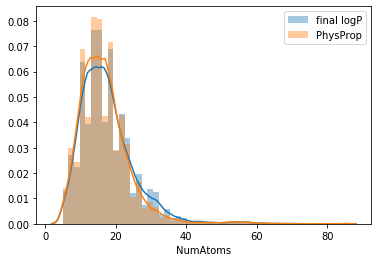

In [11]:
sns.distplot(logP_dataset_numatoms[NUM_ATOMS_COLUMN], label='final logP')
sns.distplot(physprop_dataset_numatoms[NUM_ATOMS_COLUMN], label='PhysProp')
plt.legend()